In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import h5py
import pingouin as pg
from statsmodels.genmod.families.varfuncs import binary

In [2]:
def slicewise_icc(map1, map2, icctype='ICC2'):
    """ ICC3.1 measures "consistency" while ICC2.1 measures "absolute agreement".
    """
    import pingouin as pg
    if True:
        map1 = map1.flatten()
        map2 = map2.flatten()
        slice1 = map1[~np.isnan(map1) & ~np.isnan(map2)]
        slice2 = map2[~np.isnan(map1) & ~np.isnan(map2)]
        data = pd.DataFrame({
            'targets': np.repeat(np.arange(len(slice1)), 2),
            'raters': np.tile(['slice1', 'slice2'], len(slice1)),
            'ratings': np.concatenate([slice1, slice2])
        })

        # Compute the ICC
        icc = pg.intraclass_corr(data=data, targets='targets', raters='raters', ratings='ratings', nan_policy='omit')

        # Filter for correct type (ICC(2,1) / ICC(2,1)) and store the result
        icc_x = icc[icc['Type'] == icctype]
        icc_result = icc_x['ICC'].values[0]

    return icc_result

def rotate_volume_slicewise(volume, k=1):
    """
    Rotate each 2D slice in a 3D volume
    """
    rotated_volume = np.zeros_like(volume)
    for slice_idx in range(volume.shape[2]):  # Iterate through depth slices
        rotated_volume[:, :, slice_idx] = np.rot90(volume[:, :, slice_idx], k=k)
    return rotated_volume


In [2]:
def pad_volume(volume, target_shape = (6,144,144,144)):
    """
    Pad a 4D volume to the target shape.

    Args:
        volume (numpy.ndarray): The volume to pad
        target_shape (tuple): The target shape (C, H, W, D)

    Returns:
        numpy.ndarray: Padded volume
    """
    c, h, w, d = volume.shape
    target_c, target_h, target_w, target_d = target_shape

    # Calculate padding for each dimension
    pad_h = max(0, (target_h - h) // 2)
    pad_w = max(0, (target_w - w) // 2)
    pad_d = max(0, (target_d - d) // 2)

    # Create padded volume
    padded = np.zeros(target_shape, dtype=volume.dtype)

    # Insert the original volume into the padded volume
    padded[:,  # Include all channels
           pad_h:pad_h + h,
           pad_w:pad_w + w,
           pad_d:pad_d + d
    ] = volume

    return padded


# Data upload

In [3]:
# Tmbf and Gt:
tbmf_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/tmbf_vol12.h5"
tbmf_gm_wm = h5py.File(tbmf_path, 'r')['gm_wm'][:]


gt_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/gt_vol12.h5"
gt_gm_wm = h5py.File(gt_path, 'r')['gm_wm'][:]

print(f" gt shape {gt_gm_wm.shape}, tbmf shape {tbmf_gm_wm.shape}")


 gt shape (6, 74, 144, 144), tbmf shape (6, 74, 144, 144)


Nikita dot 6 and dot 30


In [4]:
dot_6_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/nikita_6_vol12.h5"
dot_6_gm_wm = h5py.File(dot_6_path, 'r')['gm_wm'][:]
dot_30_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/nikita_30_vol12.h5"
dot_30_gm_wm = h5py.File(dot_30_path, 'r')['gm_wm'][:]
print(f"dot_6 shape: {dot_6_gm_wm.shape}, dot_30 shape: {dot_30_gm_wm.shape}")



dot_6 shape: (6, 74, 144, 144), dot_30 shape: (6, 74, 144, 144)


 Alex nbmf 6 and 30

In [5]:
nbmf_6_gm_wm = h5py.File("/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/alex_nbmf_6_vol12.h5", 'r')['gm_wm'][:]
nbmf_30_gm_wm = h5py.File("/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/alex_nbmf_30_vol12.h5", 'r')['gm_wm'][:]
print(f"nmbf_6 shape: {nbmf_6_gm_wm.shape}, nmbf_30 shape: {nbmf_30_gm_wm.shape}")

nmbf_6 shape: (2, 74, 144, 144), nmbf_30 shape: (2, 74, 144, 144)


Alex vbmf 6 and 30

In [6]:
vbmf_6_gm_wm = h5py.File("/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/alex_vbmf_6_vol12.h5", 'r')['gm_wm'][:]
vbmf_30_gm_wm = h5py.File("/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/alex_vbmf_30_vol12.h5", 'r')['gm_wm'][:]
print(f"vbmf_6 shape: {vbmf_6_gm_wm.shape}, vbmf_30 shape: {vbmf_30_gm_wm.shape}")

vbmf_6 shape: (2, 74, 144, 144), vbmf_30 shape: (2, 74, 144, 144)


# multiply all the maps with the mask


Processing GT vs TBMF...

GT vs TBMF, Parameter 0:
  param1 range: [0.000, 99.454]
  param2 range: [0.000, 92.053]
  axis limits: [0, 100]
  Valid points after scaling: 130129
Pearson r for GT vs TBMF, $K_{ssw}$ (S$^{-1}$): 0.893, p=0.000e+00

GT vs TBMF, Parameter 1:
  param1 range: [0.000, 25.173]
  param2 range: [0.000, 23.264]
  axis limits: [0, 27.27]
  Valid points after scaling: 130129
Pearson r for GT vs TBMF, $f_s$ (%): 0.957, p=0.000e+00

GT vs TBMF, Parameter 2:
  param1 range: [-0.521, 0.648]
  param2 range: [-1.000, 0.429]
  axis limits: [-0.6, 0.6]
  Valid points after scaling: 130129
Pearson r for GT vs TBMF, $B_0$ (ppm): 0.173, p=0.000e+00

GT vs TBMF, Parameter 3:
  param1 range: [0.000, 1.254]
  param2 range: [0.000, 1.118]
  axis limits: [0.5, 1.5]
  Valid points after scaling: 130129
Pearson r for GT vs TBMF, $B_1$ (rel.): 0.940, p=0.000e+00

GT vs TBMF, Parameter 4:
  param1 range: [0.000, 3000.000]
  param2 range: [0.000, 3000.000]
  axis limits: [0, 3000]
  Vali

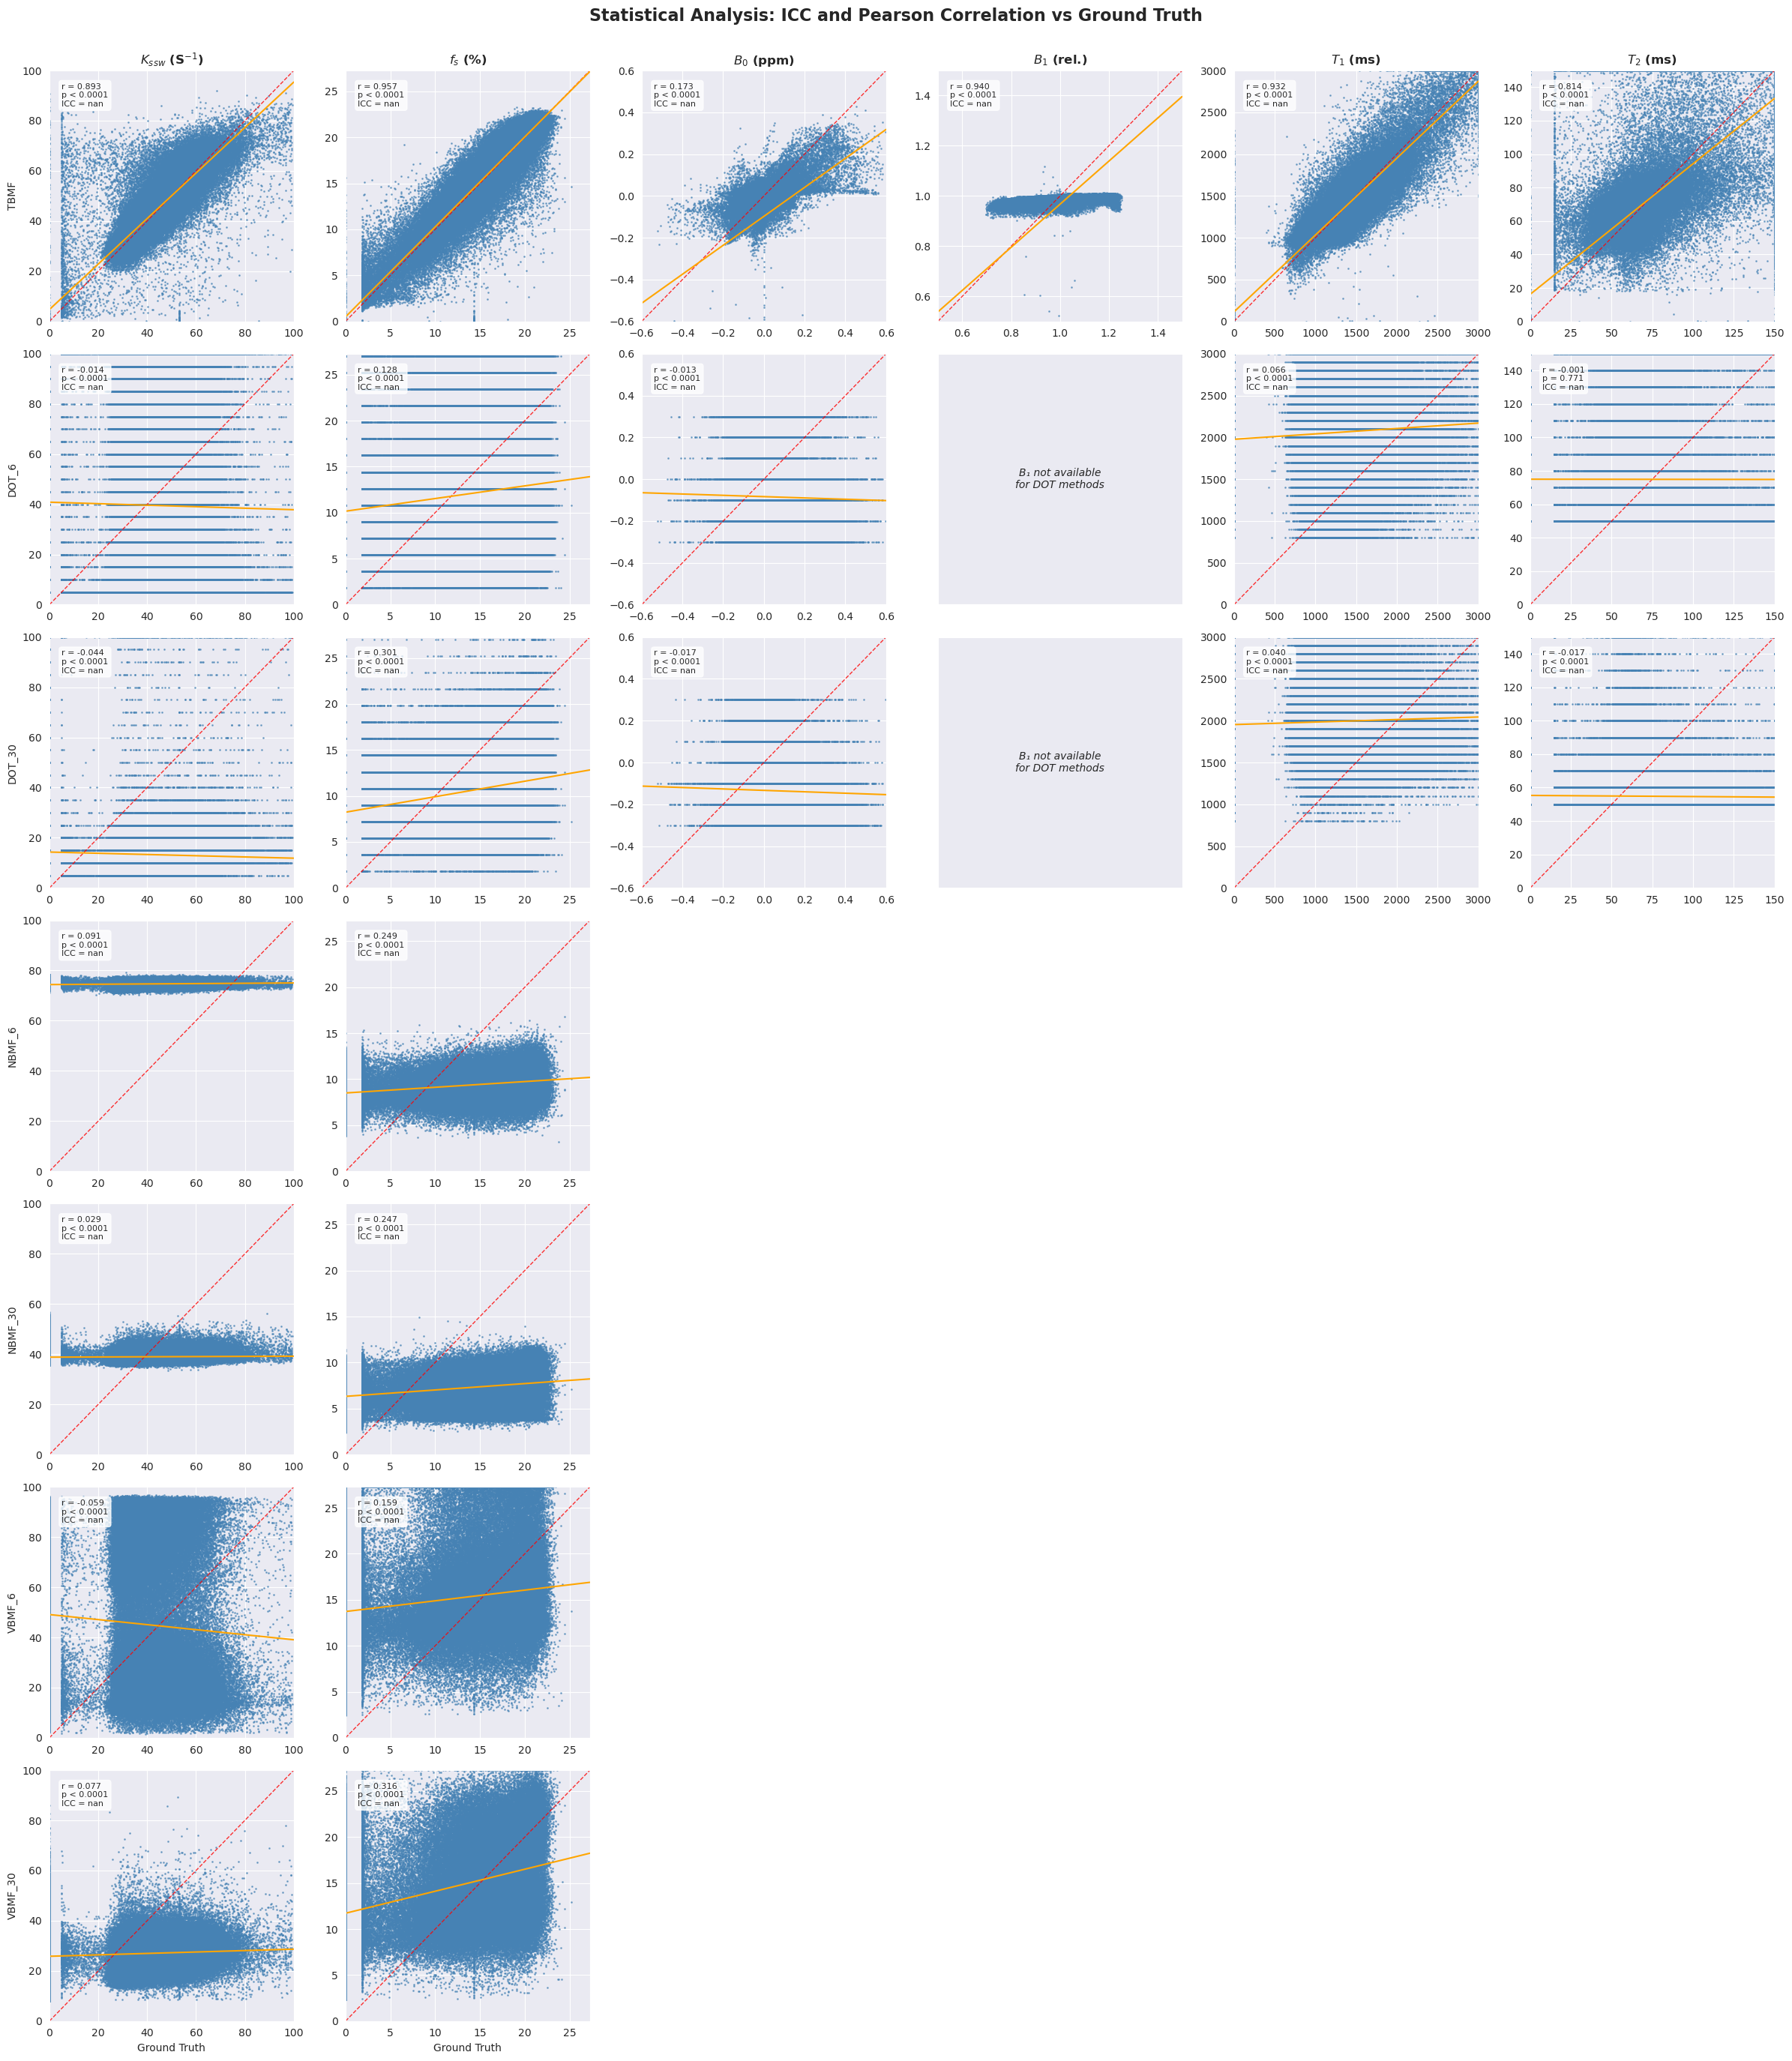


SUMMARY TABLE

Pearson Correlation Coefficients (r):
--------------------------------------------------
Parameter      $B_0$ (ppm)  $B_1$ (rel.)  $K_{ssw}$ (S$^{-1}$)  $T_1$ (ms)  $T_2$ (ms)  $f_s$ (%)
Method                                                                                           
GT vs DOT_30        -0.017           NaN                -0.044       0.040      -0.017      0.301
GT vs DOT_6         -0.013           NaN                -0.014       0.066      -0.001      0.128
GT vs NBMF_30          NaN           NaN                 0.029         NaN         NaN      0.247
GT vs NBMF_6           NaN           NaN                 0.091         NaN         NaN      0.249
GT vs TBMF           0.173          0.94                 0.893       0.932       0.814      0.957
GT vs VBMF_30          NaN           NaN                 0.077         NaN         NaN      0.316
GT vs VBMF_6           NaN           NaN                -0.059         NaN         NaN      0.159

Intraclass C

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set up the methods and their data
methods = {
    'GT vs TBMF': (gt_gm_wm, tbmf_gm_wm, 6),
    'GT vs DOT_6': (gt_gm_wm, dot_6_gm_wm, 6),
    'GT vs DOT_30': (gt_gm_wm, dot_30_gm_wm, 6),
    'GT vs NBMF_6': (gt_gm_wm[:2,:,:,:], nbmf_6_gm_wm, 2),
    'GT vs NBMF_30': (gt_gm_wm[:2,:,:,:], nbmf_30_gm_wm, 2),
    'GT vs VBMF_6': (gt_gm_wm[:2,:,:,:], vbmf_6_gm_wm, 2),
    'GT vs VBMF_30': (gt_gm_wm[:2,:,:,:], vbmf_30_gm_wm, 2)
}

# Parameter names
param_names = [
    r"$K_{ssw}$ (S$^{-1}$)",
    r"$f_s$ (%)",
    r"$B_0$ (ppm)",
    r"$B_1$ (rel.)",
    r"$T_1$ (ms)",
    r"$T_2$ (ms)"
]

# Create figure
fig, axes = plt.subplots(7, 6, figsize=(24, 28))
fig.suptitle('Statistical Analysis: ICC and Pearson Correlation vs Ground Truth',
             fontsize=16, fontweight='bold')

# Scale factors
scale_factor = [100, 27.27, 2.7, 3.4944, 10000, 1000]
scale_factor_nikita = [1, 100, 1, 1, 1000, 1000]
alex_scale = [1, 100]

# Axis limits for each parameter [min, max]
axis_limits = {
    0: [0, 100],      # K_ssw: 0-100
    1: [0, 27.27],    # f_s: 0-27.27
    2: [-0.6, 0.6],   # B_0: keep current range
    3: [0.5, 1.5],      # B_1: keep current range
    4: [0, 3000],     # T_1: 0-3000
    5: [0, 150]       # T_2: 0-150
}

results_summary = []

# Process each method
for method_idx, (method_name, (data1, data2, n_params)) in enumerate(methods.items()):
    print(f"\nProcessing {method_name}...")

    # Process each parameter
    for param_idx in range(6):
        ax = axes[method_idx, param_idx]

        if param_idx < n_params:
            # Skip B_1 for Nikita methods (rows 1,2)
            if (method_idx == 1 or method_idx == 2) and param_idx == 3:
                ax.text(0.5, 0.5, 'B₁ not available\nfor DOT methods', transform=ax.transAxes,
                       ha='center', va='center', fontsize=10, style='italic')
                ax.set_xticks([])
                ax.set_yticks([])
                continue

            # Extract parameter data
            param1 = data1[param_idx].copy()
            param2 = data2[param_idx].copy()

            # Apply scaling to param1 (Ground Truth) - should be CONSISTENT across all methods
            if param_idx == 2:
                param1 = param1 * scale_factor[2] - 1
            else:
                param1 = param1 * scale_factor[param_idx]

            # Apply scaling to param2 (comparison methods) - should be METHOD-SPECIFIC
            if method_idx == 1 or method_idx == 2:  # Nikita methods (DOT)
                if param_idx < len(scale_factor_nikita):
                    param2 = param2 * scale_factor_nikita[param_idx]
            elif method_idx >= 3:  # Alex methods (NBMF/VBMF)
                if param_idx < len(alex_scale):
                    param2 = param2 * alex_scale[param_idx]
            else:  # GT vs Pred - both should use same scaling (already applied to param1)
                if param_idx == 2:
                    param2 = param2 * scale_factor[2] - 1
                else:
                    param2 = param2 * scale_factor[param_idx]


            # Data validation and clipping
            if param_idx == 0:  # K_ssw should be 0-100
                param1 = np.clip(param1, 0, 100)
                param2 = np.clip(param2, 0, 100)
            elif param_idx == 1:  # f_s should be 0-27.27
                param1 = np.clip(param1, 0, 27.27)
                param2 = np.clip(param2, 0, 27.27)
            elif param_idx == 4:  # T_1 should be 0-3000
                param1 = np.clip(param1, 0, 3000)
                param2 = np.clip(param2, 0, 3000)
            elif param_idx == 5:  # T_2 should be 0-150
                param1 = np.clip(param1, 0, 150)
                param2 = np.clip(param2, 0, 150)

            # Right after the scaling section, add:
            print(f"\n{method_name}, Parameter {param_idx}:")
            print(f"  param1 range: [{np.nanmin(param1):.3f}, {np.nanmax(param1):.3f}]")
            print(f"  param2 range: [{np.nanmin(param2):.3f}, {np.nanmax(param2):.3f}]")
            print(f"  axis limits: {axis_limits[param_idx]}")
            print(f"  Valid points after scaling: {np.sum(~np.isnan(param1) & ~np.isnan(param2))}")

            # Calculate ICC using your original function
            try:
                icc_value = slicewise_icc(param1, param2, icctype='ICC2')
                print(f"ICC for {method_name}, {param_names[param_idx]}: {icc_value:.3f}")
            except:
                icc_value = np.nan

            # Calculate Pearson correlation
            mask = ~np.isnan(param1) & ~np.isnan(param2)
            param1_clean = param1[mask]
            param2_clean = param2[mask]

            try:
                if len(param1_clean) > 10:
                    pearson_r, pearson_p = stats.pearsonr(param1_clean, param2_clean)
                    print(f"Pearson r for {method_name}, {param_names[param_idx]}: {pearson_r:.3f}, p={pearson_p:.3e}")

                    # Create scatter plot
                    ax.scatter(param1_clean, param2_clean, alpha=0.6, s=1, color='steelblue')

                    # Set axis limits
                    ax.set_xlim(axis_limits[param_idx])
                    ax.set_ylim(axis_limits[param_idx])

                    # Add identity line within axis limits
                    lims = axis_limits[param_idx]
                    ax.plot(lims, lims, 'r--', alpha=0.8, linewidth=1)

                    # Add regression line
                    if not (np.isnan(pearson_r) or pearson_r == 0):
                        slope, intercept = np.polyfit(param1_clean, param2_clean, 1)
                        x_reg = np.array(lims)
                        y_reg = slope * x_reg + intercept
                        # Clip regression line to axis limits
                        y_reg = np.clip(y_reg, lims[0], lims[1])
                        ax.plot(x_reg, y_reg, 'orange', linewidth=1.5)

                    # Set labels and title
                    ax.set_xlabel('Ground Truth' if method_idx == len(methods)-1 else '')
                    ax.set_ylabel(method_name.split(' vs ')[1] if param_idx == 0 else '')

                    # Add statistics text
                    stats_text = f'r = {pearson_r:.3f}\n'
                    if pearson_p < 0.0001:
                        stats_text += 'p < 0.0001\n'
                    else:
                        stats_text += f'p = {pearson_p:.3f}\n'
                    stats_text += f'ICC = {icc_value:.3f}'

                    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes,
                           fontsize=8, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

                    # Store checkpoints
                    results_summary.append({
                        'Method': method_name,
                        'Parameter': param_names[param_idx],
                        'Pearson_r': pearson_r,
                        'Pearson_p': pearson_p,
                        'ICC': icc_value,
                        'N_points': len(param1_clean)
                    })
                else:
                    ax.text(0.5, 0.5, 'Insufficient\ndata', transform=ax.transAxes,
                           ha='center', va='center', fontsize=10)
                    ax.set_xticks([])
                    ax.set_yticks([])

            except Exception as e:
                ax.text(0.5, 0.5, 'Error in\ncalculation', transform=ax.transAxes,
                       ha='center', va='center', fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])
                print(f"Error in {method_name}, {param_names[param_idx]}: {e}")

        else:
            # Empty subplot for parameters not available in this method
            ax.axis('off')

        # Add parameter title on top row
        if method_idx == 0:
            ax.set_title(param_names[param_idx], fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig("/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/Method_ICC_single.png", dpi=300)
plt.show()

# Create summary table with error handling
results_df = pd.DataFrame(results_summary)
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)

if not results_df.empty:
    # Pivot table for better visualization
    summary_table = results_df.pivot_table(
        index='Method',
        columns='Parameter',
        values=['Pearson_r', 'ICC'],
        aggfunc='first'
    )

    print("\nPearson Correlation Coefficients (r):")
    print("-" * 50)
    pearson_table = summary_table['Pearson_r'].round(3)
    print(pearson_table.to_string())

    print("\nIntraclass Correlation Coefficients (ICC):")
    print("-" * 50)
    if 'ICC' in summary_table.columns:
        icc_table = summary_table['ICC'].round(3)
        print(icc_table.to_string())
    else:
        icc_manual = results_df.pivot_table(
            index='Method',
            columns='Parameter',
            values='ICC',
            aggfunc='first'
        ).round(3)
        print(icc_manual.to_string())

    print("\nPearson p-values:")
    print("-" * 20)
    p_table = results_df.pivot_table(
        index='Method',
        columns='Parameter',
        values='Pearson_p',
        aggfunc='first'
    ).round(4)
    print(p_table.to_string())

    # Save checkpoints to CSV
    results_df.to_csv('/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_comcorrelation_icc_results.csv', index=False)
    print(f"\nDetailed checkpoints saved to 'correlation_icc_results.csv'")
else:
    print("No valid checkpoints to display!")


In [ ]:
fig, ax = plt.subplots(4,2, figsize=(8, 28))
ax = ax.flatten()

ax[0].imshow(gt_gm_wm[0, 60, :, :], cmap='jet')
ax[0].axis('off')
ax[1].imshow(tbmf_gm_wm[0, 60, :, :], cmap='jet')
ax[2].imshow(dot_6_gm_wm[0, 60, :, :], cmap='jet')
ax[3].imshow(dot_30_gm_wm[0, 60, :, :], cmap='jet')
ax[4].imshow(nbmf_6_gm_wm[0, 60, :, :], cmap='jet')
ax[5].imshow(nbmf_30_gm_wm[0, 60, :, :], cmap='jet')
ax[6].imshow(vbmf_6_gm_wm[0, 60, :, :], cmap='jet')
ax[7].imshow(vbmf_30_gm_wm[0, 60, :, :], cmap='jet')


In [8]:


def calculate_parameter_averages(data, method = "tmbf"):
    if method == "tmbf" or method == "gt":
        scale_factor = [100, 27.27, 2.7, 3.4944, 10000, 1000]
    elif method == "nikita":
        scale_factor = [1, 100, 1, 1, 1000, 1000]
    else:
        scale_factor = [1, 100]
    """Calculate average for each parameter across the masked volume"""
    data_averages = []

    for i in range(data.shape[0]):  # For each of the 6 parameters
        data_avg = np.nanmean(data[i])  # nanmean ignores NaN values from masking
        if method == "tmbf" or method == "gt":
            if i ==2:
                data_avg = data_avg * scale_factor[i] -1
            else:
                data_avg = data_avg * scale_factor[i]
        else:
            data_avg = data_avg * scale_factor[i]
        data_averages.append(data_avg)

    return np.array(data_averages).reshape(data.shape[0],1)


def calculate_slice_averages(data, method="tmbf"):
    """Calculate average for each parameter for each slice"""
    # Define scale factors based on the method
    if method == "tmbf" or method == "gt":
        scale_factor = [100, 27.27, 2.7, 3.4944, 10000, 1000]
    elif method == "nikita":
        scale_factor = [1, 100, 1, 1, 1000, 1000]
    else:  # 'alex' methods
        scale_factor = [1, 100]

    data_slice_averages = np.empty((data.shape[0], data.shape[1]))

    for i in range(data.shape[0]):  # For each of the parameters
        for j in range(data.shape[1]):  # For each slice
            slice_avg = np.nanmean(data[i, j])
            # Apply the method-specific scaling
            if (method == "tmbf" or method == "gt") and i == 2:
                slice_avg = slice_avg * scale_factor[i] - 1
            else:
                slice_avg = slice_avg * scale_factor[i]
            data_slice_averages[i, j] = slice_avg

    return data_slice_averages


def perform_sanity_check(volumes, data_types, volume_ids):
    """
    Sanity check to verify that the sum of the slice sums
    is equal to the overall volume sum. This is more robust
    than comparing means when data contains NaNs.
    """
    print("\n" + "=" * 50)
    print("SANITY CHECK: VOLUME SUM vs SUM OF SLICE SUMS")
    print("=" * 50)

    # Use a small tolerance for floating-point comparisons
    tolerance = 1e-6
    all_checks_passed = True

    for data_type in data_types:
        for vol_id in volume_ids:
            key = f"{data_type}_vol{vol_id}"

            # Check if data exists for this combination
            if key in volumes:
                data = volumes[key]

                # Calculate the sum of all non-NaN values in the volume
                volume_sum = np.nansum(data, axis=(1, 2, 3))

                # Calculate the sum for each slice, then sum those slice sums
                slice_sums = np.nansum(data, axis=(2, 3))
                sum_of_slice_sums = np.nansum(slice_sums, axis=1)

                # Also check the number of non-NaN values
                volume_count = np.sum(~np.isnan(data), axis=(1, 2, 3))
                slice_counts = np.sum(~np.isnan(data), axis=(2, 3))
                sum_of_slice_counts = np.sum(slice_counts, axis=1)

                # Compare the sums and the counts
                is_sum_equal = np.allclose(volume_sum, sum_of_slice_sums, atol=tolerance, equal_nan=True)
                is_count_equal = np.allclose(volume_count, sum_of_slice_counts, atol=tolerance, equal_nan=True)

                if is_sum_equal and is_count_equal:
                    print(f"✅ PASSED: {data_type}_vol{vol_id} - Sums and counts match.")
                else:
                    print(f"❌ FAILED: {data_type}_vol{vol_id} - Sums and/or counts DO NOT match.")
                    print(f"    Volume Sum:         {volume_sum}")
                    print(f"    Sum of Slice Sums:  {sum_of_slice_sums}")
                    print(f"    Difference (Sum):   {np.abs(volume_sum - sum_of_slice_sums)}")
                    print(f"    Volume Count:       {volume_count}")
                    print(f"    Sum of Slice Counts:{sum_of_slice_counts}")
                    print(f"    Difference (Count): {np.abs(volume_count - sum_of_slice_counts)}")
                    all_checks_passed = False
            else:
                print(f"⚠️ SKIPPED: {data_type}_vol{vol_id} - Data file not loaded.")

    if all_checks_passed:
        print("\nAll sanity checks passed. The calculations are consistent. 🎉")
    else:
        print("\nSome sanity checks failed. Please review the calculations. 🚨")





In [9]:
import os

def load_data(path: str) -> np.ndarray:
    print(f"Loading: {path}")
    data = h5py.File(path, 'r')["gm_wm"][:]
    print(f"Loaded shape: {data.shape}")
    return data

base_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com"
volume_ids = [12, 16, 17]
data_types = ['gt', 'tmbf', 'nikita_6', 'nikita_30', 'alex_nbmf_6', 'alex_nbmf_30', 'alex_vbmf_6', 'alex_vbmf_30']

# Load all data in loops
volumes = {}
for data_type in data_types:
    for vol_id in volume_ids:
        file_path = os.path.join(base_path, f"{data_type}_vol{vol_id}.h5")
        print(f"\n--- Loading {data_type}_vol{vol_id} ---")
        volumes[f"{data_type}_vol{vol_id}"] = load_data(file_path)

# Function to determine method type for scaling
def get_method_type(data_type):
    if data_type in ['gt', 'tmbf']:
        return data_type
    elif 'nikita' in data_type:
        return 'nikita'
    else:  # alex methods
        return 'alex'

# Calculate parameter averages for each method and volume
parameter_averages = {}
parameter_slice_averages = {}

for data_type in data_types:
    parameter_averages[data_type] = {}
    parameter_slice_averages[data_type] = {}
    method_type = get_method_type(data_type)

    for vol_id in volume_ids:
        key = f"{data_type}_vol{vol_id}"
        if key in volumes:
            pred_avg = calculate_parameter_averages(volumes[key], method=method_type)
            parameter_averages[data_type][vol_id] = {
                'avg': pred_avg
            }
            # Calculate per-slice average
            slice_avg = calculate_slice_averages(volumes[key], method=method_type)
            parameter_slice_averages[data_type][vol_id] = {
                'slice_avg': slice_avg
            }

# Print summary of parameter averages
print("\n" + "="*50)
print("PARAMETER AVERAGES SUMMARY")
print("="*50)

# Add this to your printing section for better formatting
# for data_type in data_types:
#     print(f"\n{data_type.upper()}:")
#     for vol_id in volume_ids:
#         print(f"  Volume {vol_id}:")
#         if 'avg' in parameter_averages[data_type][vol_id]:
#             avg_values = parameter_averages[data_type][vol_id]['avg'].flatten()
#             # Format numbers for better readability
#             formatted_values = [f"{val:.3f}" for val in avg_values]
#             print(f"    Avg: {formatted_values}")
#
# print("\n" + "="*50)
# print("PARAMETER SLICE AVERAGES SUMMARY")
# print("="*50)
# for data_type in data_types:
#     print(f"\n{data_type.upper()}:")
#     for vol_id in volume_ids:
#         print(f"  Volume {vol_id}:")
#         if 'slice_avg' in parameter_slice_averages[data_type][vol_id]:
#             # Print shape and a snippet of the data for verification
#             slice_avg_data = parameter_slice_averages[data_type][vol_id]['slice_avg']
#             print(f"    Slice Avg Shape: {slice_avg_data.shape}")
#             print(f"    First 2 Slices Avg:\n{slice_avg_data[:, :2]}")

perform_sanity_check(volumes, data_types, volume_ids)




--- Loading gt_vol12 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/gt_vol12.h5
Loaded shape: (6, 74, 144, 144)

--- Loading gt_vol16 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/gt_vol16.h5
Loaded shape: (6, 71, 144, 144)

--- Loading gt_vol17 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/gt_vol17.h5
Loaded shape: (6, 72, 144, 144)

--- Loading tmbf_vol12 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/tmbf_vol12.h5
Loaded shape: (6, 74, 144, 144)

--- Loading tmbf_vol16 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/tmbf_vol16.h5
Loaded shape: (6, 71, 144, 144)

--- Loading tmbf_vol17 ---
Loading: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/tm

/tmp/ipykernel_2054813/860053385.py:39: RuntimeWarning: Mean of empty slice
  slice_avg = np.nanmean(data[i, j])



PARAMETER AVERAGES SUMMARY

SANITY CHECK: VOLUME SUM vs SUM OF SLICE SUMS
✅ PASSED: gt_vol12 - Sums and counts match.
✅ PASSED: gt_vol16 - Sums and counts match.
✅ PASSED: gt_vol17 - Sums and counts match.
✅ PASSED: tmbf_vol12 - Sums and counts match.
✅ PASSED: tmbf_vol16 - Sums and counts match.
✅ PASSED: tmbf_vol17 - Sums and counts match.
✅ PASSED: nikita_6_vol12 - Sums and counts match.
✅ PASSED: nikita_6_vol16 - Sums and counts match.
✅ PASSED: nikita_6_vol17 - Sums and counts match.
✅ PASSED: nikita_30_vol12 - Sums and counts match.
✅ PASSED: nikita_30_vol16 - Sums and counts match.
✅ PASSED: nikita_30_vol17 - Sums and counts match.
✅ PASSED: alex_nbmf_6_vol12 - Sums and counts match.
✅ PASSED: alex_nbmf_6_vol16 - Sums and counts match.
✅ PASSED: alex_nbmf_6_vol17 - Sums and counts match.
✅ PASSED: alex_nbmf_30_vol12 - Sums and counts match.
✅ PASSED: alex_nbmf_30_vol16 - Sums and counts match.
✅ PASSED: alex_nbmf_30_vol17 - Sums and counts match.
✅ PASSED: alex_vbmf_6_vol12 - S

# ICC and pearson P for average of 3 subjects


STATISTICAL ANALYSIS OF PARAMETER AVERAGES ACROSS VOLUMES

Analyzing TMBF vs Ground Truth:
--------------------------------------------------

  Parameter 0 - $K_{ssw}$ (S$^{-1}$):
    GT values: [40.42247364 40.49586675 42.06121261]
    tmbf values: [41.36547572 41.65718768 42.90554157]
    ICC: 0.6485
    Pearson r: 0.9903
    Pearson p: 0.0889

  Parameter 1 - $f_s$ (%):
    GT values: [13.96176707 14.13727524 13.34172098]
    tmbf values: [14.1457359  14.02074887 13.83193076]
    ICC: -0.4959
    Pearson r: 0.8149
    Pearson p: 0.3936

  Parameter 2 - $B_0$ (ppm):
    GT values: [0.01803019 0.0278336  0.00302939]
    tmbf values: [-0.08510381 -0.08945511 -0.08233401]
    ICC: 0.6266
    Pearson r: -0.9694
    Pearson p: 0.1578

  Parameter 3 - $B_1$ (rel.):
    GT values: [0.92823356 0.91342763 0.90754103]
    tmbf values: [0.90541256 0.89746172 0.90254724]
    ICC: 0.6796
    Pearson r: 0.5709
    Pearson p: 0.6132

  Parameter 4 - $T_1$ (ms):
    GT values: [1253.73867804 1186.

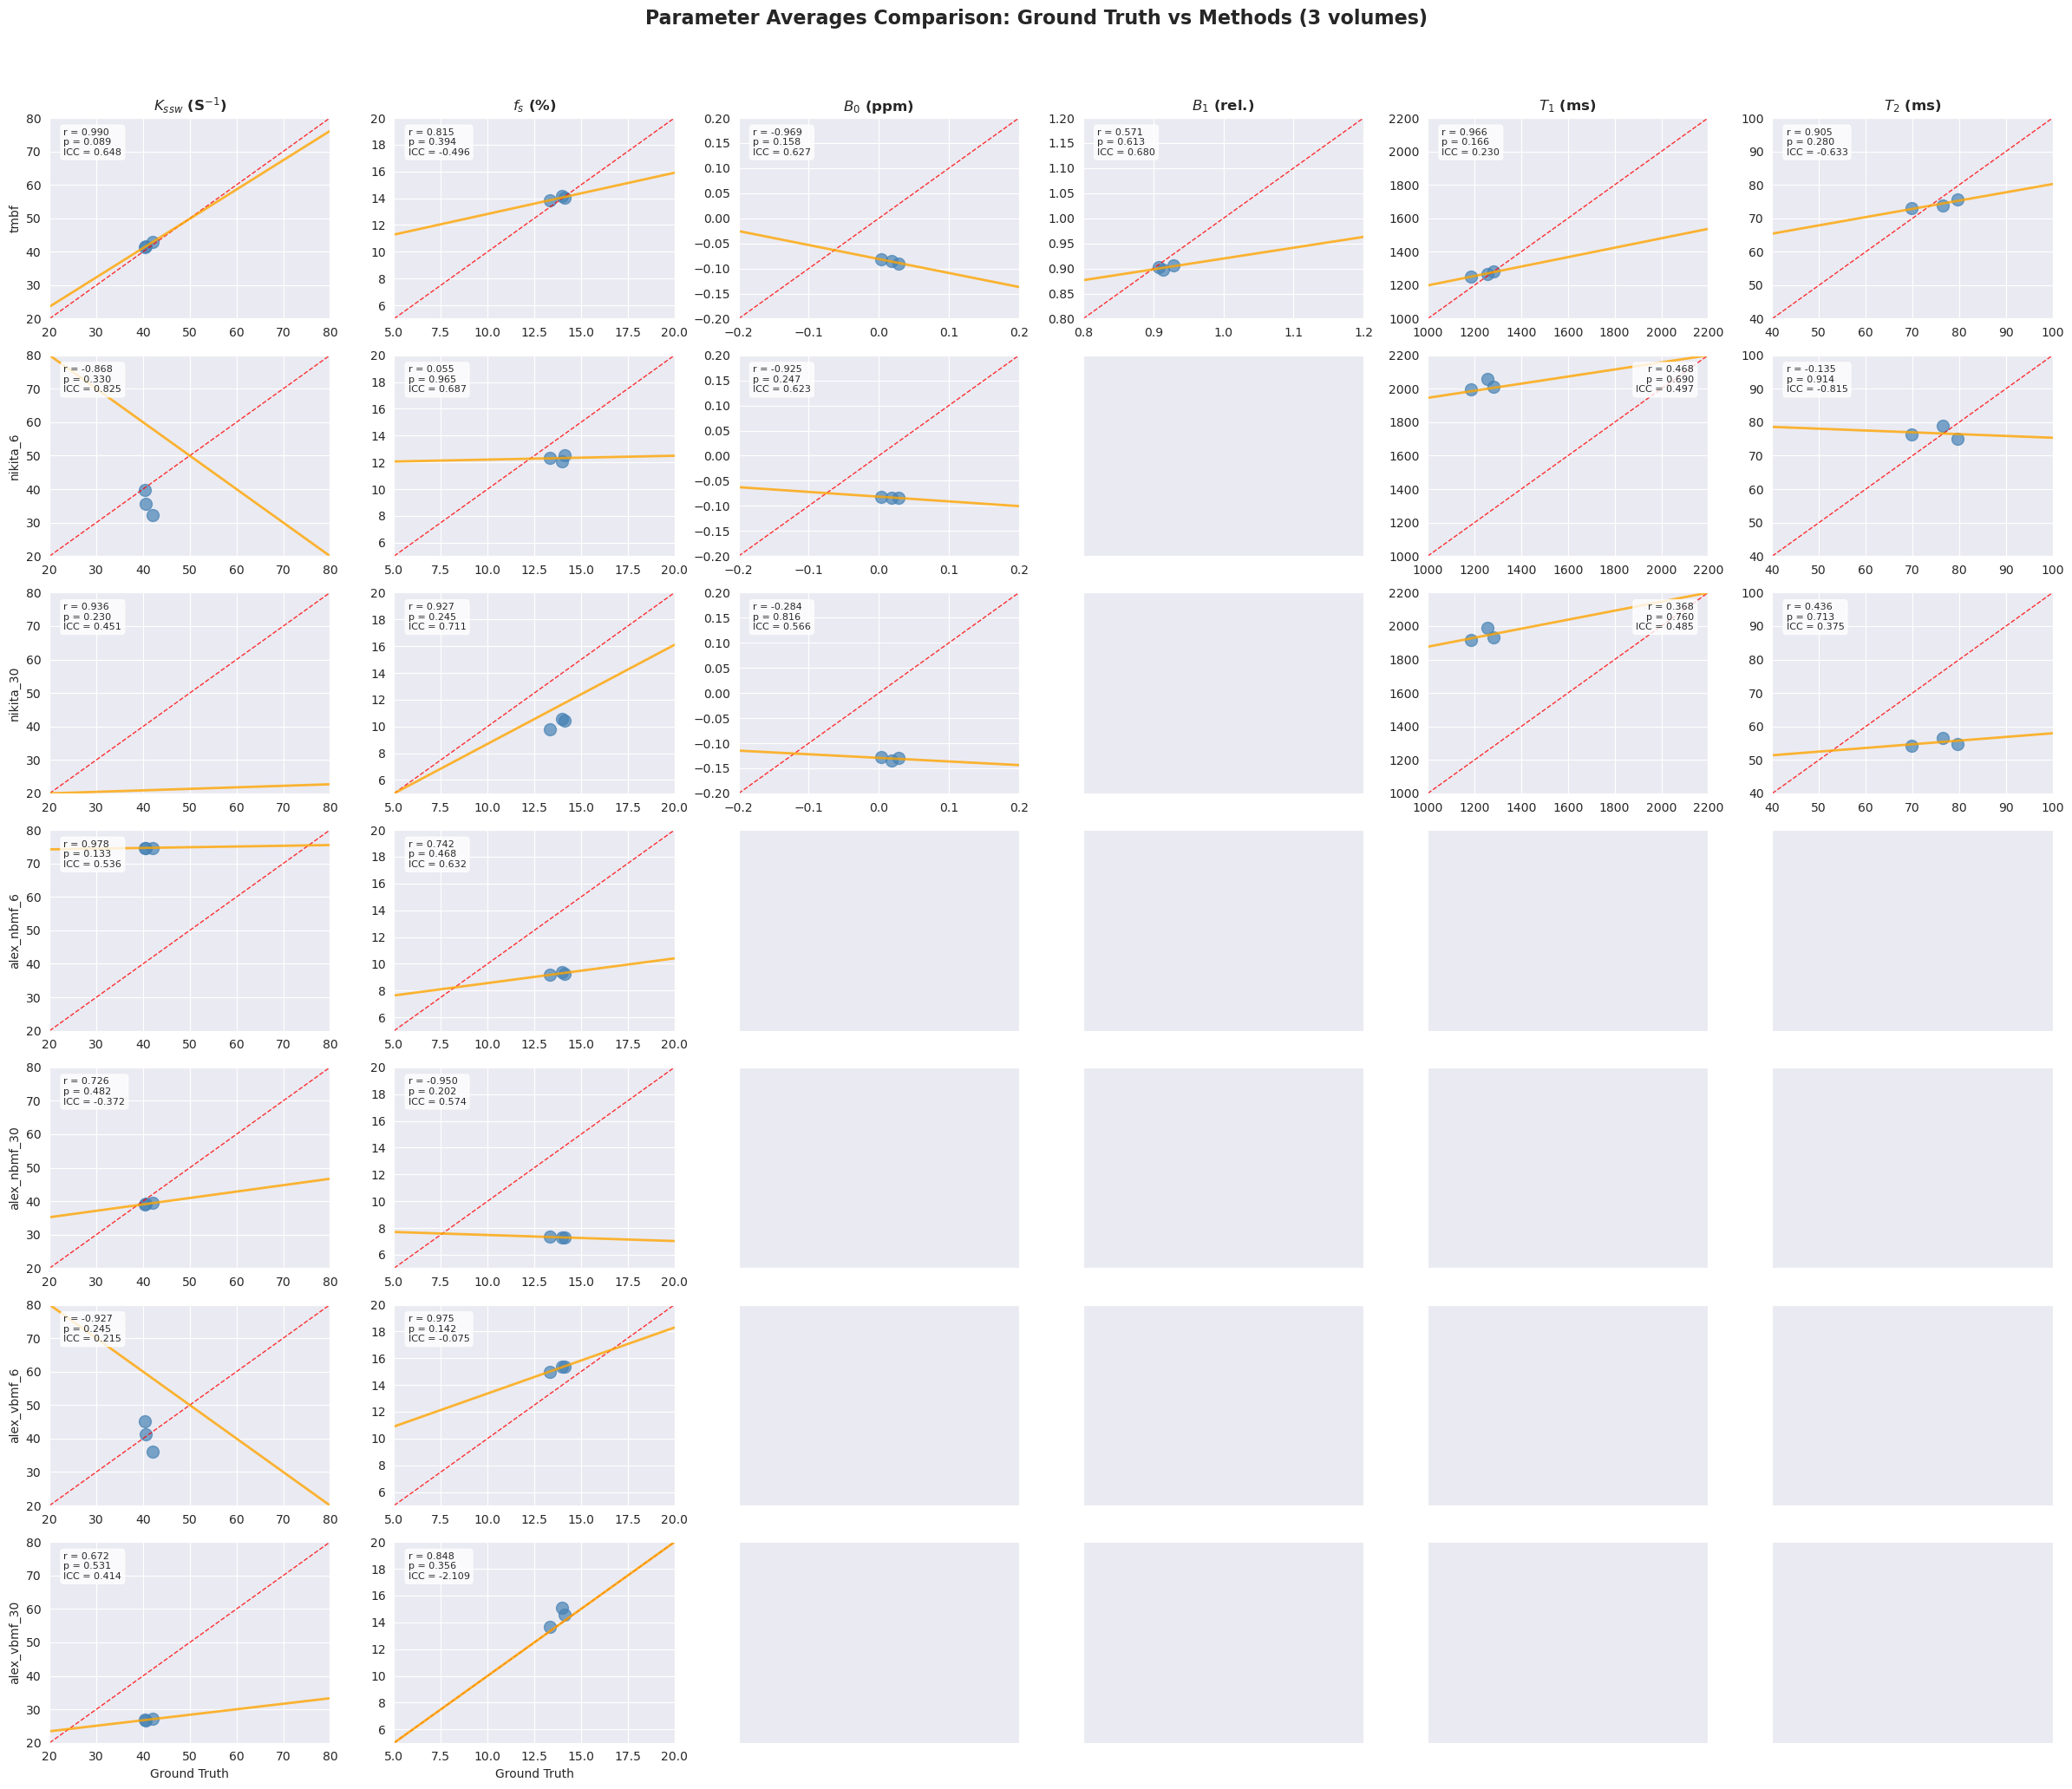


Figure saved and displayed!


In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import pingouin as pg
import matplotlib.pyplot as plt

def slicewise_icc(map1, map2, icctype='ICC2'):
    """ ICC3.1 measures "consistency" while ICC2.1 measures "absolute agreement".
    """
    import pingouin as pg
    if True:
        map1 = map1.flatten()
        map2 = map2.flatten()
        slice1 = map1[~np.isnan(map1) & ~np.isnan(map2)]
        slice2 = map2[~np.isnan(map1) & ~np.isnan(map2)]
        data = pd.DataFrame({
            'targets': np.repeat(np.arange(len(slice1)), 2),
            'raters': np.tile(['slice1', 'slice2'], len(slice1)),
            'ratings': np.concatenate([slice1, slice2])
        })

        # Compute the ICC
        icc = pg.intraclass_corr(data=data, targets='targets', raters='raters', ratings='ratings', nan_policy='omit')

        # Filter for correct type (ICC(2,1) / ICC(2,1)) and store the result
        icc_x = icc[icc['Type'] == icctype]
        icc_result = icc_x['ICC'].values[0]

    return icc_result

# Parameter names for labeling
param_names = [
    r"$K_{ssw}$ (S$^{-1}$)",
    r"$f_s$ (%)",
    r"$B_0$ (ppm)",
    r"$B_1$ (rel.)",
    r"$T_1$ (ms)",
    r"$T_2$ (ms)"
]

# Axis limits for each parameter [min, max]
axis_limits = {
    0: [20, 80],      # K_ssw: 0-100
    1: [5, 20],    # f_s: 0-27.27
    2: [-0.2, 0.2],   # B_0: keep current range
    3: [0.8, 1.2],    # B_1: keep current range
    4: [1000, 2200],     # T_1: 0-3000
    5: [40, 100]       # T_2: 0-150
}

# Collect averages for each method and parameter
methods_to_compare = ['tmbf', 'nikita_6', 'nikita_30', 'alex_nbmf_6', 'alex_nbmf_30', 'alex_vbmf_6', 'alex_vbmf_30']
gt_method = 'gt'

# Create arrays to store checkpoints
results_averages = []

print("\n" + "=" * 80)
print("STATISTICAL ANALYSIS OF PARAMETER AVERAGES ACROSS VOLUMES")
print("=" * 80)

for method in methods_to_compare:
    print(f"\nAnalyzing {method.upper()} vs Ground Truth:")
    print("-" * 50)

    # Determine number of parameters for this method
    if 'alex' in method:
        n_params = 2  # Only first 2 parameters for Alex methods
    else:
        n_params = 6  # All 6 parameters for other methods

    for param_idx in range(n_params):
        # Skip B_1 for Nikita methods (parameter index 3)
        if 'nikita' in method and param_idx == 3:
            continue

        # Collect GT and method averages for this parameter across all volumes
        gt_values = []
        method_values = []

        for vol_id in volume_ids:
            gt_avg = parameter_averages[gt_method][vol_id]['avg'][param_idx, 0]
            method_avg = parameter_averages[method][vol_id]['avg'][param_idx, 0]

            gt_values.append(gt_avg)
            method_values.append(method_avg)

        gt_values = np.array(gt_values)
        method_values = np.array(method_values)

        print(f"\n  Parameter {param_idx} - {param_names[param_idx]}:")
        print(f"    GT values: {gt_values}")
        print(f"    {method} values: {method_values}")

        # Calculate ICC using your slicewise_icc function
        try:
            icc_value = slicewise_icc(gt_values, method_values, icctype='ICC2')
        except Exception as e:
            print(f"    ICC calculation error: {e}")
            icc_value = np.nan

        # Calculate Pearson correlation
        try:
            if len(gt_values) >= 3 and not np.any(np.isnan(gt_values)) and not np.any(np.isnan(method_values)):
                pearson_r, pearson_p = stats.pearsonr(gt_values, method_values)
            else:
                pearson_r, pearson_p = np.nan, np.nan
        except Exception as e:
            print(f"    Pearson correlation error: {e}")
            pearson_r, pearson_p = np.nan, np.nan

        print(f"    ICC: {icc_value:.4f}")
        print(f"    Pearson r: {pearson_r:.4f}")
        print(f"    Pearson p: {pearson_p:.4f}")

        # Store checkpoints
        results_averages.append({
            'Method': method,
            'Parameter': param_names[param_idx],
            'Parameter_Index': param_idx,
            'GT_values': gt_values.tolist(),
            'Method_values': method_values.tolist(),
            'Pearson_r': pearson_r,
            'Pearson_p': pearson_p,
            'ICC': icc_value,
            'N_volumes': len(volume_ids)
        })

# Create summary DataFrame
results_averages_df = pd.DataFrame(results_averages)

# Create figure with all 6 parameters
fig, axes = plt.subplots(len(methods_to_compare), 6, figsize=(24, 3*len(methods_to_compare)))
fig.suptitle('Parameter Averages Comparison: Ground Truth vs Methods (3 volumes)',
             fontsize=16, fontweight='bold')

# Handle case where there's only one method
if len(methods_to_compare) == 1:
    axes = axes.reshape(1, -1)

for method_idx, method in enumerate(methods_to_compare):
    for param_idx in range(6):
        ax = axes[method_idx, param_idx]

        # Set consistent axis limits for all subplots
        ax_limits = axis_limits[param_idx]
        ax.set_xlim(ax_limits)
        ax.set_ylim(ax_limits)

        # Check if this method has data for this parameter
        method_data = results_averages_df[
            (results_averages_df['Method'] == method) &
            (results_averages_df['Parameter_Index'] == param_idx)
        ]

        if not method_data.empty:
            gt_vals = np.array(method_data.iloc[0]['GT_values'])
            method_vals = np.array(method_data.iloc[0]['Method_values'])

            # Create scatter plot
            ax.scatter(gt_vals, method_vals, s=100, alpha=0.7, color='steelblue')


            # Add identity line (red dashed)
            ax.plot(ax_limits, ax_limits, 'r--', alpha=0.8, linewidth=1)

            # Add regression line (yellow/orange)
            pearson_r = method_data.iloc[0]['Pearson_r']
            if not (np.isnan(pearson_r) or pearson_r == 0):
                try:
                    slope, intercept = np.polyfit(gt_vals, method_vals, 1)
                    x_reg = np.array(ax_limits)
                    y_reg = slope * x_reg + intercept
                    # Clip regression line to axis limits
                    y_reg = np.clip(y_reg, ax_limits[0], ax_limits[1])
                    ax.plot(x_reg, y_reg, 'orange', linewidth=2, alpha=0.8)
                except:
                    pass  # Skip regression line if calculation fails

            # Add statistics
            pearson_p = method_data.iloc[0]['Pearson_p']
            icc_val = method_data.iloc[0]['ICC']

            stats_text = f'r = {pearson_r:.3f}\n'
            if pearson_p < 0.001:
                stats_text += 'p < 0.001\n'
            else:
                stats_text += f'p = {pearson_p:.3f}\n'
            stats_text += f'ICC = {icc_val:.3f}'

            # Determine best position for statistics text to avoid overlap with data points
            # Check if data points are in upper left quadrant
            x_range = ax_limits[1] - ax_limits[0]
            y_range = ax_limits[1] - ax_limits[0]
            upper_left_occupied = any((gt_vals[i] < ax_limits[0] + 0.3*x_range and
                                     method_vals[i] > ax_limits[0] + 0.7*y_range)
                                    for i in range(len(gt_vals)))

            if upper_left_occupied:
                # Place in upper right if upper left is occupied
                text_x, text_y = 0.95, 0.95
                ha_align = 'right'
            else:
                # Default upper left position
                text_x, text_y = 0.05, 0.95
                ha_align = 'left'

            ax.text(text_x, text_y, stats_text, transform=ax.transAxes,
                    fontsize=8, verticalalignment='top', horizontalalignment=ha_align,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            # Labels
            ax.set_xlabel('Ground Truth' if method_idx == len(methods_to_compare) - 1 else '')
            ax.set_ylabel(method if param_idx == 0 else '')

        else:
            # Leave blank subplot for unavailable parameters - just set axis limits and remove ticks
            ax.set_xticks([])
            ax.set_yticks([])

        # Add parameter title on top row
        if method_idx == 0:
            ax.set_title(param_names[param_idx], fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig(
    "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/Parameter_Averages_Comparison.png",
    dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved and displayed!")

# Calculate PSNR NRMSE and SSIM

In [13]:
import torch
import numpy as np
from torchmetrics.image import StructuralSimilarityIndexMeasure
from torchmetrics.image import PeakSignalNoiseRatio
from torch.nn.functional import mse_loss
import pandas as pd

def apply_scaling(data, method, param_idx):
    """Apply scaling based on method type and parameter index"""
    if method == "tmbf" or method == "gt":
        scale_factor = [100, 27.27, 2.7, 3.4944, 10000, 1000]
        if param_idx == 2:  # B0 parameter
            return data * scale_factor[param_idx] - 1
        else:
            return data * scale_factor[param_idx]
    elif method == "nikita":
        scale_factor = [1, 100, 1, 1, 1000, 1000]
        return data * scale_factor[param_idx]
    else:  # alex methods
        scale_factor = [1, 100]
        if param_idx < len(scale_factor):
            return data * scale_factor[param_idx]
        else:
            return data

def get_method_type(method_name):
    """Determine method type for scaling"""
    if 'TBMF' in method_name:
        return 'tmbf'
    elif 'DOT' in method_name:
        return 'nikita'
    else:  # NBMF, VBMF
        return 'alex'

def calc_metrics_pytorch_scaled(y_pred, y_true, method_name, param_idx, param_name=""):
    """
    Calculate metrics using PyTorch torchmetrics with proper scaling
    """
    # Apply scaling based on method type
    gt_method = 'gt'
    pred_method = get_method_type(method_name)

    # Scale both GT and predicted data
    y_true_scaled = apply_scaling(y_true.copy(), gt_method, param_idx)
    y_pred_scaled = apply_scaling(y_pred.copy(), pred_method, param_idx)

    # Get valid pixels
    valid_mask = ~np.isnan(y_pred_scaled) & ~np.isnan(y_true_scaled)

    if np.sum(valid_mask) < 100:  # Need sufficient valid pixels
        return {'psnr': np.nan, 'nrmse': np.nan, 'ssim': np.nan}

    # Extract valid values
    pred_valid = y_pred_scaled[valid_mask]
    true_valid = y_true_scaled[valid_mask]

    # Normalize both to 0-1 range based on ground truth range
    true_min, true_max = np.min(true_valid), np.max(true_valid)

    if true_max <= true_min:
        return {'psnr': np.inf, 'nrmse': 0.0, 'ssim': 1.0}  # Perfect match

    # Create full volumes with NaN replaced by mean
    pred_volume = y_pred_scaled.copy()
    true_volume = y_true_scaled.copy()
    pred_volume[~valid_mask] = np.mean(pred_valid)
    true_volume[~valid_mask] = np.mean(true_valid)

    # Normalize to 0-1 range
    true_volume_norm = (true_volume - true_min) / (true_max - true_min)
    pred_volume_norm = np.clip((pred_volume - true_min) / (true_max - true_min), 0, 1)

    # Convert to PyTorch tensors
    # For torchmetrics, we need shape (N, C, H, W) where N=batch, C=channels
    # We'll treat each depth slice as a separate sample in the batch
    depth = pred_volume_norm.shape[2]

    # Reshape: (H, W, D) -> (D, 1, H, W) for batch processing
    pred_tensor = torch.from_numpy(pred_volume_norm).float().permute(2, 0, 1).unsqueeze(1)
    true_tensor = torch.from_numpy(true_volume_norm).float().permute(2, 0, 1).unsqueeze(1)

    # Initialize metrics
    psnr_metric = PeakSignalNoiseRatio(data_range=1.0)
    ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)

    # Calculate PSNR (can be done on entire batch)
    try:
        psnr_val = psnr_metric(pred_tensor, true_tensor).item()
    except:
        psnr_val = np.nan

    # Calculate SSIM (can be done on entire batch)
    try:
        ssim_val = ssim_metric(pred_tensor, true_tensor).item()
    except:
        ssim_val = np.nan

    # Calculate NRMSE using MSE loss
    try:
        mse_val = mse_loss(pred_tensor, true_tensor).item()
        nrmse_val = np.sqrt(mse_val)  # Already normalized since data is 0-1
    except:
        nrmse_val = np.nan

    return {
        'psnr': psnr_val,
        'nrmse': nrmse_val,
        'ssim': ssim_val
    }

def calculate_metrics_pytorch_scaled():
    """
    Calculate PSNR, NRMSE, and SSIM metrics using PyTorch torchmetrics with proper scaling
    """
    # Define methods to compare using existing volume keys
    methods_to_compare = {
        'TBMF': {
            'vol12': ('gt_vol12', 'tmbf_vol12', 6),
            'vol16': ('gt_vol16', 'tmbf_vol16', 6),
            'vol17': ('gt_vol17', 'tmbf_vol17', 6)
        },
        'DOT_6': {
            'vol12': ('gt_vol12', 'nikita_6_vol12', 6),
            'vol16': ('gt_vol16', 'nikita_6_vol16', 6),
            'vol17': ('gt_vol17', 'nikita_6_vol17', 6)
        },
        'DOT_30': {
            'vol12': ('gt_vol12', 'nikita_30_vol12', 6),
            'vol16': ('gt_vol16', 'nikita_30_vol16', 6),
            'vol17': ('gt_vol17', 'nikita_30_vol17', 6)
        },
        'NBMF_6': {
            'vol12': ('gt_vol12', 'alex_nbmf_6_vol12', 2),
            'vol16': ('gt_vol16', 'alex_nbmf_6_vol16', 2),
            'vol17': ('gt_vol17', 'alex_nbmf_6_vol17', 2)
        },
        'NBMF_30': {
            'vol12': ('gt_vol12', 'alex_nbmf_30_vol12', 2),
            'vol16': ('gt_vol16', 'alex_nbmf_30_vol16', 2),
            'vol17': ('gt_vol17', 'alex_nbmf_30_vol17', 2)
        },
        'VBMF_6': {
            'vol12': ('gt_vol12', 'alex_vbmf_6_vol12', 2),
            'vol16': ('gt_vol16', 'alex_vbmf_6_vol16', 2),
            'vol17': ('gt_vol17', 'alex_vbmf_6_vol17', 2)
        },
        'VBMF_30': {
            'vol12': ('gt_vol12', 'alex_vbmf_30_vol12', 2),
            'vol16': ('gt_vol16', 'alex_vbmf_30_vol16', 2),
            'vol17': ('gt_vol17', 'alex_vbmf_30_vol17', 2)
        }
    }

    param_names = ['ksw', 'fs', 'b0', 'b1', 't1', 't2']
    all_results = []  # Store all individual checkpoints for comprehensive CSV

    results = {}

    print("\nCalculating metrics using PyTorch torchmetrics with proper scaling...")
    print("=" * 75)

    for method_name, method_data in methods_to_compare.items():
        print(f"\nProcessing {method_name}...")
        results[method_name] = {}

        for vol_name, (gt_key, pred_key, n_params) in method_data.items():
            print(f"  {vol_name}:")

            # Get the volumes from your existing data
            gt_vol = volumes[gt_key]
            pred_vol = volumes[pred_key]

            # For Alex methods, only use first 2 parameters of GT
            if n_params == 2:
                gt_vol = gt_vol[:2]

            vol_results = {
                'psnr': [],
                'nrmse': [],
                'ssim': []
            }

            param_names_subset = param_names[:n_params]

            for param_idx in range(n_params):
                # Skip B1 for DOT methods (index 3)
                if method_name.startswith('DOT') and param_idx == 3:
                    vol_results['psnr'].append(np.nan)
                    vol_results['nrmse'].append(np.nan)
                    vol_results['ssim'].append(np.nan)
                    print(f"    {param_names_subset[param_idx]}: SKIPPED (B1 not available for DOT)")

                    # Still add to all_results for completeness
                    all_results.append({
                        'Method': method_name,
                        'Volume': vol_name,
                        'Parameter': param_names_subset[param_idx],
                        'Parameter_Index': param_idx,
                        'PSNR': np.nan,
                        'NRMSE': np.nan,
                        'SSIM': np.nan,
                        'Status': 'Skipped (B1 not available)'
                    })
                    continue

                param_name = param_names_subset[param_idx]
                gt_param = gt_vol[param_idx]
                pred_param = pred_vol[param_idx]

                # Calculate metrics using PyTorch with scaling
                metrics = calc_metrics_pytorch_scaled(pred_param, gt_param, method_name, param_idx, param_name)

                vol_results['psnr'].append(metrics['psnr'])
                vol_results['nrmse'].append(metrics['nrmse'])
                vol_results['ssim'].append(metrics['ssim'])

                # Handle infinite PSNR for display
                psnr_display = "inf" if np.isinf(metrics['psnr']) else f"{metrics['psnr']:.3f}"
                print(f"    {param_name}: PSNR={psnr_display}, "
                      f"NRMSE={metrics['nrmse']:.4f}, SSIM={metrics['ssim']:.4f}")

                # Add to comprehensive checkpoints
                all_results.append({
                    'Method': method_name,
                    'Volume': vol_name,
                    'Parameter': param_name,
                    'Parameter_Index': param_idx,
                    'PSNR': metrics['psnr'] if not np.isinf(metrics['psnr']) else 'inf',
                    'NRMSE': metrics['nrmse'],
                    'SSIM': metrics['ssim'],
                    'Status': 'Calculated'
                })

            # Calculate averages (excluding inf and nan values)
            psnr_finite = [x for x in vol_results['psnr'] if np.isfinite(x)]
            nrmse_finite = [x for x in vol_results['nrmse'] if np.isfinite(x)]
            ssim_finite = [x for x in vol_results['ssim'] if np.isfinite(x)]

            avg_psnr = np.mean(psnr_finite) if psnr_finite else np.nan
            avg_nrmse = np.mean(nrmse_finite) if nrmse_finite else np.nan
            avg_ssim = np.mean(ssim_finite) if ssim_finite else np.nan

            print(f"    Average: PSNR={avg_psnr:.3f}, NRMSE={avg_nrmse:.4f}, SSIM={avg_ssim:.4f}")

            results[method_name][vol_name] = vol_results

    return results, all_results

def create_summary_table_pytorch(results):
    """Create summary table for PyTorch metrics checkpoints"""
    summary_data = []

    for method_name, method_results in results.items():
        all_psnr = []
        all_nrmse = []
        all_ssim = []

        for vol_name in ['vol12', 'vol16', 'vol17']:
            vol_results = method_results[vol_name]

            # Collect finite values only
            psnr_finite = [x for x in vol_results['psnr'] if np.isfinite(x)]
            nrmse_finite = [x for x in vol_results['nrmse'] if np.isfinite(x)]
            ssim_finite = [x for x in vol_results['ssim'] if np.isfinite(x)]

            all_psnr.extend(psnr_finite)
            all_nrmse.extend(nrmse_finite)
            all_ssim.extend(ssim_finite)

        summary_data.append({
            'Method': method_name,
            'PSNR_mean': np.mean(all_psnr) if all_psnr else np.nan,
            'PSNR_std': np.std(all_psnr) if all_psnr else np.nan,
            'NRMSE_mean': np.mean(all_nrmse) if all_nrmse else np.nan,
            'NRMSE_std': np.std(all_nrmse) if all_nrmse else np.nan,
            'SSIM_mean': np.mean(all_ssim) if all_ssim else np.nan,
            'SSIM_std': np.std(all_ssim) if all_ssim else np.nan,
            'N_valid': len(all_psnr)
        })

    return pd.DataFrame(summary_data)

# Run the analysis with proper scaling
results_scaled, all_results_data = calculate_metrics_pytorch_scaled()

# Create summary
summary_df_scaled = create_summary_table_pytorch(results_scaled)

print("\n" + "=" * 85)
print("SCALED FULL VOLUME METRICS SUMMARY (PyTorch torchmetrics)")
print("=" * 85)

# Format and display checkpoints table
formatted_results_scaled = []
for _, row in summary_df_scaled.iterrows():
    formatted_results_scaled.append({
        'Method': row['Method'],
        'PSNR': f"{row['PSNR_mean']:.3f} ± {row['PSNR_std']:.3f}",
        'NRMSE': f"{row['NRMSE_mean']:.4f} ± {row['NRMSE_std']:.4f}",
        'SSIM': f"{row['SSIM_mean']:.4f} ± {row['SSIM_std']:.4f}",
        'N': int(row['N_valid'])
    })

formatted_df_scaled = pd.DataFrame(formatted_results_scaled)
print(formatted_df_scaled.to_string(index=False))

# Save comprehensive checkpoints to single CSV
all_results_df = pd.DataFrame(all_results_data)

# Save to CSV
csv_filename = f'{base_path}/comprehensive_metrics.csv'
all_results_df.to_csv(csv_filename, index=False)

# Also save summary
summary_csv_filename = f'{base_path}/summary_metrics.csv'
summary_df_scaled.to_csv(summary_csv_filename, index=False)

print(f"\nResults saved:")
print(f"- Comprehensive data: '{csv_filename}'")
print(f"- Summary data: '{summary_csv_filename}'")

# Display first few rows of comprehensive data
print(f"\nFirst 10 rows of comprehensive data:")
print(all_results_df.head(10).to_string(index=False))

print(f"\nTotal number of metric calculations: {len(all_results_df)}")
print(f"Successful calculations: {len(all_results_df[all_results_df['Status'] == 'Calculated'])}")
print(f"Skipped calculations: {len(all_results_df[all_results_df['Status'] != 'Calculated'])}")


Calculating metrics using PyTorch torchmetrics with proper scaling...

Processing TBMF...
  vol12:
    ksw: PSNR=31.819, NRMSE=0.0256, SSIM=0.9764
    fs: PSNR=32.711, NRMSE=0.0231, SSIM=0.9867
    b0: PSNR=20.569, NRMSE=0.0937, SSIM=0.8755
    b1: PSNR=30.442, NRMSE=0.0301, SSIM=0.9753
    t1: PSNR=44.293, NRMSE=0.0061, SSIM=0.9902
    t2: PSNR=32.355, NRMSE=0.0241, SSIM=0.9707
    Average: PSNR=32.032, NRMSE=0.0338, SSIM=0.9625
  vol16:
    ksw: PSNR=31.605, NRMSE=0.0263, SSIM=0.9764
    fs: PSNR=33.011, NRMSE=0.0224, SSIM=0.9862
    b0: PSNR=23.316, NRMSE=0.0683, SSIM=0.8860
    b1: PSNR=30.722, NRMSE=0.0291, SSIM=0.9769
    t1: PSNR=34.389, NRMSE=0.0191, SSIM=0.9815
    t2: PSNR=34.562, NRMSE=0.0187, SSIM=0.9741
    Average: PSNR=31.268, NRMSE=0.0306, SSIM=0.9635
  vol17:
    ksw: PSNR=32.460, NRMSE=0.0238, SSIM=0.9771
    fs: PSNR=30.700, NRMSE=0.0292, SSIM=0.9835
    b0: PSNR=25.693, NRMSE=0.0519, SSIM=0.8952
    b1: PSNR=33.361, NRMSE=0.0215, SSIM=0.9778
    t1: PSNR=38.228, NR

# Create Plot of mean + std with the data points


Creating optimized publication-style metrics plots...

Creating PSNR (dB) comparison plot...


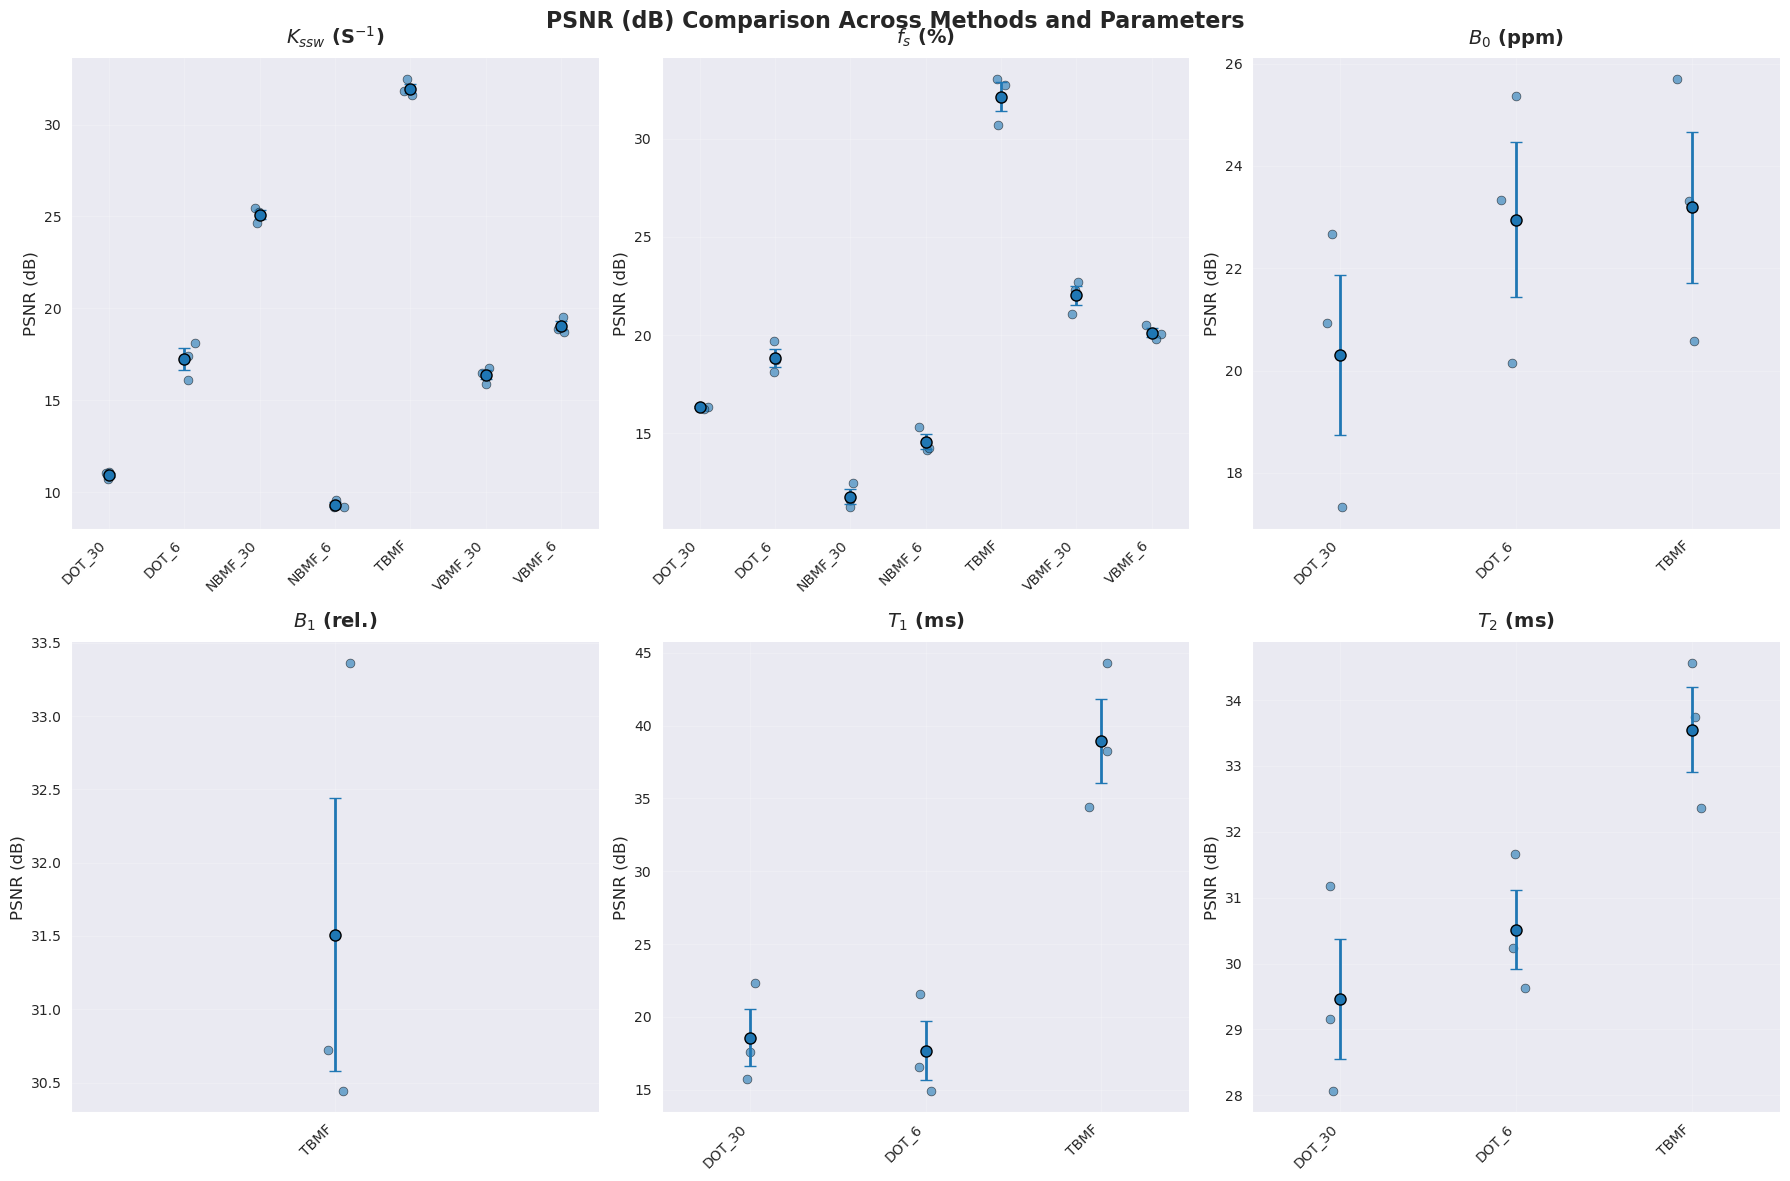

Figure saved to: PSNR_dB.png

Summary statistics for PSNR (dB):

$K_{ssw}$ (S$^{-1}$):
  DOT_30: 10.936 ± 0.206 (n=3)
  DOT_6: 17.225 ± 1.034 (n=3)
  NBMF_30: 25.105 ± 0.432 (n=3)
  NBMF_6: 9.310 ± 0.227 (n=3)
  TBMF: 31.961 ± 0.445 (n=3)
  VBMF_30: 16.386 ± 0.431 (n=3)
  VBMF_6: 19.042 ± 0.425 (n=3)

$f_s$ (%):
  DOT_30: 16.317 ± 0.093 (n=3)
  DOT_6: 18.844 ± 0.805 (n=3)
  NBMF_30: 11.777 ± 0.650 (n=3)
  NBMF_6: 14.583 ± 0.632 (n=3)
  TBMF: 32.141 ± 1.257 (n=3)
  VBMF_30: 22.018 ± 0.843 (n=3)
  VBMF_6: 20.125 ± 0.376 (n=3)

$B_0$ (ppm):
  DOT_30: 20.303 ± 2.723 (n=3)
  DOT_6: 22.947 ± 2.626 (n=3)
  TBMF: 23.193 ± 2.564 (n=3)

$B_1$ (rel.):
  TBMF: 31.508 ± 1.611 (n=3)

$T_1$ (ms):
  DOT_30: 18.572 ± 3.396 (n=3)
  DOT_6: 17.699 ± 3.474 (n=3)
  TBMF: 38.970 ± 4.994 (n=3)

$T_2$ (ms):
  DOT_30: 29.466 ± 1.579 (n=3)
  DOT_6: 30.512 ± 1.041 (n=3)
  TBMF: 33.552 ± 1.115 (n=3)

Creating NRMSE comparison plot...


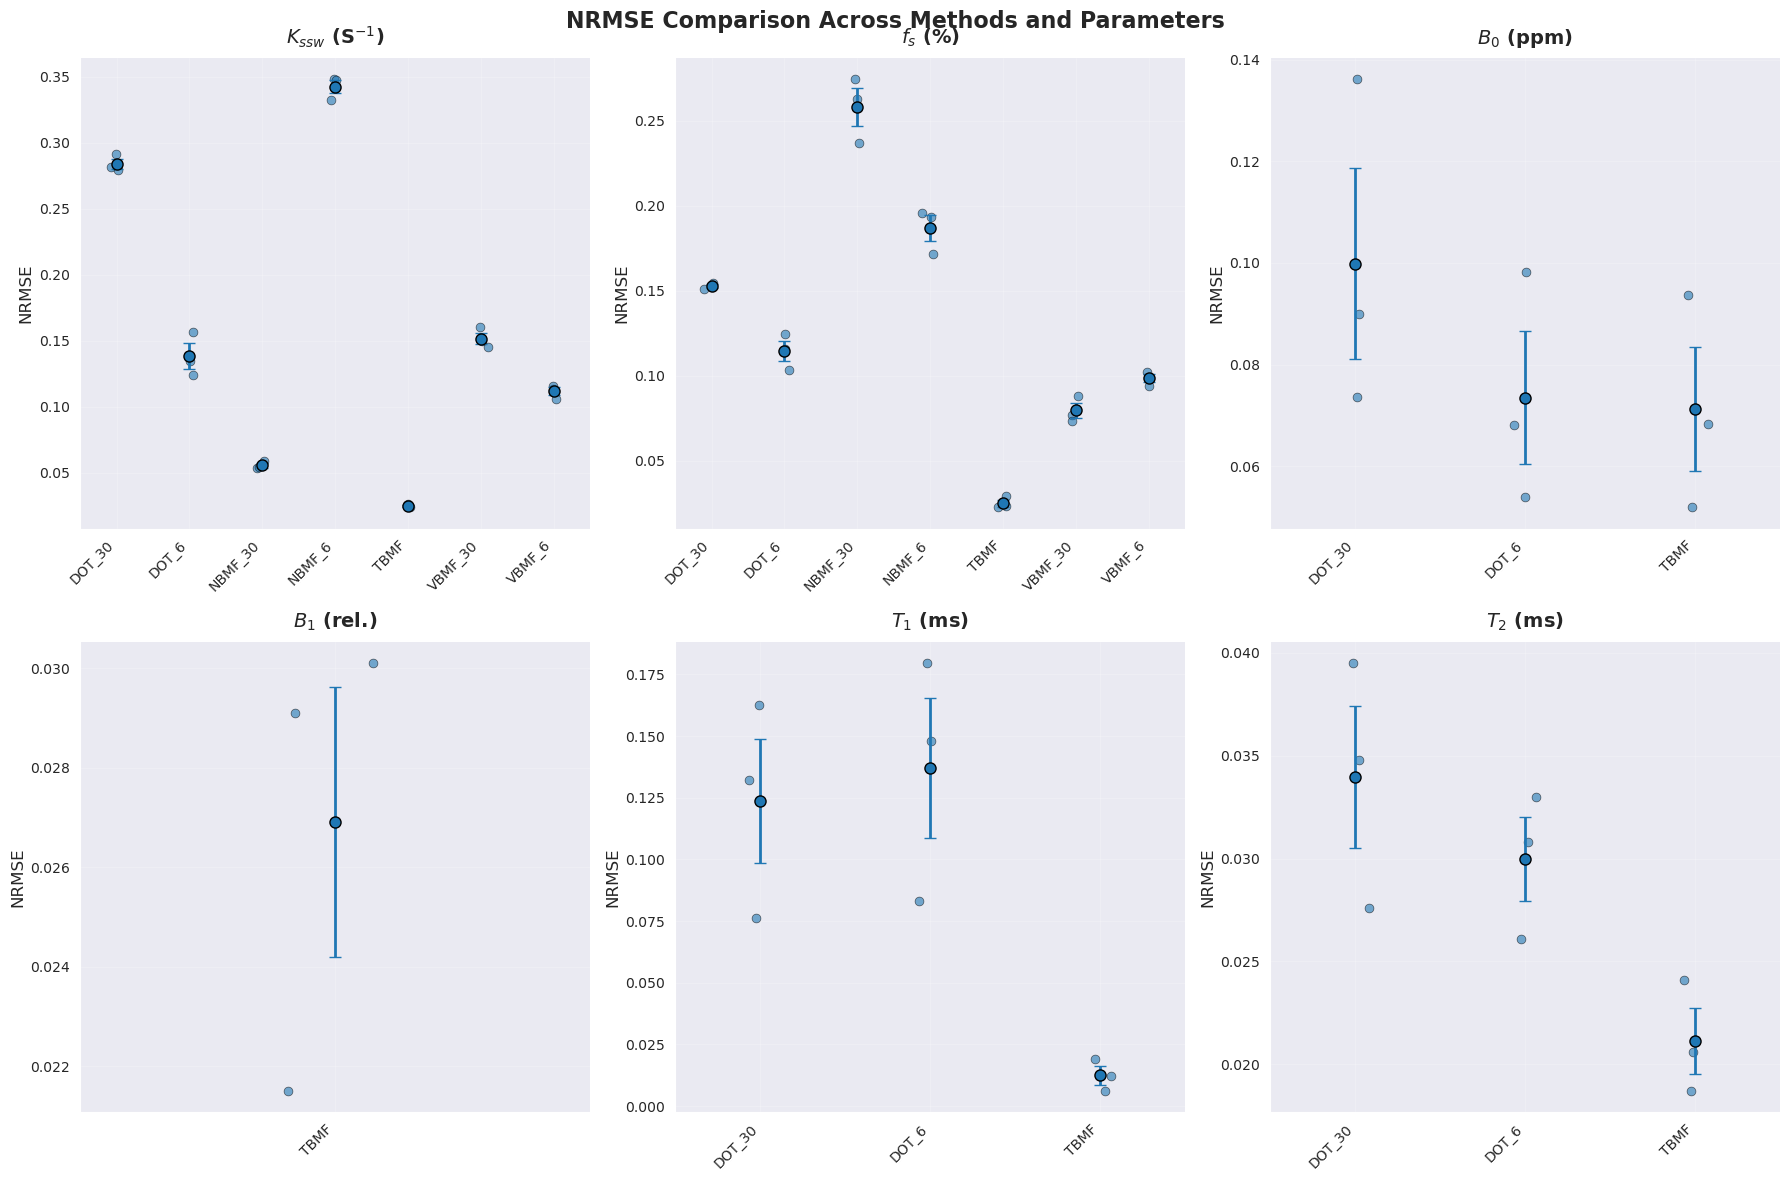

Figure saved to: NRMSE.png

Summary statistics for NRMSE:

$K_{ssw}$ (S$^{-1}$):
  DOT_30: 0.284 ± 0.007 (n=3)
  DOT_6: 0.138 ± 0.017 (n=3)
  NBMF_30: 0.056 ± 0.003 (n=3)
  NBMF_6: 0.342 ± 0.009 (n=3)
  TBMF: 0.025 ± 0.001 (n=3)
  VBMF_30: 0.152 ± 0.008 (n=3)
  VBMF_6: 0.112 ± 0.005 (n=3)

$f_s$ (%):
  DOT_30: 0.153 ± 0.002 (n=3)
  DOT_6: 0.115 ± 0.011 (n=3)
  NBMF_30: 0.258 ± 0.019 (n=3)
  NBMF_6: 0.187 ± 0.013 (n=3)
  TBMF: 0.025 ± 0.004 (n=3)
  VBMF_30: 0.080 ± 0.008 (n=3)
  VBMF_6: 0.099 ± 0.004 (n=3)

$B_0$ (ppm):
  DOT_30: 0.100 ± 0.032 (n=3)
  DOT_6: 0.073 ± 0.023 (n=3)
  TBMF: 0.071 ± 0.021 (n=3)

$B_1$ (rel.):
  TBMF: 0.027 ± 0.005 (n=3)

$T_1$ (ms):
  DOT_30: 0.124 ± 0.044 (n=3)
  DOT_6: 0.137 ± 0.049 (n=3)
  TBMF: 0.012 ± 0.007 (n=3)

$T_2$ (ms):
  DOT_30: 0.034 ± 0.006 (n=3)
  DOT_6: 0.030 ± 0.004 (n=3)
  TBMF: 0.021 ± 0.003 (n=3)

Creating SSIM comparison plot...


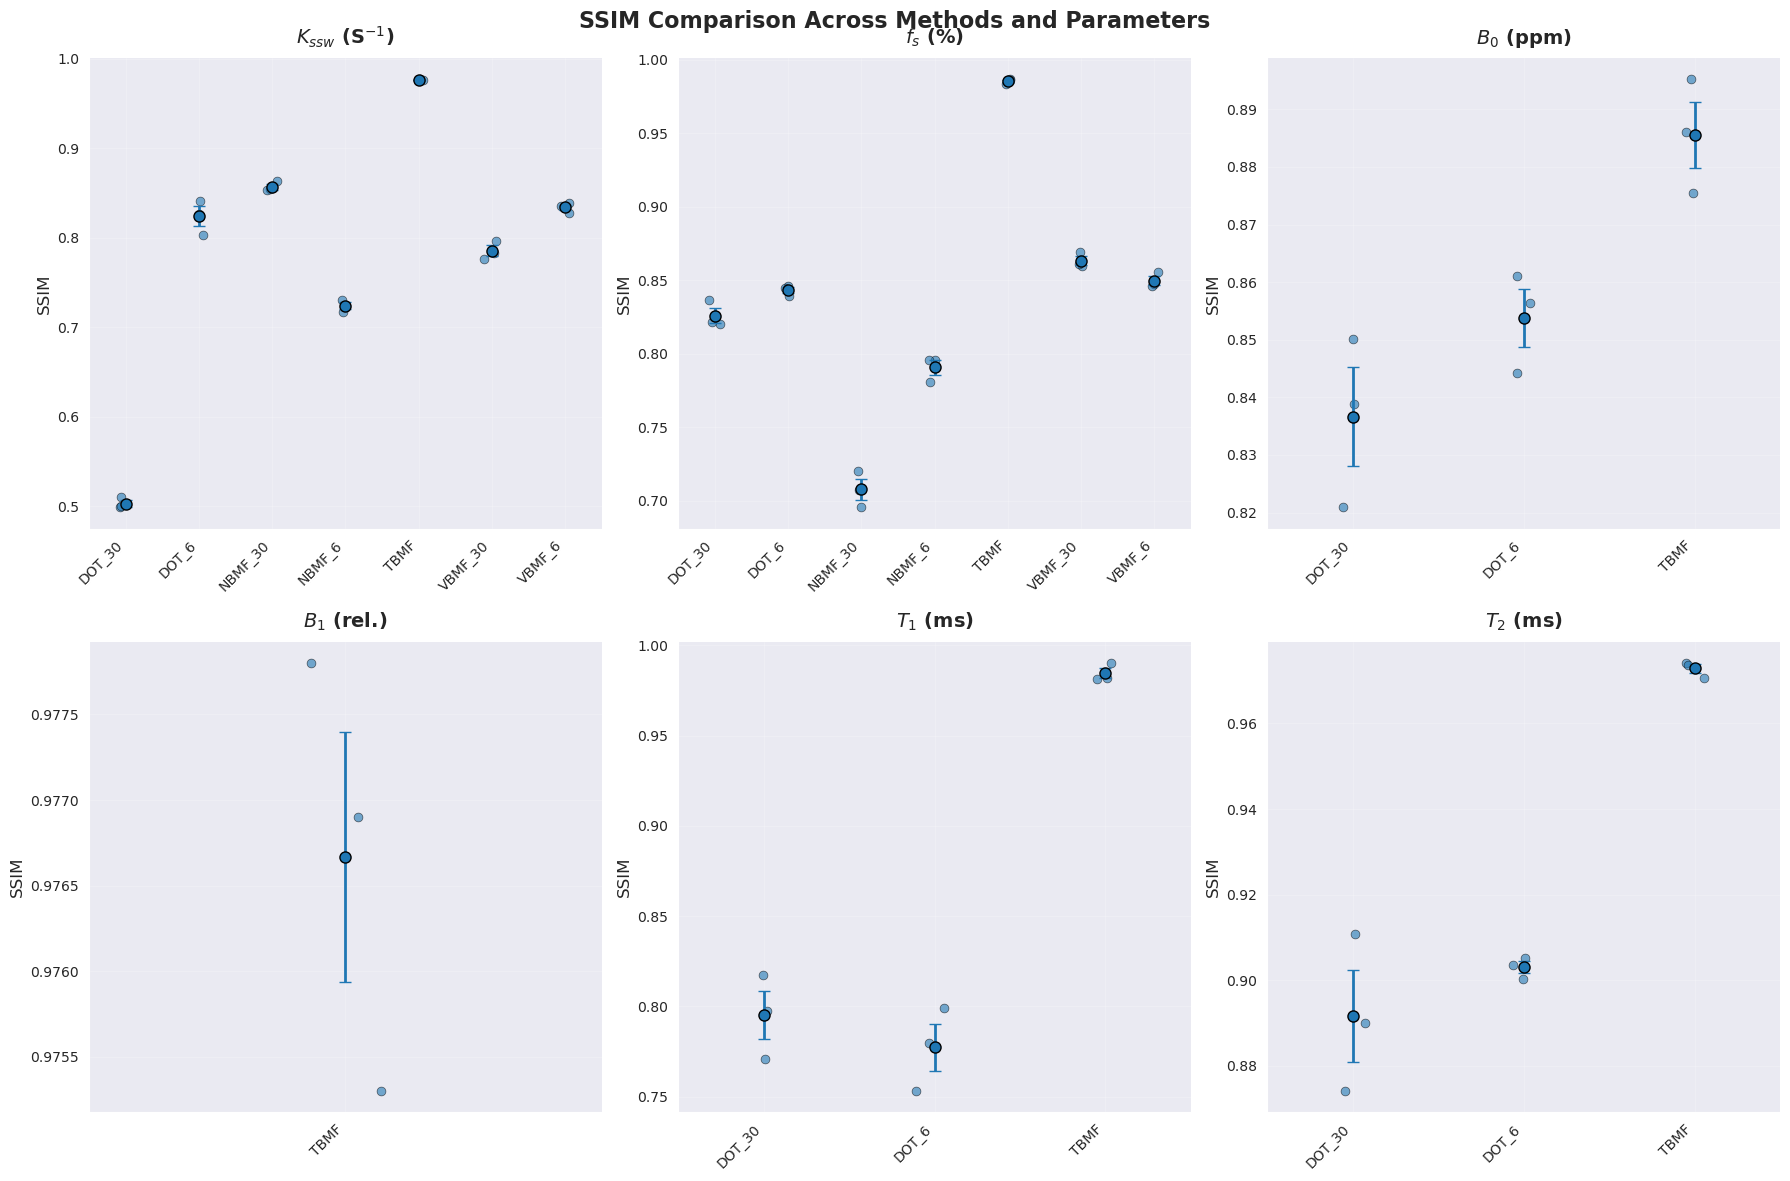

Figure saved to: SSIM.png

Summary statistics for SSIM:

$K_{ssw}$ (S$^{-1}$):
  DOT_30: 0.503 ± 0.006 (n=3)
  DOT_6: 0.824 ± 0.019 (n=3)
  NBMF_30: 0.857 ± 0.005 (n=3)
  NBMF_6: 0.724 ± 0.007 (n=3)
  TBMF: 0.977 ± 0.000 (n=3)
  VBMF_30: 0.786 ± 0.010 (n=3)
  VBMF_6: 0.834 ± 0.006 (n=3)

$f_s$ (%):
  DOT_30: 0.826 ± 0.009 (n=3)
  DOT_6: 0.843 ± 0.004 (n=3)
  NBMF_30: 0.708 ± 0.013 (n=3)
  NBMF_6: 0.791 ± 0.009 (n=3)
  TBMF: 0.985 ± 0.002 (n=3)
  VBMF_30: 0.863 ± 0.005 (n=3)
  VBMF_6: 0.850 ± 0.005 (n=3)

$B_0$ (ppm):
  DOT_30: 0.837 ± 0.015 (n=3)
  DOT_6: 0.854 ± 0.009 (n=3)
  TBMF: 0.886 ± 0.010 (n=3)

$B_1$ (rel.):
  TBMF: 0.977 ± 0.001 (n=3)

$T_1$ (ms):
  DOT_30: 0.795 ± 0.023 (n=3)
  DOT_6: 0.777 ± 0.023 (n=3)
  TBMF: 0.985 ± 0.005 (n=3)

$T_2$ (ms):
  DOT_30: 0.892 ± 0.018 (n=3)
  DOT_6: 0.903 ± 0.003 (n=3)
  TBMF: 0.973 ± 0.002 (n=3)


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def parse_metrics_data():
    """
    Parse the metrics data from the text output to create a structured DataFrame
    """

    # Raw data from your output
    data_text = """
Processing TBMF...
  vol12:
    ksw: PSNR=31.819, NRMSE=0.0256, SSIM=0.9764
    fs: PSNR=32.711, NRMSE=0.0231, SSIM=0.9867
    b0: PSNR=20.569, NRMSE=0.0937, SSIM=0.8755
    b1: PSNR=30.442, NRMSE=0.0301, SSIM=0.9753
    t1: PSNR=44.293, NRMSE=0.0061, SSIM=0.9902
    t2: PSNR=32.355, NRMSE=0.0241, SSIM=0.9707
  vol16:
    ksw: PSNR=31.605, NRMSE=0.0263, SSIM=0.9764
    fs: PSNR=33.011, NRMSE=0.0224, SSIM=0.9862
    b0: PSNR=23.316, NRMSE=0.0683, SSIM=0.8860
    b1: PSNR=30.722, NRMSE=0.0291, SSIM=0.9769
    t1: PSNR=34.389, NRMSE=0.0191, SSIM=0.9815
    t2: PSNR=34.562, NRMSE=0.0187, SSIM=0.9741
  vol17:
    ksw: PSNR=32.460, NRMSE=0.0238, SSIM=0.9771
    fs: PSNR=30.700, NRMSE=0.0292, SSIM=0.9835
    b0: PSNR=25.693, NRMSE=0.0519, SSIM=0.8952
    b1: PSNR=33.361, NRMSE=0.0215, SSIM=0.9778
    t1: PSNR=38.228, NRMSE=0.0123, SSIM=0.9819
    t2: PSNR=33.739, NRMSE=0.0206, SSIM=0.9737

Processing DOT_6...
  vol12:
    ksw: PSNR=18.140, NRMSE=0.1239, SSIM=0.8416
    fs: PSNR=18.104, NRMSE=0.1244, SSIM=0.8461
    b0: PSNR=20.149, NRMSE=0.0983, SSIM=0.8442
    t1: PSNR=21.591, NRMSE=0.0833, SSIM=0.7988
    t2: PSNR=29.634, NRMSE=0.0330, SSIM=0.9053
  vol16:
    ksw: PSNR=17.432, NRMSE=0.1344, SSIM=0.8271
    fs: PSNR=18.727, NRMSE=0.1158, SSIM=0.8394
    b0: PSNR=23.333, NRMSE=0.0681, SSIM=0.8563
    t1: PSNR=14.914, NRMSE=0.1796, SSIM=0.7530
    t2: PSNR=31.662, NRMSE=0.0261, SSIM=0.9036
  vol17:
    ksw: PSNR=16.104, NRMSE=0.1566, SSIM=0.8030
    fs: PSNR=19.702, NRMSE=0.1035, SSIM=0.8446
    b0: PSNR=25.359, NRMSE=0.0540, SSIM=0.8610
    t1: PSNR=16.591, NRMSE=0.1481, SSIM=0.7797
    t2: PSNR=30.241, NRMSE=0.0308, SSIM=0.9003

Processing DOT_30...
  vol12:
    ksw: PSNR=11.088, NRMSE=0.2790, SSIM=0.5099
    fs: PSNR=16.325, NRMSE=0.1527, SSIM=0.8362
    b0: PSNR=17.324, NRMSE=0.1361, SSIM=0.8209
    t1: PSNR=22.350, NRMSE=0.0763, SSIM=0.8172
    t2: PSNR=28.064, NRMSE=0.0395, SSIM=0.8741
  vol16:
    ksw: PSNR=11.019, NRMSE=0.2812, SSIM=0.4985
    fs: PSNR=16.220, NRMSE=0.1545, SSIM=0.8215
    b0: PSNR=20.923, NRMSE=0.0899, SSIM=0.8389
    t1: PSNR=15.775, NRMSE=0.1626, SSIM=0.7708
    t2: PSNR=31.176, NRMSE=0.0276, SSIM=0.9109
  vol17:
    ksw: PSNR=10.701, NRMSE=0.2917, SSIM=0.4996
    fs: PSNR=16.405, NRMSE=0.1513, SSIM=0.8200
    b0: PSNR=22.663, NRMSE=0.0736, SSIM=0.8502
    t1: PSNR=17.590, NRMSE=0.1320, SSIM=0.7974
    t2: PSNR=29.159, NRMSE=0.0348, SSIM=0.8900

Processing NBMF_6...
  vol12:
    ksw: PSNR=9.170, NRMSE=0.3479, SSIM=0.7242
    fs: PSNR=14.163, NRMSE=0.1958, SSIM=0.7957
  vol16:
    ksw: PSNR=9.188, NRMSE=0.3472, SSIM=0.7175
    fs: PSNR=14.276, NRMSE=0.1933, SSIM=0.7805
  vol17:
    ksw: PSNR=9.571, NRMSE=0.3322, SSIM=0.7309
    fs: PSNR=15.310, NRMSE=0.1716, SSIM=0.7955

Processing NBMF_30...
  vol12:
    ksw: PSNR=25.451, NRMSE=0.0534, SSIM=0.8630
    fs: PSNR=11.229, NRMSE=0.2745, SSIM=0.7071
  vol16:
    ksw: PSNR=25.244, NRMSE=0.0547, SSIM=0.8546
    fs: PSNR=11.607, NRMSE=0.2628, SSIM=0.6953
  vol17:
    ksw: PSNR=24.621, NRMSE=0.0587, SSIM=0.8531
    fs: PSNR=12.495, NRMSE=0.2373, SSIM=0.7204

Processing VBMF_6...
  vol12:
    ksw: PSNR=18.889, NRMSE=0.1136, SSIM=0.8385
    fs: PSNR=20.046, NRMSE=0.0995, SSIM=0.8559
  vol16:
    ksw: PSNR=19.522, NRMSE=0.1057, SSIM=0.8357
    fs: PSNR=20.534, NRMSE=0.0940, SSIM=0.8472
  vol17:
    ksw: PSNR=18.715, NRMSE=0.1159, SSIM=0.8276
    fs: PSNR=19.794, NRMSE=0.1024, SSIM=0.8459

Processing VBMF_30...
  vol12:
    ksw: PSNR=16.753, NRMSE=0.1453, SSIM=0.7966
    fs: PSNR=21.078, NRMSE=0.0883, SSIM=0.8690
  vol16:
    ksw: PSNR=16.494, NRMSE=0.1497, SSIM=0.7834
    fs: PSNR=22.270, NRMSE=0.0770, SSIM=0.8600
  vol17:
    ksw: PSNR=15.912, NRMSE=0.1601, SSIM=0.7768
    fs: PSNR=22.707, NRMSE=0.0732, SSIM=0.8608
    """

    # Parse the data
    parsed_data = []
    current_method = None
    current_volume = None

    lines = data_text.strip().split('\n')
    for line in lines:
        line = line.strip()

        if line.startswith('Processing'):
            current_method = line.split()[1].replace('...', '')
        elif line.startswith('vol'):
            current_volume = line.replace(':', '')
        elif ':' in line and 'PSNR=' in line:
            # Parse parameter line
            param = line.split(':')[0].strip()
            metrics_str = line.split(':')[1].strip()

            # Extract PSNR, NRMSE, SSIM values
            psnr_match = re.search(r'PSNR=([0-9.]+)', metrics_str)
            nrmse_match = re.search(r'NRMSE=([0-9.]+)', metrics_str)
            ssim_match = re.search(r'SSIM=([0-9.]+)', metrics_str)

            if psnr_match and nrmse_match and ssim_match:
                parsed_data.append({
                    'Method': current_method,
                    'Volume': current_volume,
                    'Parameter': param,
                    'PSNR': float(psnr_match.group(1)),
                    'NRMSE': float(nrmse_match.group(1)),
                    'SSIM': float(ssim_match.group(1))
                })

    return pd.DataFrame(parsed_data)

def create_publication_style_plots():
    """
    Create publication-style scatter plots with error bars, single color, optimized y-axis ranges
    """
    # Parse the data
    df = parse_metrics_data()

    # Parameter information
    param_info = {
        'ksw': r"$K_{ssw}$ (S$^{-1}$)",
        'fs': r"$f_s$ (%)",
        'b0': r"$B_0$ (ppm)",
        'b1': r"$B_1$ (rel.)",
        't1': r"$T_1$ (ms)",
        't2': r"$T_2$ (ms)"
    }

    # Create three separate figures for each metric
    metrics_info = [
        ('PSNR', 'PSNR (dB)'),
        ('NRMSE', 'NRMSE'),
        ('SSIM', 'SSIM')
    ]

    # Single color for all data points
    data_color = '#1f77b4'  # Blue color

    for metric_name, metric_label in metrics_info:
        print(f"\nCreating {metric_label} comparison plot...")

        # Create figure with subplots for each parameter
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for param_idx, (param_name, param_display) in enumerate(param_info.items()):
            ax = axes[param_idx]

            # Get data for this parameter
            param_data = df[df['Parameter'] == param_name].copy()

            if param_data.empty:
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center',
                       transform=ax.transAxes, fontsize=12)
                ax.set_title(param_display, fontsize=14, fontweight='bold')
                continue

            # Get unique methods for this parameter
            methods = sorted(param_data['Method'].unique())

            # Calculate statistics for each method
            method_stats = []
            x_positions = []
            all_values = []  # To track all values for this parameter

            for i, method in enumerate(methods):
                method_subset = param_data[param_data['Method'] == method]

                if method_subset.empty:
                    continue

                values = method_subset[metric_name].values

                if len(values) == 0:
                    continue

                # Calculate mean and standard error
                mean_val = np.mean(values)
                if len(values) > 1:
                    std_err = np.std(values, ddof=1) / np.sqrt(len(values))  # Standard error
                    std_dev = np.std(values, ddof=1)  # Standard deviation
                else:
                    std_err = 0
                    std_dev = 0

                method_stats.append({
                    'method': method,
                    'mean': mean_val,
                    'std_err': std_err,
                    'std_dev': std_dev,
                    'values': values,
                    'n': len(values)
                })
                x_positions.append(i)
                all_values.extend(values)  # Add to overall values for y-axis calculation

            # Plot the data
            for i, stats in enumerate(method_stats):
                # Plot individual data points with some jitter
                jitter = np.random.normal(0, 0.05, len(stats['values']))
                ax.scatter(np.full(len(stats['values']), i) + jitter,
                          stats['values'],
                          color=data_color,
                          alpha=0.6,
                          s=40,
                          edgecolors='black',
                          linewidth=0.5,
                          zorder=3)

                # Plot mean with error bars (using standard error)
                ax.errorbar(i, stats['mean'],
                           yerr=stats['std_err'],
                           color=data_color,
                           marker='o',
                           markersize=8,
                           linewidth=2,
                           capsize=4,
                           capthick=2,
                           markeredgecolor='black',
                           markeredgewidth=1,
                           zorder=4)

            # Customize the subplot
            ax.set_title(param_display, fontsize=14, fontweight='bold', pad=10)
            ax.set_ylabel(metric_label, fontsize=12)

            # Set x-axis
            if x_positions:
                ax.set_xticks(x_positions)
                ax.set_xticklabels([stats['method'] for stats in method_stats],
                                  rotation=45, ha='right', fontsize=10)
                ax.set_xlim(-0.5, len(x_positions) - 0.5)

            # Set optimized y-axis limits for this specific parameter
            if all_values:
                param_min = min(all_values)
                param_max = max(all_values)
                param_range = param_max - param_min

                # Use smaller margins for tighter axis
                if param_range > 0:
                    margin = param_range * 0.05  # 5% margin
                else:
                    margin = abs(param_min) * 0.05 if param_min != 0 else 0.1

                ax.set_ylim(param_min - margin, param_max + margin)

            # Add grid
            ax.grid(True, alpha=0.3, linewidth=0.5)
            ax.set_axisbelow(True)

            # Remove top and right spines for cleaner look
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

        # Add main title
        fig.suptitle(f'{metric_label} Comparison Across Methods and Parameters',
                     fontsize=16, fontweight='bold', y=0.98)

        # Adjust layout
        plt.tight_layout()
        plt.subplots_adjust(top=0.94)

        # Save the figure
        save_path = f"{metric_label.replace(' ', '_').replace('(', '').replace(')', '')}.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

        print(f"Figure saved to: {save_path}")

        # Print summary statistics
        print(f"\nSummary statistics for {metric_label}:")
        for param_name in param_info.keys():
            param_data = df[df['Parameter'] == param_name]
            if not param_data.empty:
                print(f"\n{param_info[param_name]}:")
                for method in sorted(param_data['Method'].unique()):
                    method_data = param_data[param_data['Method'] == method]
                    values = method_data[metric_name].values
                    mean_val = np.mean(values)
                    std_val = np.std(values, ddof=1) if len(values) > 1 else 0
                    print(f"  {method}: {mean_val:.3f} ± {std_val:.3f} (n={len(values)})")

# Set base path for saving (modify as needed)
base_path = "."

# Run the analysis
print("Creating optimized publication-style metrics plots...")
create_publication_style_plots()

Creating method comparison plots with sorted methods and individual legends...


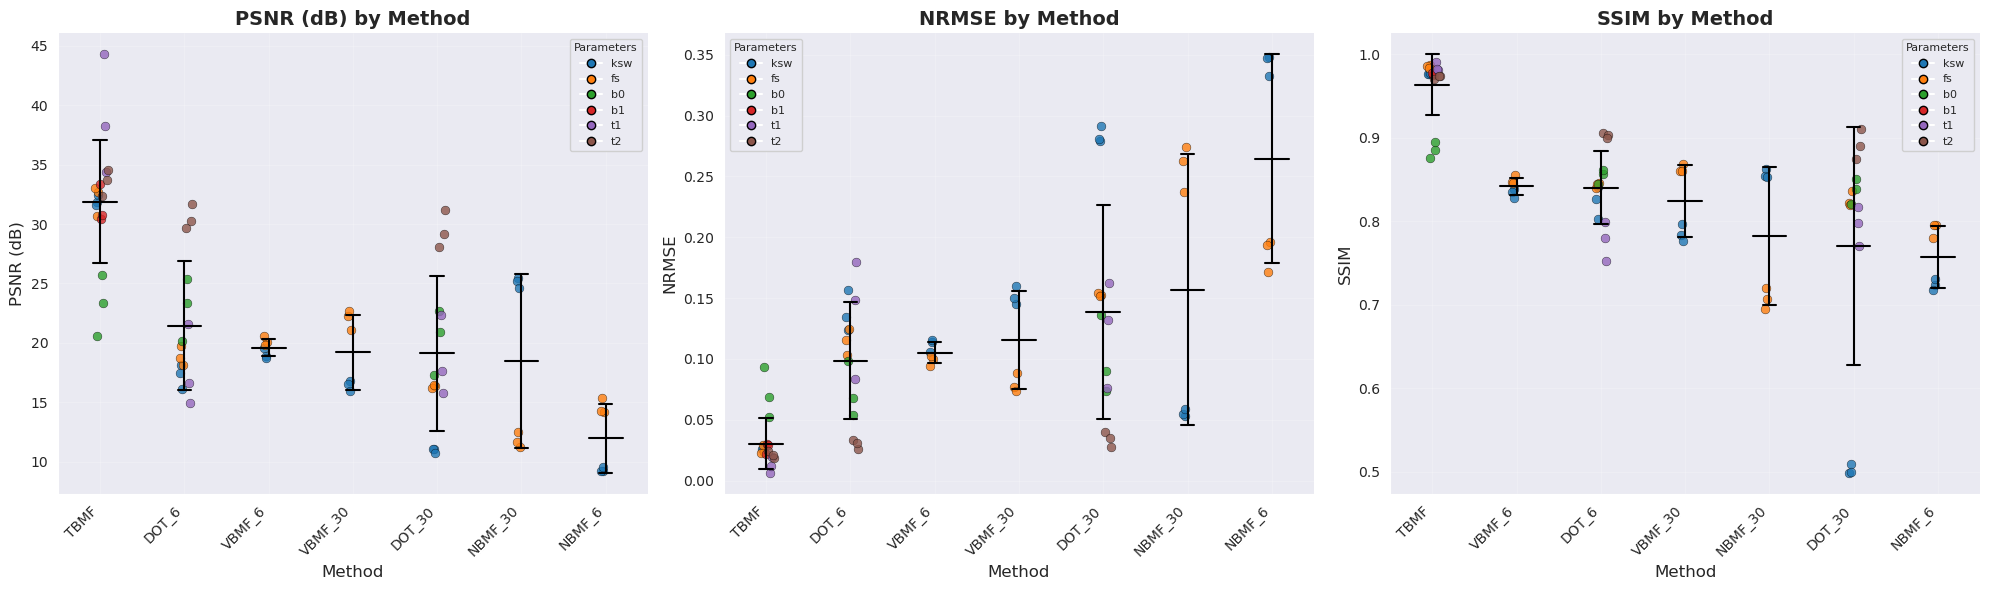

Method comparison figure with sorted methods and legends saved to: Method_Comparison_Sorted_With_Legends.png


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

def parse_metrics_data():
    """
    Parse the metrics data from the text output to create a structured DataFrame
    """

    # Raw data from your output
    data_text = """
Processing TBMF...
  vol12:
    ksw: PSNR=31.819, NRMSE=0.0256, SSIM=0.9764
    fs: PSNR=32.711, NRMSE=0.0231, SSIM=0.9867
    b0: PSNR=20.569, NRMSE=0.0937, SSIM=0.8755
    b1: PSNR=30.442, NRMSE=0.0301, SSIM=0.9753
    t1: PSNR=44.293, NRMSE=0.0061, SSIM=0.9902
    t2: PSNR=32.355, NRMSE=0.0241, SSIM=0.9707
  vol16:
    ksw: PSNR=31.605, NRMSE=0.0263, SSIM=0.9764
    fs: PSNR=33.011, NRMSE=0.0224, SSIM=0.9862
    b0: PSNR=23.316, NRMSE=0.0683, SSIM=0.8860
    b1: PSNR=30.722, NRMSE=0.0291, SSIM=0.9769
    t1: PSNR=34.389, NRMSE=0.0191, SSIM=0.9815
    t2: PSNR=34.562, NRMSE=0.0187, SSIM=0.9741
  vol17:
    ksw: PSNR=32.460, NRMSE=0.0238, SSIM=0.9771
    fs: PSNR=30.700, NRMSE=0.0292, SSIM=0.9835
    b0: PSNR=25.693, NRMSE=0.0519, SSIM=0.8952
    b1: PSNR=33.361, NRMSE=0.0215, SSIM=0.9778
    t1: PSNR=38.228, NRMSE=0.0123, SSIM=0.9819
    t2: PSNR=33.739, NRMSE=0.0206, SSIM=0.9737

Processing DOT_6...
  vol12:
    ksw: PSNR=18.140, NRMSE=0.1239, SSIM=0.8416
    fs: PSNR=18.104, NRMSE=0.1244, SSIM=0.8461
    b0: PSNR=20.149, NRMSE=0.0983, SSIM=0.8442
    t1: PSNR=21.591, NRMSE=0.0833, SSIM=0.7988
    t2: PSNR=29.634, NRMSE=0.0330, SSIM=0.9053
  vol16:
    ksw: PSNR=17.432, NRMSE=0.1344, SSIM=0.8271
    fs: PSNR=18.727, NRMSE=0.1158, SSIM=0.8394
    b0: PSNR=23.333, NRMSE=0.0681, SSIM=0.8563
    t1: PSNR=14.914, NRMSE=0.1796, SSIM=0.7530
    t2: PSNR=31.662, NRMSE=0.0261, SSIM=0.9036
  vol17:
    ksw: PSNR=16.104, NRMSE=0.1566, SSIM=0.8030
    fs: PSNR=19.702, NRMSE=0.1035, SSIM=0.8446
    b0: PSNR=25.359, NRMSE=0.0540, SSIM=0.8610
    t1: PSNR=16.591, NRMSE=0.1481, SSIM=0.7797
    t2: PSNR=30.241, NRMSE=0.0308, SSIM=0.9003

Processing DOT_30...
  vol12:
    ksw: PSNR=11.088, NRMSE=0.2790, SSIM=0.5099
    fs: PSNR=16.325, NRMSE=0.1527, SSIM=0.8362
    b0: PSNR=17.324, NRMSE=0.1361, SSIM=0.8209
    t1: PSNR=22.350, NRMSE=0.0763, SSIM=0.8172
    t2: PSNR=28.064, NRMSE=0.0395, SSIM=0.8741
  vol16:
    ksw: PSNR=11.019, NRMSE=0.2812, SSIM=0.4985
    fs: PSNR=16.220, NRMSE=0.1545, SSIM=0.8215
    b0: PSNR=20.923, NRMSE=0.0899, SSIM=0.8389
    t1: PSNR=15.775, NRMSE=0.1626, SSIM=0.7708
    t2: PSNR=31.176, NRMSE=0.0276, SSIM=0.9109
  vol17:
    ksw: PSNR=10.701, NRMSE=0.2917, SSIM=0.4996
    fs: PSNR=16.405, NRMSE=0.1513, SSIM=0.8200
    b0: PSNR=22.663, NRMSE=0.0736, SSIM=0.8502
    t1: PSNR=17.590, NRMSE=0.1320, SSIM=0.7974
    t2: PSNR=29.159, NRMSE=0.0348, SSIM=0.8900

Processing NBMF_6...
  vol12:
    ksw: PSNR=9.170, NRMSE=0.3479, SSIM=0.7242
    fs: PSNR=14.163, NRMSE=0.1958, SSIM=0.7957
  vol16:
    ksw: PSNR=9.188, NRMSE=0.3472, SSIM=0.7175
    fs: PSNR=14.276, NRMSE=0.1933, SSIM=0.7805
  vol17:
    ksw: PSNR=9.571, NRMSE=0.3322, SSIM=0.7309
    fs: PSNR=15.310, NRMSE=0.1716, SSIM=0.7955

Processing NBMF_30...
  vol12:
    ksw: PSNR=25.451, NRMSE=0.0534, SSIM=0.8630
    fs: PSNR=11.229, NRMSE=0.2745, SSIM=0.7071
  vol16:
    ksw: PSNR=25.244, NRMSE=0.0547, SSIM=0.8546
    fs: PSNR=11.607, NRMSE=0.2628, SSIM=0.6953
  vol17:
    ksw: PSNR=24.621, NRMSE=0.0587, SSIM=0.8531
    fs: PSNR=12.495, NRMSE=0.2373, SSIM=0.7204

Processing VBMF_6...
  vol12:
    ksw: PSNR=18.889, NRMSE=0.1136, SSIM=0.8385
    fs: PSNR=20.046, NRMSE=0.0995, SSIM=0.8559
  vol16:
    ksw: PSNR=19.522, NRMSE=0.1057, SSIM=0.8357
    fs: PSNR=20.534, NRMSE=0.0940, SSIM=0.8472
  vol17:
    ksw: PSNR=18.715, NRMSE=0.1159, SSIM=0.8276
    fs: PSNR=19.794, NRMSE=0.1024, SSIM=0.8459

Processing VBMF_30...
  vol12:
    ksw: PSNR=16.753, NRMSE=0.1453, SSIM=0.7966
    fs: PSNR=21.078, NRMSE=0.0883, SSIM=0.8690
  vol16:
    ksw: PSNR=16.494, NRMSE=0.1497, SSIM=0.7834
    fs: PSNR=22.270, NRMSE=0.0770, SSIM=0.8600
  vol17:
    ksw: PSNR=15.912, NRMSE=0.1601, SSIM=0.7768
    fs: PSNR=22.707, NRMSE=0.0732, SSIM=0.8608
    """

    # Parse the data
    parsed_data = []
    current_method = None
    current_volume = None

    lines = data_text.strip().split('\n')
    for line in lines:
        line = line.strip()

        if line.startswith('Processing'):
            current_method = line.split()[1].replace('...', '')
        elif line.startswith('vol'):
            current_volume = line.replace(':', '')
        elif ':' in line and 'PSNR=' in line:
            # Parse parameter line
            param = line.split(':')[0].strip()
            metrics_str = line.split(':')[1].strip()

            # Extract PSNR, NRMSE, SSIM values
            psnr_match = re.search(r'PSNR=([0-9.]+)', metrics_str)
            nrmse_match = re.search(r'NRMSE=([0-9.]+)', metrics_str)
            ssim_match = re.search(r'SSIM=([0-9.]+)', metrics_str)

            if psnr_match and nrmse_match and ssim_match:
                parsed_data.append({
                    'Method': current_method,
                    'Volume': current_volume,
                    'Parameter': param,
                    'PSNR': float(psnr_match.group(1)),
                    'NRMSE': float(nrmse_match.group(1)),
                    'SSIM': float(ssim_match.group(1))
                })

    return pd.DataFrame(parsed_data)

def create_method_comparison_sorted_with_legend():
    """
    Create method comparison plots with parameter-based coloring, cross markers,
    methods sorted by mean value, and legends in each subplot
    """
    # Parse the data
    df = parse_metrics_data()

    # Parameter colors (same as above)
    param_colors = {
        'ksw': '#1f77b4',    # Blue
        'fs': '#ff7f0e',     # Orange
        'b0': '#2ca02c',     # Green
        'b1': '#d62728',     # Red
        't1': '#9467bd',     # Purple
        't2': '#8c564b'      # Brown
    }

    # Create the three comparison plots
    metrics_info = [
        ('PSNR', 'PSNR (dB)'),
        ('NRMSE', 'NRMSE'),
        ('SSIM', 'SSIM')
    ]

    # Create a single figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for idx, (metric_name, metric_label) in enumerate(metrics_info):
        ax = axes[idx]

        # Calculate mean values for each method to sort them
        method_means = {}
        all_methods = sorted(df['Method'].unique())

        for method in all_methods:
            method_data = df[df['Method'] == method]
            all_values_for_method = []

            for param in ['ksw', 'fs', 'b0', 'b1', 't1', 't2']:
                param_data = method_data[method_data['Parameter'] == param]
                if not param_data.empty:
                    values = param_data[metric_name].tolist()
                    all_values_for_method.extend(values)

            if all_values_for_method:
                method_means[method] = np.mean(all_values_for_method)

        # Sort methods by mean value (descending for PSNR and SSIM, ascending for NRMSE)
        if metric_name == 'NRMSE':
            # For NRMSE, lower is better, so sort ascending
            sorted_methods = sorted(method_means.keys(), key=lambda x: method_means[x])
        else:
            # For PSNR and SSIM, higher is better, so sort descending
            sorted_methods = sorted(method_means.keys(), key=lambda x: method_means[x], reverse=True)

        x_positions = range(len(sorted_methods))

        # For each method, plot data for each parameter
        for i, method in enumerate(sorted_methods):
            method_data = df[df['Method'] == method]

            # Collect all parameter data for this method
            all_values_for_method = []
            param_values_by_param = {}

            for param in ['ksw', 'fs', 'b0', 'b1', 't1', 't2']:
                param_data = method_data[method_data['Parameter'] == param]
                if not param_data.empty:
                    values = param_data[metric_name].tolist()
                    param_values_by_param[param] = values
                    all_values_for_method.extend(values)

            if not all_values_for_method:
                continue

            # Plot individual points for each parameter with parameter colors
            for param, values in param_values_by_param.items():
                if values:
                    param_color = param_colors[param]
                    # Add small offset for each parameter to avoid complete overlap
                    param_offset = (list(param_colors.keys()).index(param) - 2.5) * 0.02
                    np.random.seed(42 + list(param_colors.keys()).index(param))
                    jitter = np.random.normal(param_offset, 0.03, len(values))
                    ax.scatter(np.full(len(values), i) + jitter,
                              values,
                              color=param_color,
                              alpha=0.8,
                              s=40,
                              edgecolors='black',
                              linewidth=0.3,
                              zorder=3)

            # Calculate overall statistics for this method
            mean_val = np.mean(all_values_for_method)
            std_val = np.std(all_values_for_method, ddof=1) if len(all_values_for_method) > 1 else 0

            # Plot mean as a cross (horizontal and vertical lines)
            # Horizontal line for mean
            ax.plot([i-0.2, i+0.2], [mean_val, mean_val],
                   color='black', linewidth=1.5, zorder=4)

            # Vertical line for std deviation
            if std_val > 0:
                ax.plot([i, i], [mean_val - std_val, mean_val + std_val],
                       color='black', linewidth=1.5, zorder=4)

            # Add small horizontal caps at the ends of std lines
            if std_val > 0:
                cap_width = 0.08
                ax.plot([i-cap_width, i+cap_width], [mean_val - std_val, mean_val - std_val],
                       color='black', linewidth=1.5, zorder=4)
                ax.plot([i-cap_width, i+cap_width], [mean_val + std_val, mean_val + std_val],
                       color='black', linewidth=1.5, zorder=4)

        # Customize subplot
        ax.set_title(f'{metric_label} by Method', fontsize=14, fontweight='bold')
        ax.set_ylabel(metric_label, fontsize=12)
        ax.set_xlabel('Method', fontsize=12)

        # Set x-axis
        ax.set_xticks(x_positions)
        ax.set_xticklabels(sorted_methods, rotation=45, ha='right', fontsize=10)
        ax.set_xlim(-0.5, len(sorted_methods) - 0.5)

        # Add grid
        ax.grid(True, alpha=0.3, linewidth=0.5)
        ax.set_axisbelow(True)

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Add legend to each subplot in the top right corner
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                     markersize=6, markeredgecolor='black', label=param)
                          for param, color in param_colors.items()]
        if idx == 1:
            ax.legend(handles=legend_elements, loc='upper left', fontsize=8,
                title='Parameters', title_fontsize=8, framealpha=0.9)
        else:
            ax.legend(handles=legend_elements, loc='upper right', fontsize=8,
                title='Parameters', title_fontsize=8, framealpha=0.9)

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    save_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/Method_Comparison_Sorted_With_Legends.png"
    plt.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
    plt.show()

    print("Method comparison figure with sorted methods and legends saved to: Method_Comparison_Sorted_With_Legends.png")

# Run the analysis
print("Creating method comparison plots with sorted methods and individual legends...")
create_method_comparison_sorted_with_legend()


ANOVA ANALYSIS ON IMAGE QUALITY METRICS

PSNR Analysis:
----------------------------------------
  TBMF: Mean=31.8875, Std=5.0580, N=18
  DOT_6: Mean=21.4456, Std=5.2457, N=15
  DOT_30: Mean=19.1187, Std=6.2914, N=15
  NBMF_6: Mean=11.9465, Std=2.6651, N=6
  NBMF_30: Mean=18.4412, Std=6.6794, N=6
  VBMF_6: Mean=19.5834, Std=0.6325, N=6
  VBMF_30: Mean=19.2023, Std=2.8684, N=6
  One-way ANOVA: F(6, 65) = 15.70, p < 0.0001
  Significance: ****
  Tukey's HSD performed (results stored for plotting)

NRMSE Analysis:
----------------------------------------
  TBMF: Mean=0.0303, Std=0.0204, N=18
  DOT_6: Mean=0.0986, Std=0.0466, N=15
  DOT_30: Mean=0.1389, Std=0.0849, N=15
  NBMF_6: Mean=0.2647, Std=0.0783, N=6
  NBMF_30: Mean=0.1569, Std=0.1019, N=6
  VBMF_6: Mean=0.1052, Std=0.0077, N=6
  VBMF_30: Mean=0.1156, Std=0.0366, N=6
  One-way ANOVA: F(6, 65) = 12.11, p < 0.0001
  Significance: ****
  Tukey's HSD performed (results stored for plotting)

SSIM Analysis:
-----------------------------

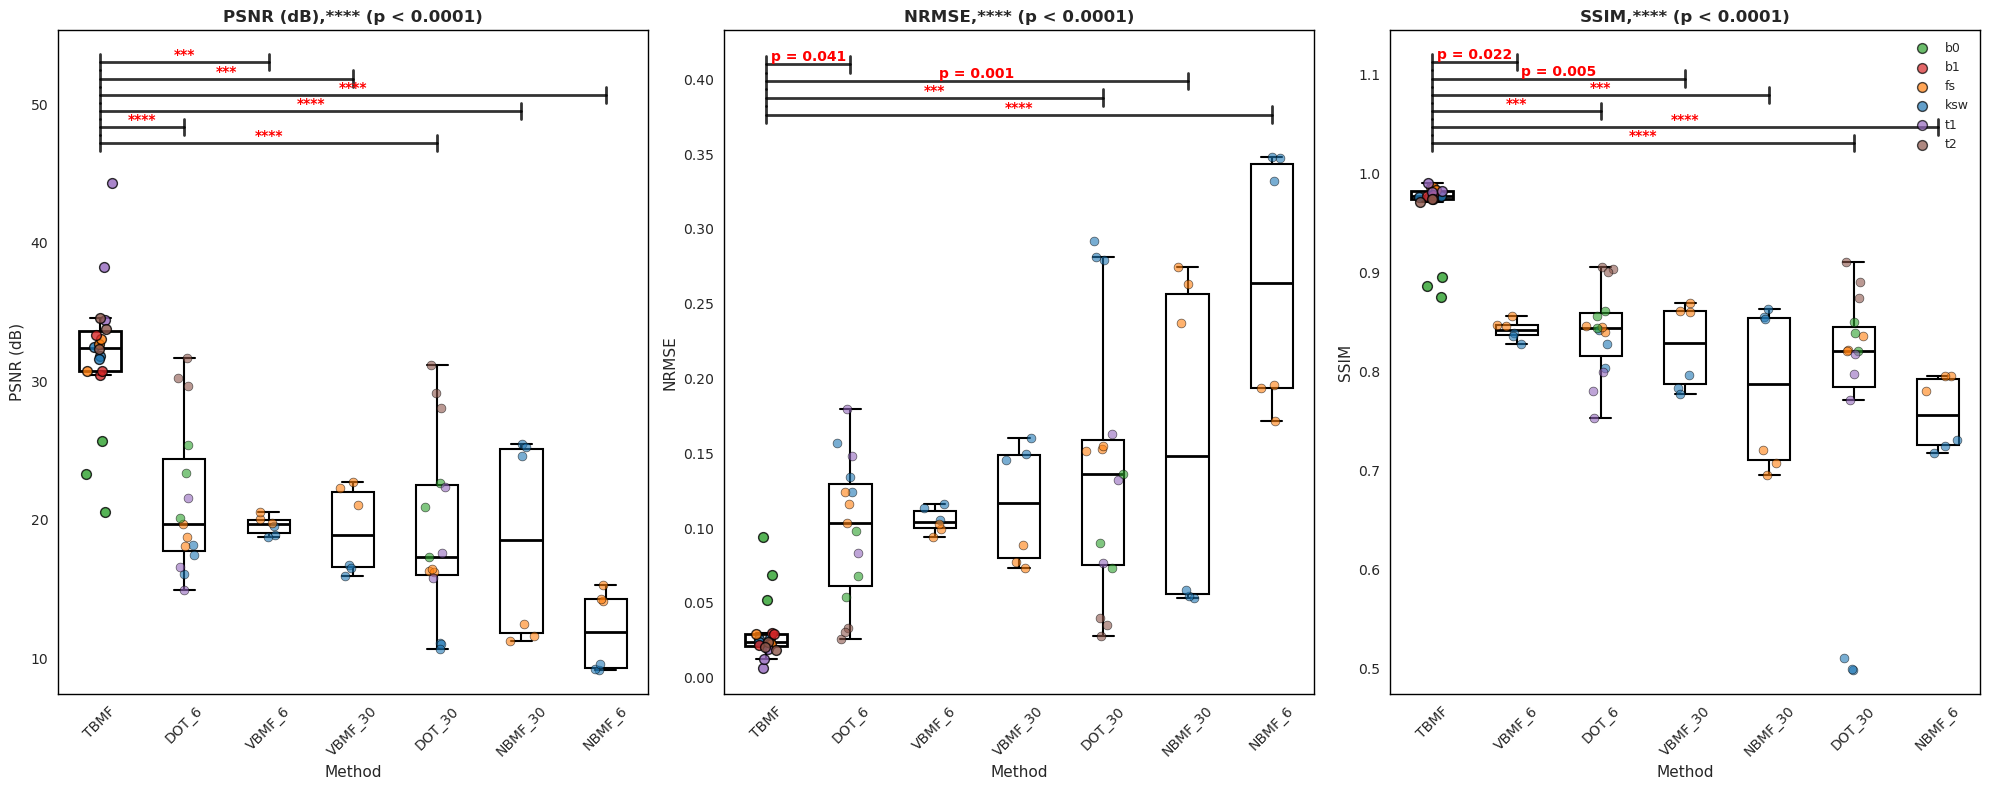

Metrics ANOVA boxplot comparison with significance brackets saved to: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/metrics_anova_boxplot_comparison_with_significance.png

ANOVA summary saved to: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/metrics_anova_summary.csv


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def perform_metrics_anova_analysis(all_results_df):
    """
    Perform ANOVA analysis on PSNR, NRMSE, and SSIM metrics from the comprehensive checkpoints
    """
    print("\n" + "=" * 80)
    print("ANOVA ANALYSIS ON IMAGE QUALITY METRICS")
    print("=" * 80)

    metrics = ['PSNR', 'NRMSE', 'SSIM']
    anova_results = {}

    for metric in metrics:
        print(f"\n{metric} Analysis:")
        print("-" * 40)

        # Filter out infinite values and get valid data
        metric_data = all_results_df[all_results_df['Status'] == 'Calculated'].copy()

        if metric == 'PSNR':
            # Handle infinite PSNR values by excluding them
            metric_data = metric_data[metric_data[metric] != 'inf']
            metric_data[metric] = pd.to_numeric(metric_data[metric], errors='coerce')

        metric_data = metric_data.dropna(subset=[metric])

        if len(metric_data) == 0:
            print(f"  No valid data for {metric}")
            continue

        # Prepare data for ANOVA
        methods = metric_data['Method'].unique()
        method_groups = {}
        all_values = []
        all_method_labels = []

        for method in methods:
            method_values = metric_data[metric_data['Method'] == method][metric].values
            method_groups[method] = method_values
            all_values.extend(method_values)
            all_method_labels.extend([method] * len(method_values))

            print(f"  {method}: Mean={np.mean(method_values):.4f}, "
                  f"Std={np.std(method_values):.4f}, N={len(method_values)}")

        # Perform one-way ANOVA
        groups = [method_groups[method] for method in methods]
        f_stat, p_value = f_oneway(*groups)

        # Determine significance
        if p_value < 0.0001:
            significance = "****"
            p_display = "p < 0.0001"
        elif p_value < 0.001:
            significance = "***"
            p_display = f"p = {p_value:.4f}"
        elif p_value < 0.01:
            significance = "**"
            p_display = f"p = {p_value:.4f}"
        elif p_value < 0.05:
            significance = "*"
            p_display = f"p = {p_value:.4f}"
        else:
            significance = "ns"
            p_display = f"p = {p_value:.4f}"

        print(f"  One-way ANOVA: F({len(methods)-1}, {len(all_values)-len(methods)}) = {f_stat:.2f}, {p_display}")
        print(f"  Significance: {significance}")

        # Store checkpoints
        anova_results[metric] = {
            'f_statistic': f_stat,
            'p_value': p_value,
            'significance': significance,
            'method_means': {method: np.mean(data) for method, data in method_groups.items()},
            'method_data': method_groups,
            'data_for_plot': metric_data
        }

        # Perform Tukey's HSD if significant
        if p_value < 0.05:
            tukey_results = pairwise_tukeyhsd(endog=all_values, groups=all_method_labels, alpha=0.05)
            anova_results[metric]['tukey_results'] = tukey_results
            print(f"  Tukey's HSD performed (checkpoints stored for plotting)")

    return anova_results

def create_metrics_boxplot_comparison(anova_results, save_path="/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/"):
    """
    Create boxplot comparison for PSNR, NRMSE, and SSIM with ANOVA checkpoints and significance brackets
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    # Define colors for methods
    method_colors = {
        'TBMF': '#0000FF',      # Red - highlighted
        'DOT_6': '#ff7f0e',     # Orange
        'DOT_30': '#d62728',    # Dark Red
        'NBMF_6': '#2ca02c',    # Green
        'NBMF_30': '#9467bd',   # Purple
        'VBMF_6': '#8c564b',    # Brown
        'VBMF_30': '#e377c2'    # Pink
    }

    # Define colors for parameters
    param_colors = {
        'ksw': '#1f77b4',     # Blue
        'fs': '#ff7f0e',      # Orange
        'b0': '#2ca02c',      # Green
        'b1': '#d62728',      # Red
        't1': '#9467bd',      # Purple
        't2': '#8c564b'       # Brown
    }

    metrics_info = [('PSNR', 'PSNR (dB)'), ('NRMSE', 'NRMSE'), ('SSIM', 'SSIM')]

    for idx, (metric, metric_label) in enumerate(metrics_info):
        ax = axes[idx]
        ax.set_facecolor('white')

        if metric not in anova_results:
            ax.text(0.5, 0.5, f'No data for {metric}', ha='center', va='center',
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(metric_label, fontsize=14, fontweight='bold')
            continue

        results = anova_results[metric]
        df = results['data_for_plot']

        # Sort methods by mean performance
        method_means = [(method, mean) for method, mean in results['method_means'].items()]

        # Sort differently based on metric (lower is better for NRMSE, higher is better for PSNR/SSIM)
        if metric == 'NRMSE':
            method_means.sort(key=lambda x: x[1])  # Ascending for NRMSE
        else:
            method_means.sort(key=lambda x: x[1], reverse=True)  # Descending for PSNR/SSIM

        sorted_methods = [method for method, _ in method_means]
        colors_for_plot = [method_colors[method] for method in sorted_methods]

        # Create boxplot
        bp = ax.boxplot([df[df['Method'] == method][metric].values for method in sorted_methods],
                       tick_labels=sorted_methods,
                       patch_artist=True,
                       showfliers=False,
                       medianprops={'color': 'black', 'linewidth': 2},
                       boxprops={'color': 'black', 'linewidth': 1.5},
                       whiskerprops={'color': 'black', 'linewidth': 1.5},
                       capprops={'color': 'black', 'linewidth': 1.5})

        # Color the boxes with special emphasis on TBMF
        for i, (patch, color, method) in enumerate(zip(bp['boxes'], colors_for_plot, sorted_methods)):
            if method == 'TBMF':
                patch.set_facecolor("none")
                patch.set_edgecolor('black')
                patch.set_linewidth(2)
            else:
                patch.set_facecolor("none")
                patch.set_edgecolor('black')
                patch.set_linewidth(1.5)

        # Add individual data points colored by parameter
        for i, method in enumerate(sorted_methods):
            method_data = df[df['Method'] == method]

            for param in method_data['Parameter'].unique():
                param_data = method_data[method_data['Parameter'] == param]
                if len(param_data) > 0:
                    x_coords = np.random.normal(i + 1, 0.08, len(param_data))

                    if method == 'TBMF':
                        ax.scatter(x_coords, param_data[metric].values,
                                 color=param_colors.get(param, 'gray'),
                                 alpha=0.8, s=50, edgecolors='black', linewidth=1,
                                 zorder=4)
                    else:
                        ax.scatter(x_coords, param_data[metric].values,
                                 color=param_colors.get(param, 'gray'),
                                 alpha=0.6, s=40, edgecolors='black', linewidth=0.5,
                                 zorder=3)

        # Add significance brackets if Tukey's HSD was performed
        if 'tukey_results' in results and results['significance'] != 'ns':
            print(f"\nProcessing significance brackets for {metric}...")

            tukey_results = results['tukey_results']

            # Print Tukey checkpoints for debugging
            print(f"Tukey checkpoints summary for {metric}:")
            print(tukey_results.summary())

            # Get current y-axis limits BEFORE adding brackets
            y_min, y_max = ax.get_ylim()
            y_range = y_max - y_min

            # Extract significant comparisons involving TBMF - FIXED parsing
            significant_comparisons = []

            # Access the correct way to get Tukey checkpoints
            tukey_df = tukey_results.summary()

            # Convert to pandas DataFrame for easier handling
            import pandas as pd
            tukey_data = []
            for i in range(1, len(tukey_df.data)):  # Skip header row
                row = tukey_df.data[i]
                tukey_data.append({
                    'group1': row[0],
                    'group2': row[1],
                    'meandiff': float(row[2]),
                    'p_adj': float(row[3]),
                    'lower': float(row[4]),
                    'upper': float(row[5]),
                    'reject': bool(row[6])
                })

            tukey_df_parsed = pd.DataFrame(tukey_data)

            # Filter for significant comparisons involving TBMF
            for _, row in tukey_df_parsed.iterrows():
                if row['reject'] and ('TBMF' in row['group1'] or 'TBMF' in row['group2']):
                    # Determine significance level
                    if row['p_adj'] < 0.0001:
                        sig_marker = "****"
                    elif row['p_adj'] < 0.001:
                        sig_marker = "***"
                    elif row['p_adj'] < 0.01:
                        sig_marker = "**"
                    elif row['p_adj'] < 0.05:
                        sig_marker = "*"
                    else:
                        continue

                    significant_comparisons.append({
                        'group1': row['group1'],
                        'group2': row['group2'],
                        'significance': sig_marker,
                        'p_adj': row['p_adj'],
                        'meandiff': row['meandiff']
                    })

            print(f"Found {len(significant_comparisons)} significant comparisons involving TBMF")
            for comp in significant_comparisons:
                print(f"  {comp['group1']} vs {comp['group2']}: {comp['significance']} (p={comp['p_adj']:.4f})")

            # Sort by significance level for better display
            sig_order = {'****': 4, '***': 3, '**': 2, '*': 1}
            significant_comparisons.sort(key=lambda x: sig_order[x['significance']], reverse=True)

            # Add brackets for significant comparisons
            bracket_height = y_range * 0.03
            bracket_offset = y_range * 0.03

            for i, comp in enumerate(significant_comparisons):  # Limit to top 6 to avoid crowding
                group1, group2 = comp['group1'], comp['group2']

                print(f"  Processing bracket {i+1}: {group1} vs {group2}")

                if group1 in sorted_methods and group2 in sorted_methods:
                    pos1 = sorted_methods.index(group1) + 1  # +1 because boxplot positions start at 1
                    pos2 = sorted_methods.index(group2) + 1

                    print(f"    Positions: {group1}={pos1}, {group2}={pos2}")

                    # Calculate bracket y-position
                    y_bracket = y_max + bracket_offset + (i * bracket_offset)

                    # Draw bracket
                    x_min, x_max = min(pos1, pos2), max(pos1, pos2)

                    # Horizontal line
                    ax.plot([x_min, x_max], [y_bracket, y_bracket], 'k-', linewidth=2, alpha=0.8)

                    # Vertical lines
                    ax.plot([x_min, x_min], [y_bracket - bracket_height/2, y_bracket + bracket_height/2], 'k-', linewidth=2, alpha=0.8)
                    ax.plot([x_max, x_max], [y_bracket - bracket_height/2, y_bracket + bracket_height/2], 'k-', linewidth=2, alpha=0.8)

                    # Add significance text - show exact p-value if > 0.001
                    if comp['p_adj'] > 0.001:
                        # Show exact p-value for p > 0.001 (includes *, **, and ns)
                        display_text = f"p = {comp['p_adj']:.3f}"
                    else:
                        # Show asterisks for p ≤ 0.001 (*** and ****)
                        display_text = comp['significance']

                    ax.text((pos1 + pos2) / 2, y_bracket,
                           display_text,
                           ha='center', va='bottom', fontweight='bold',
                           color='red', fontsize=10)

                    print(f"    Added bracket at y={y_bracket:.2f}")
                else:
                    print(f"    Skipped: {group1} or {group2} not in sorted_methods")

            # Adjust y-axis to accommodate brackets
            if significant_comparisons:
                new_y_max = y_max + bracket_offset * (len(significant_comparisons[:6]) + 2)
                ax.set_ylim(y_min, new_y_max)
                print(f"  Adjusted y-axis from {y_max:.2f} to {new_y_max:.2f}")

        # Add ANOVA checkpoints to title
        anova_title = f"{metric_label},"
        if results['p_value'] < 0.0001:
            anova_title += f"{results['significance']} (p < 0.0001)"
        else:
            anova_title += f"{results['significance']} (p = {results['p_value']:.4f})"

        ax.set_title(anova_title, fontsize=12, fontweight='bold')
        ax.set_ylabel(metric_label, fontsize=11)
        ax.set_xlabel('Method', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45, labelsize=10)

        # Style the axes
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1)

    # Add legend for parameters in the last subplot
    legend_elements = [plt.scatter([], [], color=param_colors[param], s=50, alpha=0.7,
                                 edgecolors='black', label=param)
                      for param in sorted(param_colors.keys())]
    axes[2].legend(handles=legend_elements, loc='upper right', fontsize=9, frameon=False)

    plt.tight_layout()

    # Save the plot
    save_filename = f"{save_path}metrics_anova_boxplot_comparison_with_significance.png"
    plt.savefig(save_filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"Metrics ANOVA boxplot comparison with significance brackets saved to: {save_filename}")

def run_metrics_anova_analysis():
    """
    Main function to run ANOVA analysis on the image quality metrics
    """
    # Use the existing comprehensive checkpoints data
    anova_results = perform_metrics_anova_analysis(all_results_df)

    # Create boxplot visualization
    create_metrics_boxplot_comparison(anova_results)

    # Save ANOVA checkpoints
    save_path = "/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/"

    # Create summary of ANOVA checkpoints
    summary_data = []
    for metric, results in anova_results.items():
        summary_data.append({
            'Metric': metric,
            'F_statistic': results['f_statistic'],
            'P_value': results['p_value'],
            'Significance': results['significance']
        })

    summary_df = pd.DataFrame(summary_data)
    summary_filename = f"{save_path}metrics_anova_summary.csv"
    summary_df.to_csv(summary_filename, index=False)

    print(f"\nANOVA summary saved to: {summary_filename}")

    return anova_results

# Run the metrics ANOVA analysis
metrics_anova_results = run_metrics_anova_analysis()

# APE per slice


COMPLETE SLICE-BASED APE ANALYSIS - ALL PARAMETERS
Calculating APE for slice averages...

Performing ANOVA analysis for slice-based APE...

PARAMETER-WISE ANOVA ANALYSIS - ALL PARAMETERS

------------------------------------------------------------
PARAMETER: fs
------------------------------------------------------------
One-way ANOVA for fs: F(6, 1505) = 89.76, p < 0.0001
Significance: ****

TBMF Performance for fs:
  Mean APE: 4.77%
  Median APE: 3.87%

TBMF vs Other Methods for fs - Tukey's HSD Results:
Method       Mean APE     Median APE   Mean Diff       p-value      Significance
-------------------------------------------------------------------------------------
DOT_30       63.82        69.07        +59.05%        < 0.0001     ****        
DOT_6        29.20        19.47        +24.42%        < 0.0001     ****        
NBMF_30      24.42        11.32        +19.64%        0.0008       ***         
NBMF_6       102.46       72.50        +97.68%        < 0.0001     ****        

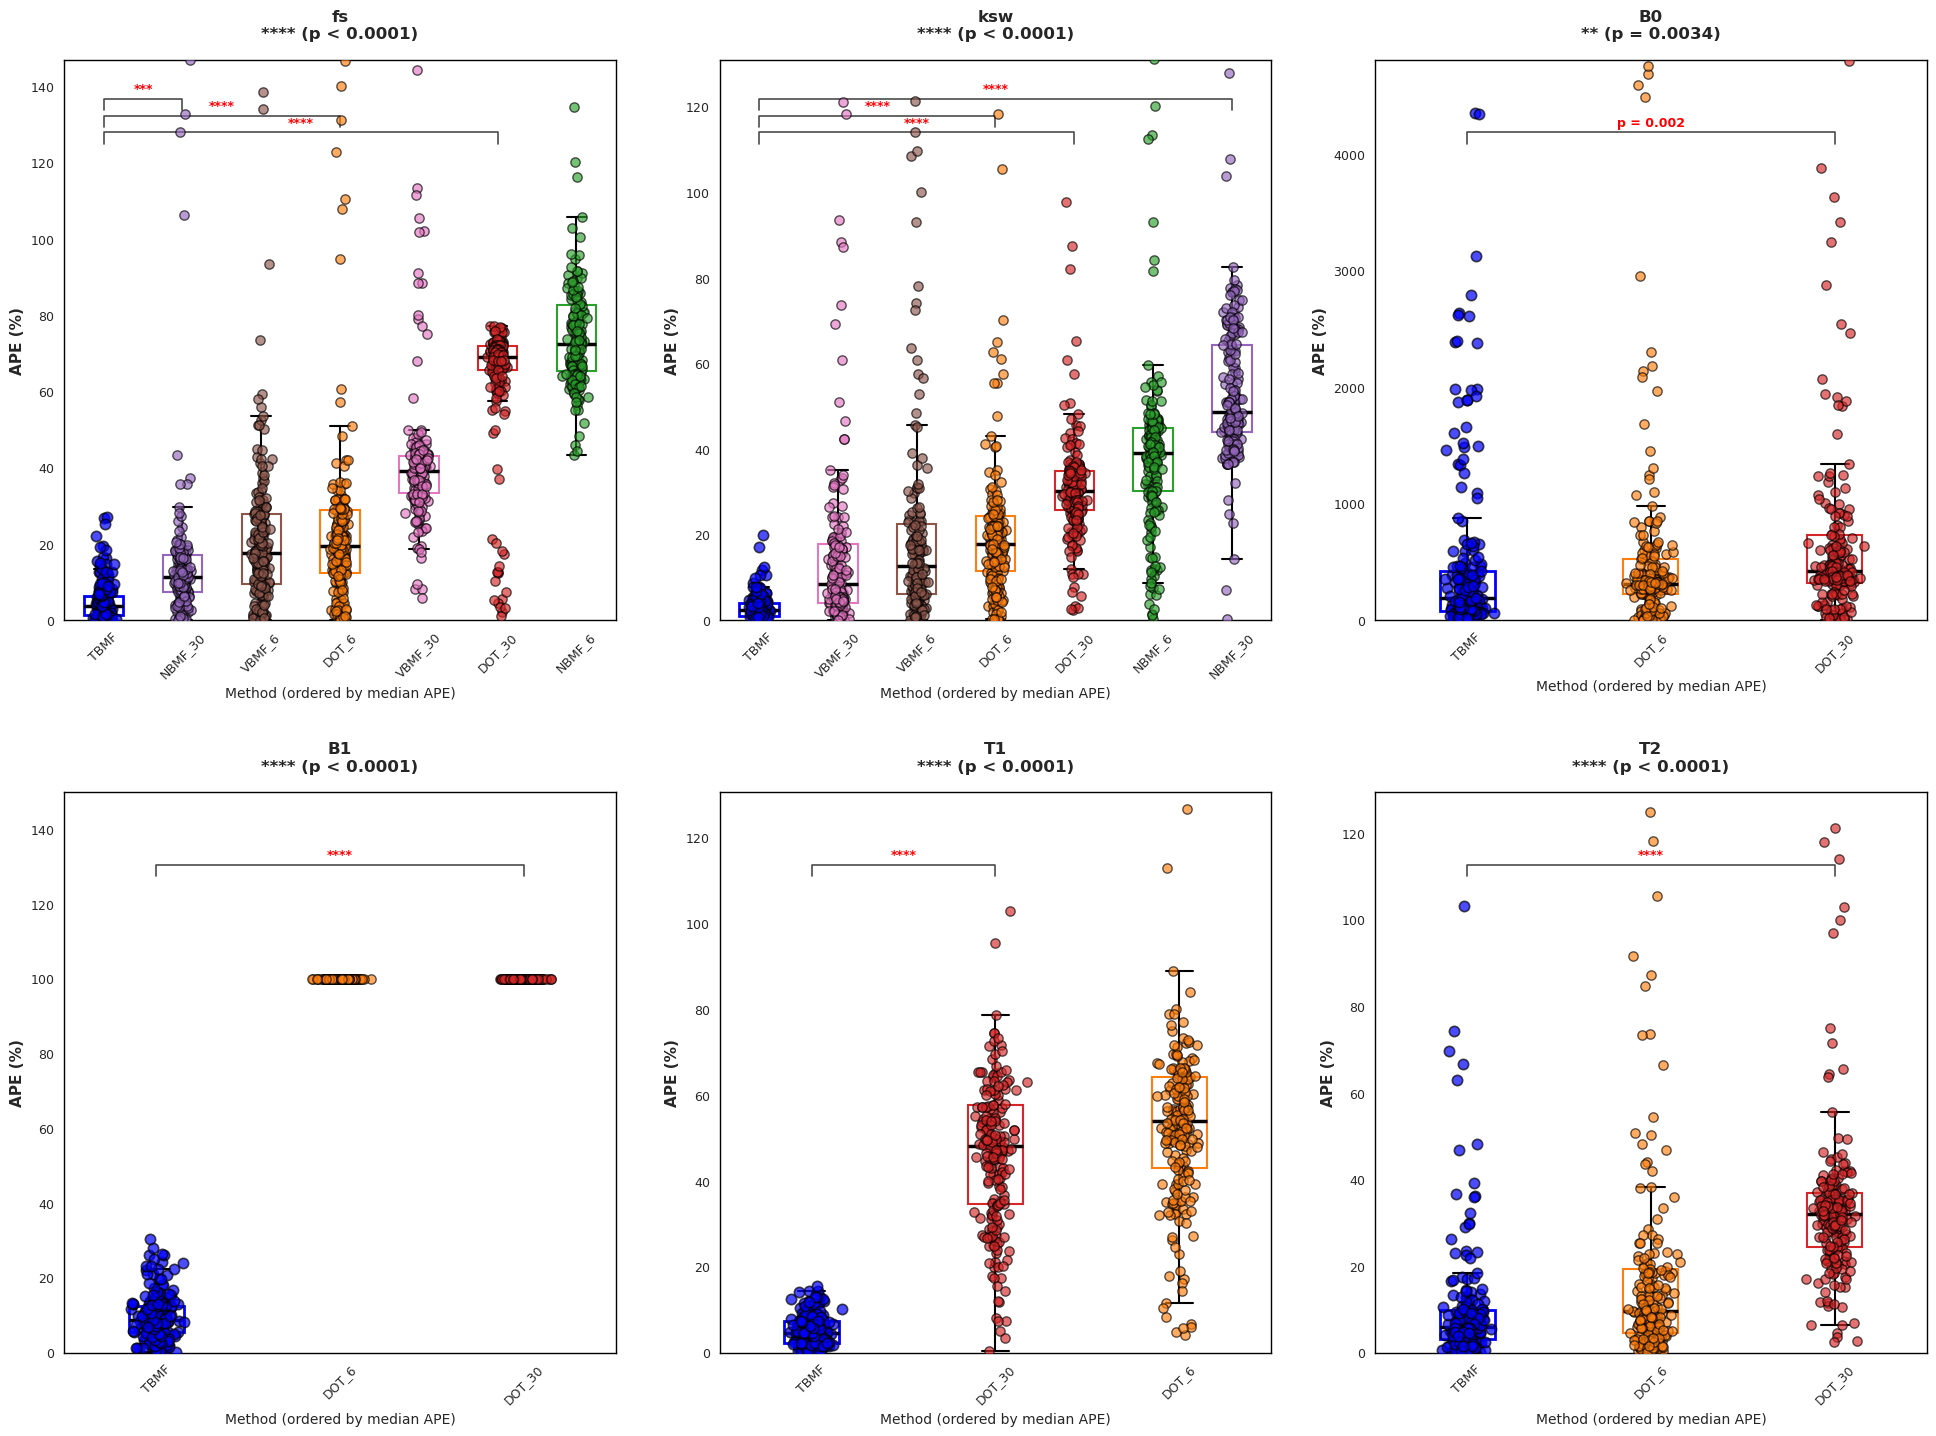

All parameter comparison plots (slice-based) saved to: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/all_parameter_comparison_slice_based.png


In [57]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import f_oneway
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import os
#
# def calculate_ape_slice_averages_complete_all_params(parameter_slice_averages, data_types, volume_ids):
#     """
#     Calculate APE for slice averages between predicted and ground truth data for ALL parameters
#     Returns structured data for analysis
#     """
#     # Parameter names for all 6 parameters
#     param_names = ['fs', 'ksw', 'B0', 'B1', 'T1', 'T2']
#     param_units = ['%', '%', 'units', 'units', 'units', 'units']
#
#     # Method name mapping
#     method_mapping = {
#         'tmbf': 'TBMF',
#         'nikita_6': 'DOT_6',
#         'nikita_30': 'DOT_30',
#         'alex_nbmf_6': 'NBMF_6',
#         'alex_nbmf_30': 'NBMF_30',
#         'alex_vbmf_6': 'VBMF_6',
#         'alex_vbmf_30': 'VBMF_30'
#     }
#
#     ape_results = {}
#     all_ape_data = []
#
#     # Calculate APE for each method vs ground truth
#     for data_type in data_types:
#         if data_type == 'gt':  # Skip ground truth
#             continue
#
#         method_name = method_mapping.get(data_type, data_type.upper())
#         ape_results[method_name] = {}
#
#         for vol_id in volume_ids:
#             if (vol_id in parameter_slice_averages[data_type] and
#                 vol_id in parameter_slice_averages['gt']):
#
#                 pred_slice_avg = parameter_slice_averages[data_type][vol_id]['slice_avg']
#                 gt_slice_avg = parameter_slice_averages['gt'][vol_id]['slice_avg']
#
#                 # Handle different parameter counts
#                 if pred_slice_avg.shape[0] == 2:  # Alex methods (2 parameters)
#                     gt_comparison = gt_slice_avg[:2]
#                     n_params = 2
#                     current_param_names = param_names[:2]
#                     current_param_units = param_units[:2]
#                 else:  # Other methods (6 parameters)
#                     gt_comparison = gt_slice_avg
#                     n_params = 6
#                     current_param_names = param_names
#                     current_param_units = param_units
#
#                 # Calculate APE with epsilon to avoid division by zero
#                 epsilon = 1e-10
#                 ape = np.abs(pred_slice_avg - gt_comparison) / (np.abs(gt_comparison) + epsilon) * 100
#
#                 # Store checkpoints
#                 ape_results[method_name][vol_id] = ape
#
#                 # Create structured data for analysis
#                 for param_idx in range(n_params):
#                     param_name = current_param_names[param_idx]
#                     param_unit = current_param_units[param_idx]
#
#                     # Get APE values for all slices of this parameter
#                     param_ape_values = ape[param_idx, :]
#
#                     # Remove NaN values
#                     valid_ape = param_ape_values[~np.isnan(param_ape_values)]
#
#                     # Add each slice APE as a separate row
#                     for slice_idx, ape_val in enumerate(valid_ape):
#                         all_ape_data.append({
#                             'Method': method_name,
#                             'Parameter': param_name,
#                             'Parameter_Unit': param_unit,
#                             'Volume_ID': vol_id,
#                             'Slice_Index': slice_idx,
#                             'APE': ape_val
#                         })
#
#     # Create DataFrame
#     ape_df = pd.DataFrame(all_ape_data)
#
#     return ape_results, ape_df, param_names, param_units
#
# def perform_parameter_wise_anova_analysis_all_params(ape_df, save_path="/home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/"):
#     """
#     Perform ANOVA analysis for ALL parameters, focusing on TBMF comparisons
#     """
#     print("\n" + "=" * 80)
#     print("PARAMETER-WISE ANOVA ANALYSIS - ALL PARAMETERS")
#     print("=" * 80)
#
#     param_anova_results = {}
#     parameters = ape_df['Parameter'].unique()
#
#     for param in parameters:
#         print(f"\n{'-' * 60}")
#         print(f"PARAMETER: {param}")
#         print(f"{'-' * 60}")
#
#         # Filter data for this parameter
#         param_data = ape_df[ape_df['Parameter'] == param]
#
#         if param_data.empty:
#             print(f"No data available for parameter {param}")
#             continue
#
#         # Get methods available for this parameter
#         methods = param_data['Method'].unique()
#
#         if len(methods) < 2:
#             print(f"Not enough methods for comparison (only {len(methods)} methods available)")
#             continue
#
#         # Prepare data for ANOVA
#         method_data = {}
#         for method in methods:
#             method_ape = param_data[param_data['Method'] == method]['APE'].values
#             method_data[method] = method_ape
#
#         # Perform one-way ANOVA for this parameter
#         groups = [method_data[method] for method in methods]
#         f_stat, p_value = f_oneway(*groups)
#
#         # Determine significance level
#         if p_value < 0.0001:
#             significance = "****"
#             p_display = "p < 0.0001"
#         elif p_value < 0.001:
#             significance = "***"
#             p_display = f"p = {p_value:.4f}"
#         elif p_value < 0.01:
#             significance = "**"
#             p_display = f"p = {p_value:.4f}"
#         elif p_value < 0.05:
#             significance = "*"
#             p_display = f"p = {p_value:.4f}"
#         else:
#             significance = "ns"
#             p_display = f"p = {p_value:.4f}"
#
#         print(f"One-way ANOVA for {param}: F({len(methods)-1}, {len(param_data)-len(methods)}) = {f_stat:.2f}, {p_display}")
#         print(f"Significance: {significance}")
#
#         # Initialize parameter checkpoints
#         param_anova_results[param] = {
#             'f_statistic': f_stat,
#             'p_value': p_value,
#             'significance': significance,
#             'methods': list(methods),
#             'tbmf_comparisons': [],
#             'method_means': {method: np.mean(data) for method, data in method_data.items()},
#             'method_medians': {method: np.median(data) for method, data in method_data.items()}
#         }
#
#         # Perform Tukey's HSD test if significant and TBMF is present
#         if p_value < 0.05 and 'TBMF' in methods:
#             # Prepare data for Tukey's test
#             all_ape_values = []
#             all_method_labels = []
#             for method in methods:
#                 method_ape = param_data[param_data['Method'] == method]['APE'].values
#                 all_ape_values.extend(method_ape)
#                 all_method_labels.extend([method] * len(method_ape))
#
#             # Perform Tukey's HSD test
#             tukey_results = pairwise_tukeyhsd(endog=all_ape_values, groups=all_method_labels, alpha=0.05)
#             param_anova_results[param]['tukey_results'] = tukey_results
#
#             # Parse checkpoints and extract only TBMF comparisons
#             tbmf_comparisons = []
#             for i in range(len(tukey_results.summary().data) - 1):
#                 if i == 0:  # Skip header row
#                     continue
#                 row = tukey_results.summary().data[i]
#                 group1, group2, meandiff, p_adj, lower, upper, reject = row
#
#                 # Only process TBMF-related comparisons
#                 if 'TBMF' in group1 or 'TBMF' in group2:
#                     # Format p-value display
#                     if p_adj < 0.0001:
#                         p_display = "< 0.0001"
#                         sig_marker = "****"
#                     elif p_adj < 0.001:
#                         p_display = f"{p_adj:.4f}"
#                         sig_marker = "***"
#                     elif p_adj < 0.01:
#                         p_display = f"{p_adj:.4f}"
#                         sig_marker = "**"
#                     elif p_adj < 0.05:
#                         p_display = f"{p_adj:.4f}"
#                         sig_marker = "*"
#                     else:
#                         p_display = f"{p_adj:.4f}"
#                         sig_marker = "ns"
#
#                     tbmf_comparisons.append({
#                         'Group1': group1,
#                         'Group2': group2,
#                         'Mean_Diff': meandiff,
#                         'P_adj': p_adj,
#                         'Significant': reject,
#                         'Significance_Level': sig_marker,
#                         'P_display': p_display
#                     })
#
#             param_anova_results[param]['tbmf_comparisons'] = tbmf_comparisons
#
#             # Display TBMF comparisons for this parameter
#             if 'TBMF' in method_data:
#                 tbmf_mean = np.mean(method_data['TBMF'])
#                 tbmf_median = np.median(method_data['TBMF'])
#                 print(f"\nTBMF Performance for {param}:")
#                 print(f"  Mean APE: {tbmf_mean:.2f}%")
#                 print(f"  Median APE: {tbmf_median:.2f}%")
#
#                 if tbmf_comparisons:
#                     print(f"\nTBMF vs Other Methods for {param} - Tukey's HSD Results:")
#                     print(f"{'Method':<12} {'Mean APE':<12} {'Median APE':<12} {'Mean Diff':<15} {'p-value':<12} {'Significance':<12}")
#                     print("-" * 85)
#
#                     for comp in tbmf_comparisons:
#                         other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
#                         other_mean = np.mean(method_data[other_method])
#                         other_median = np.median(method_data[other_method])
#                         diff = other_mean - tbmf_mean
#
#                         print(f"{other_method:<12} {other_mean:<12.2f} {other_median:<12.2f} {diff:+.2f}%        {comp['P_display']:<12} {comp['Significance_Level']:<12}")
#         else:
#             param_anova_results[param]['tukey_results'] = None
#
#     return param_anova_results
#
# def create_all_parameter_comparison_plots(ape_df, param_anova_results, save_path="/home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/"):
#     """
#     Create comparison plots for ALL parameters (slice-based analysis only)
#     """
#     # Define colors for each method - highlight TBMF
#     method_colors = {
#         'TBMF': '#0000FF',      # Blue
#         'DOT_6': '#ff7f0e',     # Orange
#         'DOT_30': '#d62728',    # Dark Red
#         'NBMF_6': '#2ca02c',    # Green
#         'NBMF_30': '#9467bd',   # Purple
#         'VBMF_6': '#8c564b',    # Brown
#         'VBMF_30': '#e377c2'    # Pink
#     }
#
#     parameters = ape_df['Parameter'].unique()
#     n_params = len(parameters)
#
#     # Create figure with appropriate layout
#     if n_params <= 6:
#         n_rows = 2
#         n_cols = 3
#     else:
#         n_rows = 3
#         n_cols = 3
#
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), facecolor='white')
#     axes = axes.flatten() if n_params > 1 else [axes]
#
#     # Y-axis limits for different parameters (adjust as needed)
#     y_lims = {'fs': 400, 'ksw': 400, 'B0': 400, 'B1': 400, 'T1': 400, 'T2': 400}
#
#     for i, param in enumerate(parameters):
#         if i >= len(axes):
#             break
#
#         ax = axes[i]
#         ax.set_facecolor('white')
#
#         # Filter data for this parameter
#         param_data = ape_df[ape_df['Parameter'] == param]
#
#         if param_data.empty:
#             ax.text(0.5, 0.5, f'No data for {param}', ha='center', va='center',
#                    transform=ax.transAxes, fontsize=12)
#             ax.set_title(param, fontsize=14, fontweight='bold')
#             continue
#
#         # Get methods and sort by median APE
#         methods = param_data['Method'].unique()
#         method_medians = []
#         for method in methods:
#             method_ape = param_data[param_data['Method'] == method]['APE']
#             median_ape = np.median(method_ape)
#             method_medians.append((method, median_ape))
#
#         # Sort by median APE in ascending order
#         method_medians.sort(key=lambda x: x[1])
#         methods_sorted = [method for method, _ in method_medians]
#
#         # Create enhanced boxplot
#         bp = ax.boxplot([param_data[param_data['Method'] == method]['APE'].values
#                         for method in methods_sorted],
#                        tick_labels=methods_sorted,
#                        patch_artist=True,
#                        showfliers=False,
#                        medianprops={'color': 'black', 'linewidth': 2.5},
#                        boxprops={'linewidth': 1.5},
#                        whiskerprops={'linewidth': 1.5},
#                        capprops={'linewidth': 1.5})
#
#         # Color the boxes with special emphasis on TBMF
#         for j, (patch, method) in enumerate(zip(bp['boxes'], methods_sorted)):
#             color = method_colors.get(method, '#808080')
#             if method == 'TBMF':
#                 patch.set_facecolor("none")
#                 patch.set_edgecolor(color)
#                 patch.set_linewidth(2)
#             else:
#                 patch.set_facecolor("none")
#                 patch.set_edgecolor(color)
#                 patch.set_linewidth(1.5)
#
#         # Add individual points with jitter
#         for j, method in enumerate(methods_sorted):
#             method_ape = param_data[param_data['Method'] == method]['APE'].values
#             x_coords = np.random.normal(j + 1, 0.05, len(method_ape))
#
#             if method == 'TBMF':
#                 ax.scatter(x_coords, method_ape, color=method_colors[method],
#                           alpha=0.7, s=55, edgecolors='black', linewidth=1.2,
#                           zorder=4, marker='o')
#             else:
#                 ax.scatter(x_coords, method_ape, color=method_colors.get(method, '#808080'),
#                           alpha=0.65, s=45, edgecolors='black', linewidth=1,
#                           zorder=3)
#
#         # Enhanced title with ANOVA checkpoints
#         if param in param_anova_results:
#             anova_result = param_anova_results[param]
#             if anova_result['significance'] != 'ns':
#                 title_text = f"{param}\n{anova_result['significance']}"
#                 if anova_result['p_value'] < 0.0001:
#                     title_text += " (p < 0.0001)"
#                 else:
#                     title_text += f" (p = {anova_result['p_value']:.4f})"
#             else:
#                 title_text = f"{param}\nns (p = {anova_result['p_value']:.3f})"
#         else:
#             title_text = param
#
#         ax.set_title(title_text, fontsize=12, fontweight='bold', pad=15)
#
#         # Enhanced axis labels and formatting
#         ax.set_ylabel('APE (%)', fontsize=11, fontweight='bold')
#         ax.set_xlabel('Method (ordered by median APE)', fontsize=10)
#         ax.grid(True, alpha=0.3, linestyle='--')
#         ax.tick_params(axis='x', rotation=45, labelsize=9)
#         ax.tick_params(axis='y', labelsize=9)
#
#         # Set y-axis limits
#         default_ylim = 100
#         y_max = np.percentile(param_data['APE'], 95)
#         ax.set_ylim(0, y_max * 1.5)
#
#         # Add significance brackets for TBMF comparisons if significant
#         if (param in param_anova_results and
#             param_anova_results[param]['significance'] != 'ns' and
#             'TBMF' in methods_sorted and
#             param_anova_results[param]['tbmf_comparisons']):
#
#             tbmf_pos = methods_sorted.index('TBMF') + 1
#             significant_comps = [comp for comp in param_anova_results[param]['tbmf_comparisons']
#                                if comp['Significant']]
#
#             y_max_plot = ax.get_ylim()[1]
#
#             for k, comp in enumerate(significant_comps[:3]):  # Limit to top 3 to avoid crowding
#                 other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
#                 if other_method in methods_sorted:
#                     other_pos = methods_sorted.index(other_method) + 1
#                     y = y_max_plot * (0.85 + k * 0.03)
#
#                     # Draw bracket
#                     ax.plot([min(tbmf_pos, other_pos), min(tbmf_pos, other_pos),
#                             max(tbmf_pos, other_pos), max(tbmf_pos, other_pos)],
#                            [y, y + y_max_plot * 0.02, y + y_max_plot * 0.02, y],
#                            'k-', linewidth=1.2, alpha=0.7)
#
#                     # Add significance text
#                     if comp['P_adj'] > 0.001:
#                         display_text = f"p = {comp['P_adj']:.3f}"
#                     else:
#                         display_text = comp['Significance_Level']
#
#                     ax.text((tbmf_pos + other_pos) / 2, y + y_max_plot * 0.026,
#                            display_text,
#                            ha='center', va='bottom', fontweight='bold',
#                            color='red', fontsize=9)
#
#         # Style the axes
#         for spine in ax.spines.values():
#             spine.set_visible(True)
#             spine.set_color('black')
#             spine.set_linewidth(1)
#
#     # Hide unused subplots
#     for i in range(len(parameters), len(axes)):
#         axes[i].set_visible(False)
#
#     plt.tight_layout(pad=3.0)
#
#     # Save the plot
#     plot_filename = f"{save_path}all_parameter_comparison_slice_based.png"
#     plt.savefig(plot_filename, dpi=300, bbox_inches='tight', facecolor='white')
#     plt.show()
#
#     print(f"All parameter comparison plots (slice-based) saved to: {plot_filename}")
#
# def create_ape_summary_table_all_params(ape_df):
#     """
#     Create summary statistics table for all parameters
#     """
#     summary_stats = []
#
#     for param in ape_df['Parameter'].unique():
#         param_data = ape_df[ape_df['Parameter'] == param]
#
#         for method in param_data['Method'].unique():
#             method_data = param_data[param_data['Method'] == method]
#             ape_values = method_data['APE'].values
#
#             summary_stats.append({
#                 'Parameter': param,
#                 'Method': method,
#                 'N_Data_Points': len(ape_values),
#                 'Mean_APE': np.mean(ape_values),
#                 'Median_APE': np.median(ape_values),
#                 'Std_APE': np.std(ape_values),
#                 'Q25_APE': np.percentile(ape_values, 25),
#                 'Q75_APE': np.percentile(ape_values, 75),
#                 'Min_APE': np.min(ape_values),
#                 'Max_APE': np.max(ape_values)
#             })
#
#     return pd.DataFrame(summary_stats)
#
# def run_complete_slice_based_ape_analysis(parameter_slice_averages, data_types, volume_ids,
#                                          save_path="/home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/"):
#     """
#     Main function to run complete APE analysis for ALL parameters with slice-based analysis only
#     """
#     print("\n" + "=" * 80)
#     print("COMPLETE SLICE-BASED APE ANALYSIS - ALL PARAMETERS")
#     print("=" * 80)
#
#     # 1. Calculate APE for slice averages (all parameters)
#     print("Calculating APE for slice averages...")
#     slice_ape_results, slice_ape_df, param_names, param_units = calculate_ape_slice_averages_complete_all_params(
#         parameter_slice_averages, data_types, volume_ids
#     )
#
#     # 2. Perform ANOVA analysis for slice-based APE
#     print("\nPerforming ANOVA analysis for slice-based APE...")
#     slice_param_anova_results = perform_parameter_wise_anova_analysis_all_params(slice_ape_df, save_path)
#
#     # 3. Create comparison plots for slice-based APE
#     print("\nCreating slice-based comparison plots...")
#     create_all_parameter_comparison_plots(slice_ape_df, slice_param_anova_results, save_path)
#
#     # # 4. Create summary table
#     # print("\nCreating summary statistics...")
#     # slice_summary_table = create_ape_summary_table_all_params(slice_ape_df)
#
#     # # 5. Display summary statistics
#     # print("\n" + "=" * 60)
#     # print("SLICE-BASED APE SUMMARY STATISTICS")
#     # print("=" * 60)
#     #
#     # for param in param_names:
#     #     if param in slice_ape_df['Parameter'].values:
#     #         param_summary = slice_summary_table[slice_summary_table['Parameter'] == param]
#     #         if not param_summary.empty:
#     #             print(f"\n{param.upper()} Parameter (Slice-based):")
#     #             print("-" * 40)
#     #             for _, row in param_summary.iterrows():
#     #                 print(f"  {row['Method']:10}: "
#     #                       f"Median={row['Median_APE']:6.2f}%, "
#     #                       f"Mean={row['Mean_APE']:6.2f}%, "
#     #                       f"IQR=[{row['Q25_APE']:5.2f}%, {row['Q75_APE']:5.2f}%], "
#     #                       f"N={row['N_Data_Points']:3d}")
#     #
#     #             # Show ANOVA checkpoints for this parameter
#     #             if param in slice_param_anova_results:
#     #                 anova_result = slice_param_anova_results[param]
#     #                 print(f"    ANOVA: F = {anova_result['f_statistic']:.2f}, {anova_result['significance']}")
#
#     # # 6. Save all checkpoints
#     # print(f"\nSaving checkpoints to: {save_path}")
#     #
#     # # Save slice-based APE data and checkpoints
#     # slice_ape_df.to_csv(f"{save_path}slice_based_ape_data.csv", index=False)
#     # slice_summary_table.to_csv(f"{save_path}slice_based_ape_summary.csv", index=False)
#     #
#     # # Save ANOVA checkpoints for slice-based APE
#     # slice_param_summary = []
#     # slice_tbmf_comparisons_all = []
#     #
#     # for param, checkpoints in slice_param_anova_results.items():
#     #     slice_param_summary.append({
#     #         'Parameter': param,
#     #         'Analysis_Type': 'Slice_Based',
#     #         'F_statistic': checkpoints['f_statistic'],
#     #         'P_value': checkpoints['p_value'],
#     #         'Significance': checkpoints['significance'],
#     #         'N_methods': len(checkpoints['methods']),
#     #         'Methods': ', '.join(checkpoints['methods']),
#     #         'TBMF_mean_APE': checkpoints['method_means'].get('TBMF', 'N/A'),
#     #         'TBMF_median_APE': checkpoints['method_medians'].get('TBMF', 'N/A')
#     #     })
#     #
#     #     for comp in checkpoints['tbmf_comparisons']:
#     #         comp_copy = comp.copy()
#     #         comp_copy['Parameter'] = param
#     #         comp_copy['Analysis_Type'] = 'Slice_Based'
#     #         slice_tbmf_comparisons_all.append(comp_copy)
#     #
#     #
#     # print("Analysis completed!")
#     # print(f"Files saved:")
#     # print(f"  - slice_based_ape_data.csv")
#     # print(f"  - slice_based_ape_summary.csv")
#     # print(f"  - slice_based_anova_summary.csv")
#     # print(f"  - slice_based_tbmf_comparisons.csv")
#     # print(f"  - all_parameter_comparison_slice_based.png")
#     return None
#     # return {
#     #     'slice_ape_results': slice_ape_results,
#     #     'slice_ape_df': slice_ape_df,
#     #     'slice_summary_table': slice_summary_table,
#     #     'slice_param_anova_results': slice_param_anova_results
#     # }
# #
# # Execute the slice-based analysis only
# if __name__ == "__main__":
#     # Make sure you have the required variables from your previous code:
#     # parameter_slice_averages, data_types, volume_ids
#
#     # Run the slice-based analysis only
#     checkpoints = run_complete_slice_based_ape_analysis(
#         parameter_slice_averages,
#         data_types,
#         volume_ids
#     )


COMPLETE SLICE-BASED APE ANALYSIS - ALL PARAMETERS
Calculating APE for slice averages...

Performing parameter-wise ANOVA analysis...

PARAMETER-WISE ANOVA ANALYSIS - ALL PARAMETERS

------------------------------------------------------------
PARAMETER: fs
------------------------------------------------------------
One-way ANOVA for fs: F(6, 1505) = 89.76, p < 0.0001
Significance: ****

TBMF Performance for fs:
  Mean APE: 4.77%
  Median APE: 3.87%

TBMF vs Other Methods for fs - Tukey's HSD Results:
Method       Mean APE     Median APE   Mean Diff       p-value      Significance
-------------------------------------------------------------------------------------
DOT_30       63.82        69.07        +59.05%        < 0.0001     ****        
DOT_6        29.20        19.47        +24.42%        < 0.0001     ****        
NBMF_30      24.42        11.32        +19.64%        0.0008       ***         
NBMF_6       102.46       72.50        +97.68%        < 0.0001     ****        
VBMF

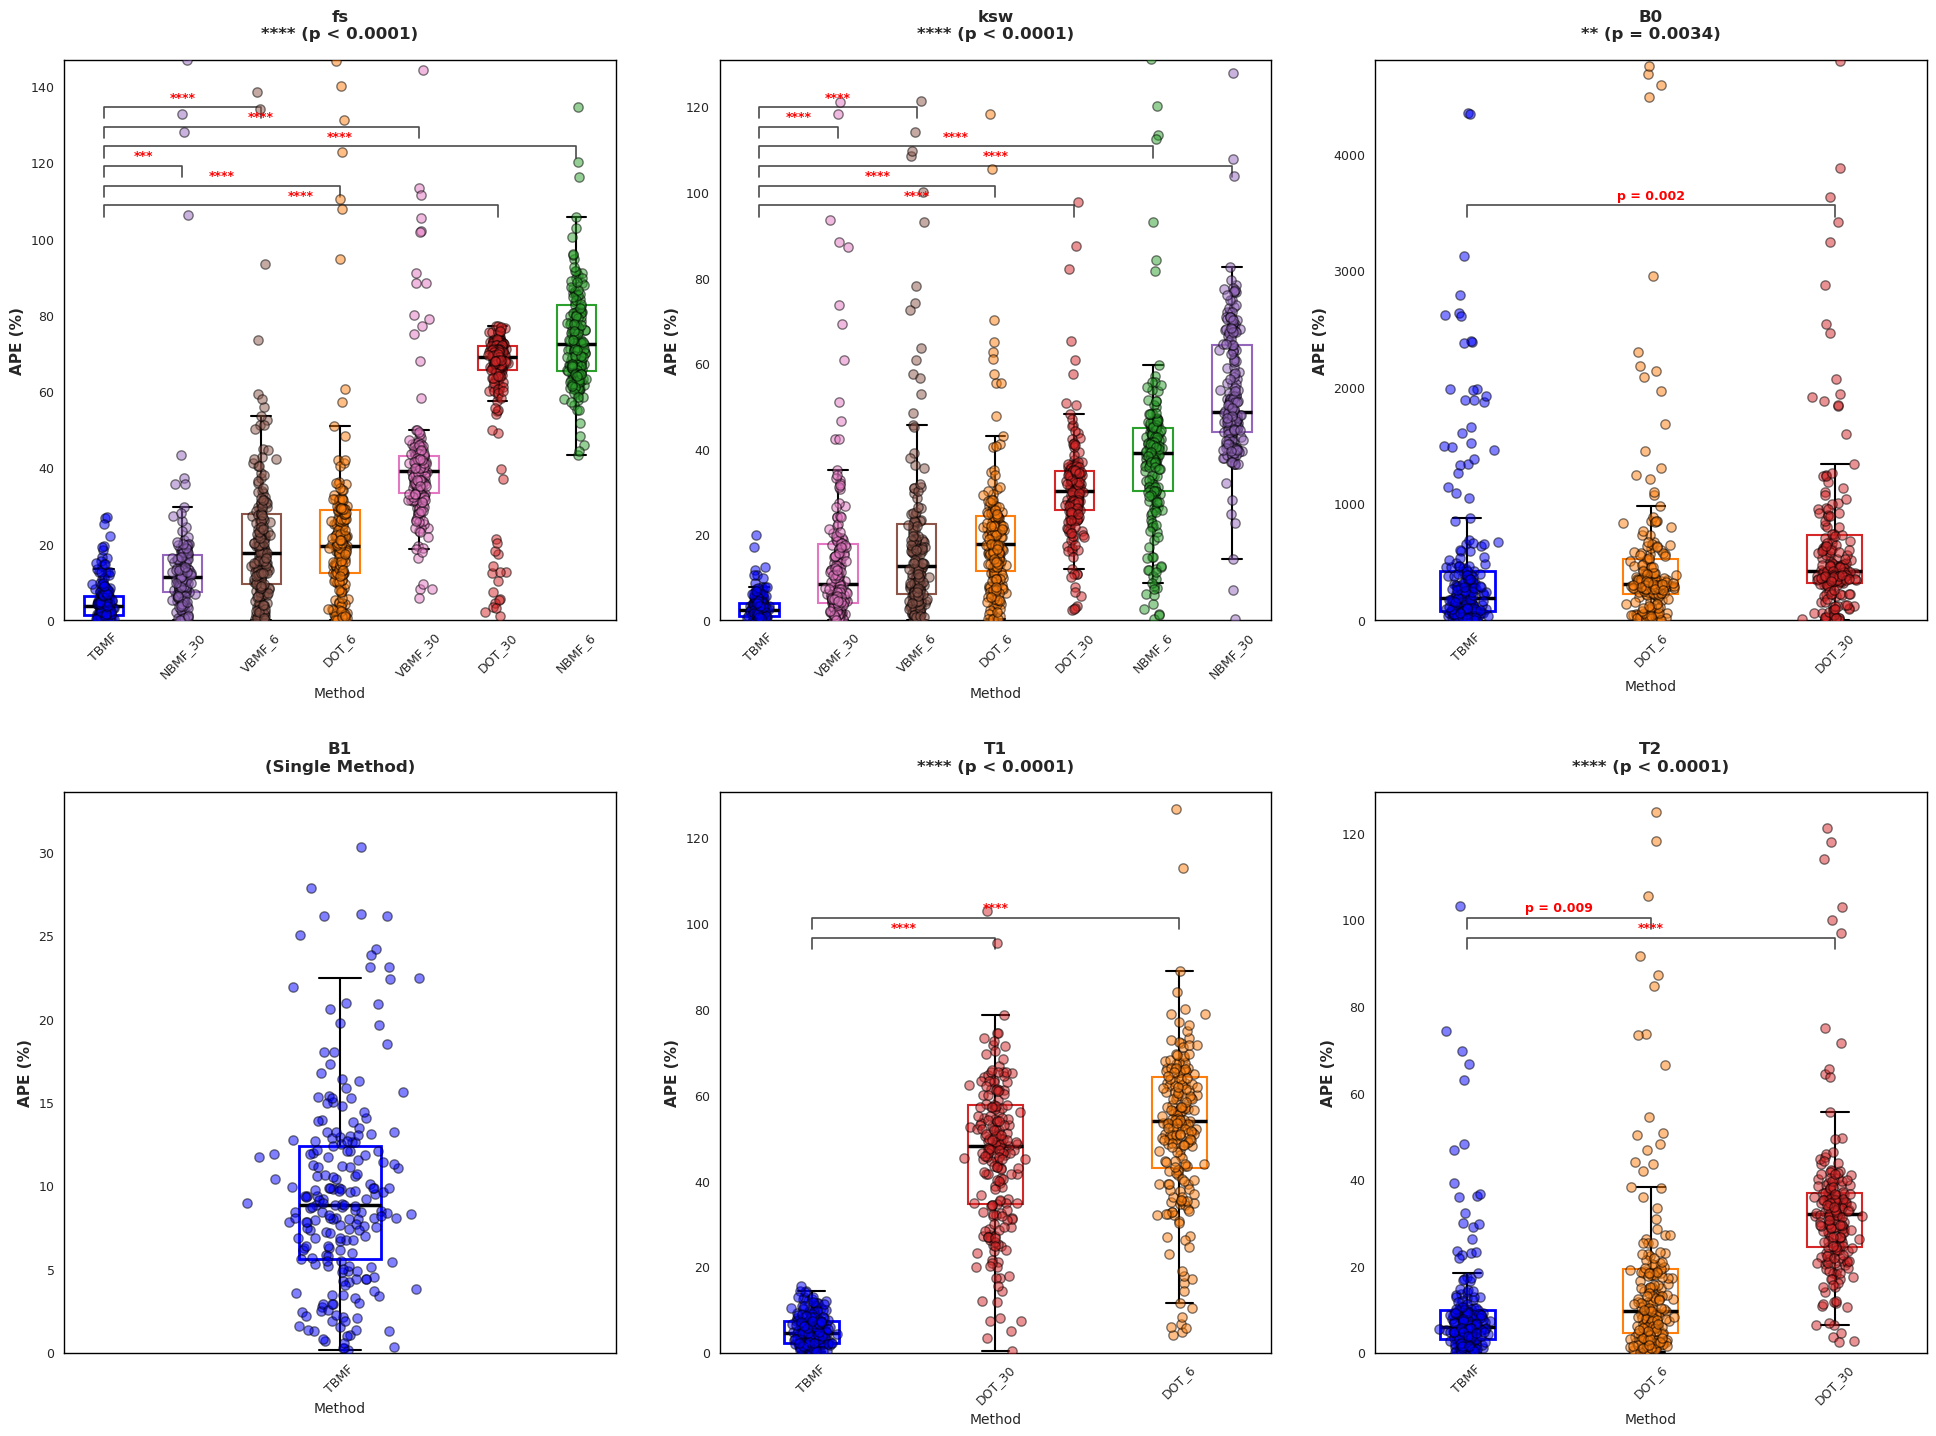

All parameter comparison plots (slice-based) saved to: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/all_parameter_comparison_slice_based.png

Creating overall comparison plot (excluding B0)...

Method median APE calculations (excluding B0):
  TBMF: Median APE = 4.61%, Mean APE = 7.47%
  DOT_6: Median APE = 20.97%, Mean APE = 38.18%
  DOT_30: Median APE = 38.09%, Mean APE = 49.18%
  NBMF_6: Median APE = 59.43%, Mean APE = 71.94%
  NBMF_30: Median APE = 38.18%, Mean APE = 39.14%
  VBMF_6: Median APE = 15.69%, Mean APE = 31.98%
  VBMF_30: Median APE = 30.35%, Mean APE = 34.59%

Methods ordered by ascending median APE (best to worst, excluding B0): ['TBMF', 'VBMF_6', 'DOT_6', 'VBMF_30', 'DOT_30', 'NBMF_30', 'NBMF_6']
Corresponding median APEs: ['4.61%', '15.69%', '20.97%', '30.35%', '38.09%', '38.18%', '59.43%']
Parameters included: ['B1', 'T1', 'T2', 'fs', 'ksw']
TBMF position in plot: 1


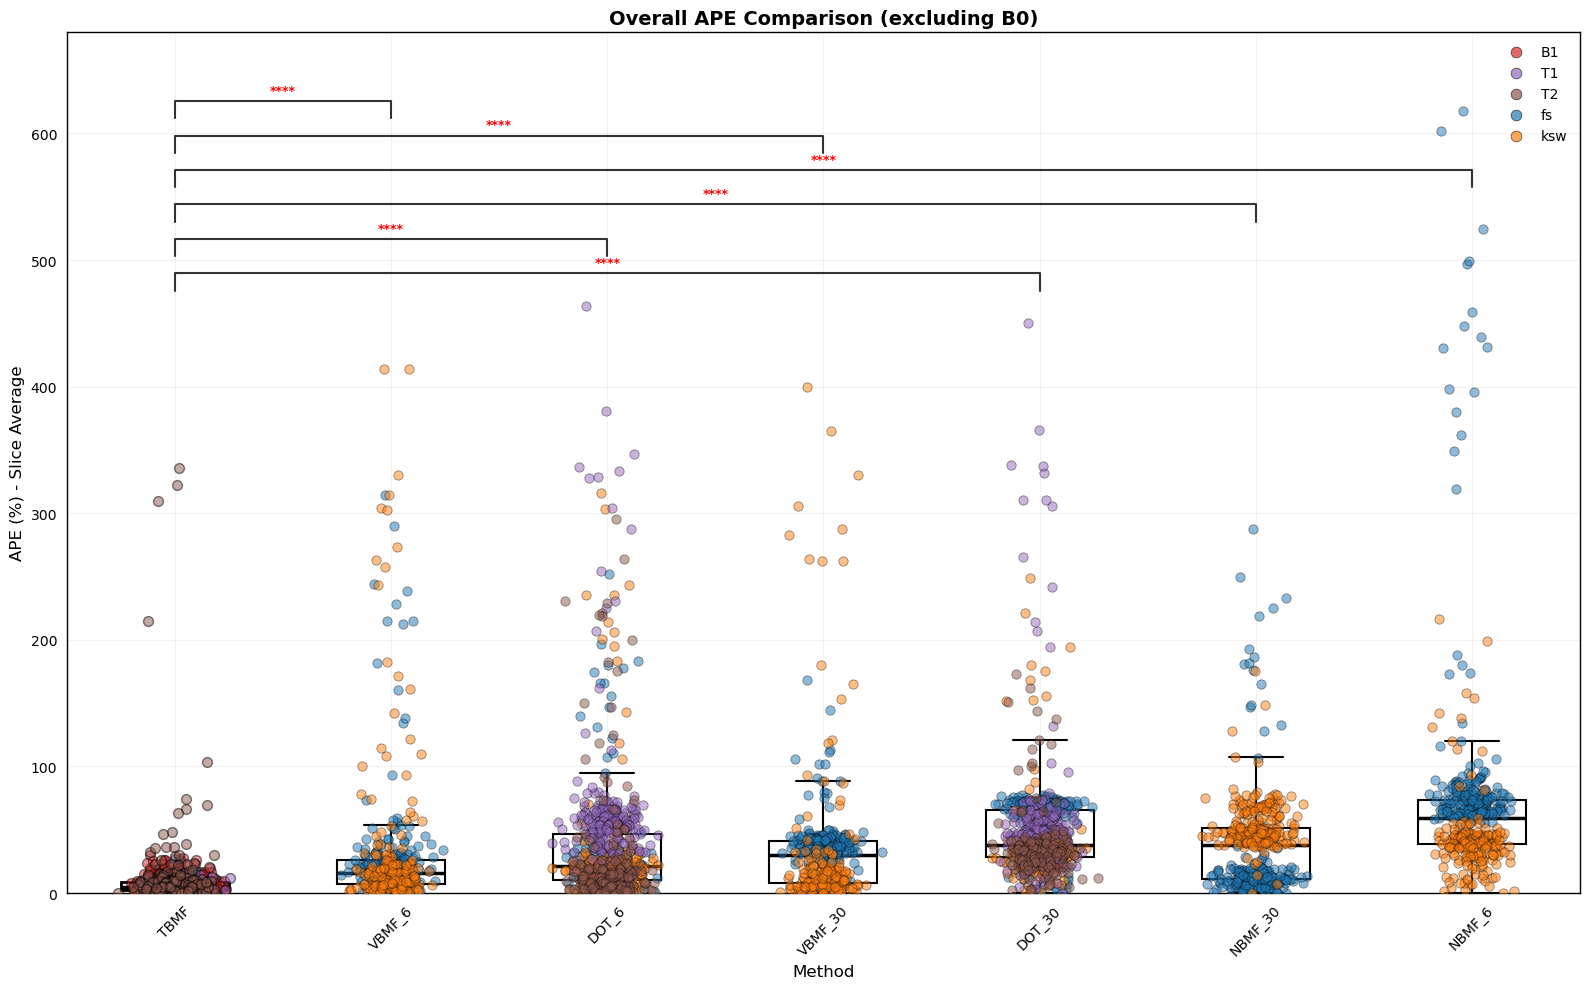

Overall ANOVA comparison plot (excluding B0, sorted by median) saved to: /home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/overall_anova_comparison_median_sorted_excluding_B0.png


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

def calculate_ape_slice_averages_complete_all_params(parameter_slice_averages, data_types, volume_ids):
    """
    Calculate APE for slice averages between predicted and ground truth data for ALL parameters
    Returns structured data for analysis
    """
    # Parameter names for all 6 parameters
    param_names = ['fs', 'ksw', 'B0', 'B1', 'T1', 'T2']

    # Method name mapping
    method_mapping = {
        'tmbf': 'TBMF',
        'nikita_6': 'DOT_6',
        'nikita_30': 'DOT_30',
        'alex_nbmf_6': 'NBMF_6',
        'alex_nbmf_30': 'NBMF_30',
        'alex_vbmf_6': 'VBMF_6',
        'alex_vbmf_30': 'VBMF_30'
    }

    ape_results = {}
    all_ape_data = []

    # Calculate APE for each method vs ground truth
    for data_type in data_types:
        if data_type == 'gt':  # Skip ground truth
            continue

        method_name = method_mapping.get(data_type, data_type.upper())
        ape_results[method_name] = {}

        for vol_id in volume_ids:
            if (vol_id in parameter_slice_averages[data_type] and
                vol_id in parameter_slice_averages['gt']):

                pred_slice_avg = parameter_slice_averages[data_type][vol_id]['slice_avg']
                gt_slice_avg = parameter_slice_averages['gt'][vol_id]['slice_avg']

                # Handle different parameter counts
                if pred_slice_avg.shape[0] == 2:  # Alex methods (2 parameters)
                    gt_comparison = gt_slice_avg[:2]
                    n_params = 2
                    current_param_names = param_names[:2]
                else:  # Other methods (6 parameters)
                    gt_comparison = gt_slice_avg
                    n_params = 6
                    current_param_names = param_names

                # Calculate APE with epsilon to avoid division by zero
                epsilon = 1e-10
                ape = np.abs(pred_slice_avg - gt_comparison) / (np.abs(gt_comparison) + epsilon) * 100

                # Store checkpoints
                ape_results[method_name][vol_id] = ape

                # Create structured data for analysis
                for param_idx in range(n_params):
                    param_name = current_param_names[param_idx]

                    # For B1 parameter (index 3), only include TBMF data
                    if param_name == 'B1' and method_name != 'TBMF':
                        continue

                    # Get APE values for all slices of this parameter
                    param_ape_values = ape[param_idx, :]

                    # Remove NaN values
                    valid_ape = param_ape_values[~np.isnan(param_ape_values)]

                    # Add each slice APE as a separate row
                    for slice_idx, ape_val in enumerate(valid_ape):
                        all_ape_data.append({
                            'Method': method_name,
                            'Parameter': param_name,
                            'Volume_ID': vol_id,
                            'Slice_Index': slice_idx,
                            'APE': ape_val
                        })

    # Create DataFrame
    ape_df = pd.DataFrame(all_ape_data)

    return ape_results, ape_df, param_names

def perform_parameter_wise_anova_analysis_all_params(ape_df, save_path="/home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/"):
    """
    Perform ANOVA analysis for ALL parameters, focusing on TBMF comparisons
    """
    print("\n" + "=" * 80)
    print("PARAMETER-WISE ANOVA ANALYSIS - ALL PARAMETERS")
    print("=" * 80)

    param_anova_results = {}
    parameters = ape_df['Parameter'].unique()

    for param in parameters:
        print(f"\n{'-' * 60}")
        print(f"PARAMETER: {param}")
        print(f"{'-' * 60}")

        # Filter data for this parameter
        param_data = ape_df[ape_df['Parameter'] == param]

        if param_data.empty:
            print(f"No data available for parameter {param}")
            continue

        # Get methods available for this parameter
        methods = param_data['Method'].unique()

        if len(methods) < 2:
            print(f"Not enough methods for comparison (only {len(methods)} methods available)")
            if len(methods) == 1:
                # Still store single method checkpoints for B1
                method = methods[0]
                method_ape = param_data[param_data['Method'] == method]['APE'].values
                param_anova_results[param] = {
                    'f_statistic': np.nan,
                    'p_value': np.nan,
                    'significance': 'single_method',
                    'methods': list(methods),
                    'tbmf_comparisons': [],
                    'method_means': {method: np.mean(method_ape)},
                    'method_medians': {method: np.median(method_ape)},
                    'tukey_results': None
                }
                print(f"Single method ({method}) - Mean APE: {np.mean(method_ape):.2f}%, Median APE: {np.median(method_ape):.2f}%")
            continue

        # Prepare data for ANOVA
        method_data = {}
        for method in methods:
            method_ape = param_data[param_data['Method'] == method]['APE'].values
            method_data[method] = method_ape

        # Perform one-way ANOVA for this parameter
        groups = [method_data[method] for method in methods]
        f_stat, p_value = f_oneway(*groups)

        # Determine significance level
        if p_value < 0.0001:
            significance = "****"
            p_display = "p < 0.0001"
        elif p_value < 0.001:
            significance = "***"
            p_display = f"p = {p_value:.4f}"
        elif p_value < 0.01:
            significance = "**"
            p_display = f"p = {p_value:.4f}"
        elif p_value < 0.05:
            significance = "*"
            p_display = f"p = {p_value:.4f}"
        else:
            significance = "ns"
            p_display = f"p = {p_value:.4f}"

        print(f"One-way ANOVA for {param}: F({len(methods)-1}, {len(param_data)-len(methods)}) = {f_stat:.2f}, {p_display}")
        print(f"Significance: {significance}")

        # Initialize parameter checkpoints
        param_anova_results[param] = {
            'f_statistic': f_stat,
            'p_value': p_value,
            'significance': significance,
            'methods': list(methods),
            'tbmf_comparisons': [],
            'method_means': {method: np.mean(data) for method, data in method_data.items()},
            'method_medians': {method: np.median(data) for method, data in method_data.items()}
        }

        # Perform Tukey's HSD test if significant and TBMF is present
        if p_value < 0.05 and 'TBMF' in methods:
            # Prepare data for Tukey's test
            all_ape_values = []
            all_method_labels = []
            for method in methods:
                method_ape = param_data[param_data['Method'] == method]['APE'].values
                all_ape_values.extend(method_ape)
                all_method_labels.extend([method] * len(method_ape))

            # Perform Tukey's HSD test
            tukey_results = pairwise_tukeyhsd(endog=all_ape_values, groups=all_method_labels, alpha=0.05)
            param_anova_results[param]['tukey_results'] = tukey_results

            # Parse checkpoints and extract only TBMF comparisons
            tbmf_comparisons = []
            for i in range(len(tukey_results.summary().data) ):
                if i == 0:  # Skip header row
                    continue
                row = tukey_results.summary().data[i]
                group1, group2, meandiff, p_adj, lower, upper, reject = row

                # Only process TBMF-related comparisons
                if 'TBMF' in group1 or 'TBMF' in group2:
                    # Format p-value display
                    if p_adj < 0.0001:
                        p_display = "< 0.0001"
                        sig_marker = "****"
                    elif p_adj < 0.001:
                        p_display = f"{p_adj:.4f}"
                        sig_marker = "***"
                    elif p_adj < 0.01:
                        p_display = f"{p_adj:.4f}"
                        sig_marker = "**"
                    elif p_adj < 0.05:
                        p_display = f"{p_adj:.4f}"
                        sig_marker = "*"
                    else:
                        p_display = f"{p_adj:.4f}"
                        sig_marker = "ns"

                    tbmf_comparisons.append({
                        'Group1': group1,
                        'Group2': group2,
                        'Mean_Diff': meandiff,
                        'P_adj': p_adj,
                        'Significant': reject,
                        'Significance_Level': sig_marker,
                        'P_display': p_display
                    })

            param_anova_results[param]['tbmf_comparisons'] = tbmf_comparisons

            # Display TBMF comparisons for this parameter
            if 'TBMF' in method_data:
                tbmf_mean = np.mean(method_data['TBMF'])
                tbmf_median = np.median(method_data['TBMF'])
                print(f"\nTBMF Performance for {param}:")
                print(f"  Mean APE: {tbmf_mean:.2f}%")
                print(f"  Median APE: {tbmf_median:.2f}%")

                if tbmf_comparisons:
                    print(f"\nTBMF vs Other Methods for {param} - Tukey's HSD Results:")
                    print(f"{'Method':<12} {'Mean APE':<12} {'Median APE':<12} {'Mean Diff':<15} {'p-value':<12} {'Significance':<12}")
                    print("-" * 85)

                    for comp in tbmf_comparisons:
                        other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
                        other_mean = np.mean(method_data[other_method])
                        other_median = np.median(method_data[other_method])
                        diff = other_mean - tbmf_mean

                        print(f"{other_method:<12} {other_mean:<12.2f} {other_median:<12.2f} {diff:+.2f}%        {comp['P_display']:<12} {comp['Significance_Level']:<12}")
        else:
            param_anova_results[param]['tukey_results'] = None

    return param_anova_results

def perform_overall_anova_analysis_tbmf_focused(ape_df, save_path="/home/sahar/Models/Dinor_revision/new_phantom/dinor_train/code_addition/human/Method_compare/"):
    """
    Perform overall ANOVA analysis across all methods and parameters combined (excluding B0),
    but only display TBMF comparisons in the checkpoints
    """
    print("\n" + "=" * 80)
    print("OVERALL ANOVA ANALYSIS - TBMF vs ALL OTHER METHODS (excluding B0)")
    print("=" * 80)

    # Filter out B0 parameter from overall analysis
    ape_df_filtered = ape_df[ape_df['Parameter'] != 'B0'].copy()

    if ape_df_filtered.empty:
        print("No data available after filtering out B0")
        return {
            'f_statistic': np.nan,
            'p_value': np.nan,
            'significance': 'no_data',
            'tukey_results': None,
            'tbmf_comparisons': [],
            'method_means': {},
            'method_medians': {}
        }

    print(f"Parameters included in overall analysis: {sorted(ape_df_filtered['Parameter'].unique())}")

    # Prepare data for overall ANOVA
    methods = ape_df_filtered['Method'].unique()
    all_ape_values = []
    all_method_labels = []

    # Collect all APE values for each method
    method_data = {}
    for method in methods:
        method_ape = ape_df_filtered[ape_df_filtered['Method'] == method]['APE'].values
        method_data[method] = method_ape
        all_ape_values.extend(method_ape)
        all_method_labels.extend([method] * len(method_ape))

    # Perform overall one-way ANOVA
    groups = [method_data[method] for method in methods]
    f_stat, p_value = f_oneway(*groups)

    # Determine significance level
    if p_value < 0.0001:
        significance = "****"
        p_display = "p < 0.0001"
    elif p_value < 0.001:
        significance = "***"
        p_display = f"p = {p_value:.4f}"
    elif p_value < 0.01:
        significance = "**"
        p_display = f"p = {p_value:.4f}"
    elif p_value < 0.05:
        significance = "*"
        p_display = f"p = {p_value:.4f}"
    else:
        significance = "ns"
        p_display = f"p = {p_value:.4f}"

    print(f"Overall One-way ANOVA (excluding B0): F({len(methods)-1}, {len(all_ape_values)-len(methods)}) = {f_stat:.2f}, {p_display}")
    print(f"Significance: {significance}")

    # Perform Tukey's HSD test if significant, but only show TBMF checkpoints
    tukey_results_overall = None
    tbmf_comparisons = []

    if p_value < 0.05 and 'TBMF' in methods:
        # Perform Tukey's HSD test
        tukey_results_overall = pairwise_tukeyhsd(endog=all_ape_values, groups=all_method_labels, alpha=0.05)

        # Parse checkpoints and extract only TBMF comparisons
        for i in range(len(tukey_results_overall.summary().data)):
            if i == 0:  # Skip header row
                continue
            row = tukey_results_overall.summary().data[i]
            group1, group2, meandiff, p_adj, lower, upper, reject = row

            # Only process TBMF-related comparisons
            if 'TBMF' in group1 or 'TBMF' in group2:
                # Format p-value display
                if p_adj < 0.0001:
                    p_display = "< 0.0001"
                    sig_marker = "****"
                elif p_adj < 0.001:
                    p_display = f"{p_adj:.4f}"
                    sig_marker = "***"
                elif p_adj < 0.01:
                    p_display = f"{p_adj:.4f}"
                    sig_marker = "**"
                elif p_adj < 0.05:
                    p_display = f"{p_adj:.4f}"
                    sig_marker = "*"
                else:
                    p_display = f"{p_adj:.4f}"
                    sig_marker = "ns"

                tbmf_comparisons.append({
                    'Group1': group1,
                    'Group2': group2,
                    'Mean_Diff': meandiff,
                    'P_adj': p_adj,
                    'Significant': reject,
                    'Significance_Level': sig_marker,
                    'P_display': p_display
                })

        # Display TBMF comparisons only
        print(f"\n" + "=" * 60)
        print("TBMF DISTINCTNESS ANALYSIS (excluding B0)")
        print("=" * 60)

        if 'TBMF' in method_data:
            tbmf_mean = np.mean(method_data['TBMF'])
            tbmf_median = np.median(method_data['TBMF'])
            print(f"TBMF Mean APE across parameters (excluding B0): {tbmf_mean:.2f}%")
            print(f"TBMF Median APE across parameters (excluding B0): {tbmf_median:.2f}%")

            print(f"\nTBMF vs Other Methods - Tukey's HSD Results (excluding B0):")
            print(f"{'Method':<12} {'Mean APE':<12} {'Median APE':<12} {'Mean Diff':<15} {'p-value':<12} {'Significance':<12}")
            print("-" * 85)

            for comp in tbmf_comparisons:
                other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
                other_mean = np.mean(method_data[other_method])
                other_median = np.median(method_data[other_method])
                diff = other_mean - tbmf_mean

                print(f"{other_method:<12} {other_mean:<12.2f} {other_median:<12.2f} {diff:+.2f}%        {comp['P_display']:<12} {comp['Significance_Level']:<12}")

    return {
        'f_statistic': f_stat,
        'p_value': p_value,
        'significance': significance,
        'tukey_results': tukey_results_overall,
        'tbmf_comparisons': tbmf_comparisons,
        'method_means': {method: np.mean(data) for method, data in method_data.items()},
        'method_medians': {method: np.median(data) for method, data in method_data.items()},
        'parameters_included': sorted(ape_df_filtered['Parameter'].unique())
    }

def create_all_parameter_comparison_plots(ape_df, param_anova_results, save_path="/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/"):
    """
    Create comparison plots for ALL parameters (slice-based analysis only)
    """
    # Define colors for each method - highlight TBMF
    method_colors = {
        'TBMF': '#0000FF',      # Blue
        'DOT_6': '#ff7f0e',     # Orange
        'DOT_30': '#d62728',    # Dark Red
        'NBMF_6': '#2ca02c',    # Green
        'NBMF_30': '#9467bd',   # Purple
        'VBMF_6': '#8c564b',    # Brown
        'VBMF_30': '#e377c2'    # Pink
    }

    parameters = ape_df['Parameter'].unique()
    n_params = len(parameters)

    # Create figure with appropriate layout
    if n_params <= 6:
        n_rows = 2
        n_cols = 3
    else:
        n_rows = 3
        n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), facecolor='white')
    axes = axes.flatten() if n_params > 1 else [axes]

    for i, param in enumerate(parameters):
        if i >= len(axes):
            break

        ax = axes[i]
        ax.set_facecolor('white')

        # Filter data for this parameter
        param_data = ape_df[ape_df['Parameter'] == param]

        if param_data.empty:
            ax.text(0.5, 0.5, f'No data for {param}', ha='center', va='center',
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(param, fontsize=14, fontweight='bold')
            continue

        # Get methods and sort by median APE
        methods = param_data['Method'].unique()
        method_medians = []
        for method in methods:
            method_ape = param_data[param_data['Method'] == method]['APE']
            median_ape = np.median(method_ape)
            method_medians.append((method, median_ape))

        # Sort by median APE in ascending order
        method_medians.sort(key=lambda x: x[1])
        methods_sorted = [method for method, _ in method_medians]

        # Create enhanced boxplot
        bp = ax.boxplot([param_data[param_data['Method'] == method]['APE'].values
                        for method in methods_sorted],
                       tick_labels=methods_sorted,
                       patch_artist=True,
                       showfliers=False,
                       medianprops={'color': 'black', 'linewidth': 2.5},
                       boxprops={'linewidth': 1.5},
                       whiskerprops={'linewidth': 1.5},
                       capprops={'linewidth': 1.5})

        # Color the boxes with special emphasis on TBMF
        for j, (patch, method) in enumerate(zip(bp['boxes'], methods_sorted)):
            color = method_colors.get(method, '#808080')
            if method == 'TBMF':
                patch.set_facecolor("none")
                patch.set_edgecolor(color)
                patch.set_linewidth(2)
            else:
                patch.set_facecolor("none")
                patch.set_edgecolor(color)
                patch.set_linewidth(1.5)

        # Add individual points with jitter
        for j, method in enumerate(methods_sorted):
            method_ape = param_data[param_data['Method'] == method]['APE'].values
            x_coords = np.random.normal(j + 1, 0.05, len(method_ape))

            if method == 'TBMF':
                ax.scatter(x_coords, method_ape, color=method_colors[method],
                          alpha=0.5, s=45, edgecolors='black', linewidth=1,
                          zorder=3, marker='o')
            else:
                ax.scatter(x_coords, method_ape, color=method_colors.get(method, '#808080'),
                          alpha=0.5, s=45, edgecolors='black', linewidth=1,
                          zorder=3)

        # Enhanced title with ANOVA checkpoints
        if param in param_anova_results:
            anova_result = param_anova_results[param]
            if anova_result['significance'] == 'single_method':
                title_text = f"{param}\n(Single Method)"
            elif anova_result['significance'] != 'ns':
                title_text = f"{param}\n{anova_result['significance']}"
                if anova_result['p_value'] < 0.0001:
                    title_text += " (p < 0.0001)"
                else:
                    title_text += f" (p = {anova_result['p_value']:.4f})"
            else:
                title_text = f"{param}\nns (p = {anova_result['p_value']:.3f})"
        else:
            title_text = param

        ax.set_title(title_text, fontsize=12, fontweight='bold', pad=15)

        # Enhanced axis labels and formatting
        ax.set_ylabel('APE (%)', fontsize=11, fontweight='bold')
        ax.set_xlabel('Method', fontsize=10)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.tick_params(axis='y', labelsize=9)

        # Set y-axis limits based on data
        y_max = np.percentile(param_data['APE'], 95)
        ax.set_ylim(0, y_max * 1.5)

        # Add significance brackets for TBMF comparisons if significant
        if (param in param_anova_results and
            param_anova_results[param]['significance'] not in ['ns', 'single_method'] and
            'TBMF' in methods_sorted and
            param_anova_results[param]['tbmf_comparisons']):

            tbmf_pos = methods_sorted.index('TBMF') + 1
            significant_comps = [comp for comp in param_anova_results[param]['tbmf_comparisons']
                               if comp['Significant']]

            y_max_plot = ax.get_ylim()[1]

            for k, comp in enumerate(significant_comps):  # Limit to top 3 to avoid crowding
                other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
                if other_method in methods_sorted:
                    other_pos = methods_sorted.index(other_method) + 1
                    y = y_max_plot * (0.72 + k * 0.035)

                    # Draw bracket
                    ax.plot([min(tbmf_pos, other_pos), min(tbmf_pos, other_pos),
                            max(tbmf_pos, other_pos), max(tbmf_pos, other_pos)],
                           [y, y + y_max_plot * 0.02, y + y_max_plot * 0.02, y],
                           'k-', linewidth=1.2, alpha=0.7)

                    # Add significance text
                    if comp['P_adj'] > 0.001:
                        display_text = f"p = {comp['P_adj']:.3f}"
                    else:
                        display_text = comp['Significance_Level']

                    ax.text((tbmf_pos + other_pos) / 2, y + y_max_plot * 0.026,
                           display_text,
                           ha='center', va='bottom', fontweight='bold',
                           color='red', fontsize=9)

        # Style the axes
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1)

    # Hide unused subplots
    for i in range(len(parameters), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(pad=3.0)

    # Save the plot
    plot_filename = f"{save_path}all_parameter_comparison_slice_based.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"All parameter comparison plots (slice-based) saved to: {plot_filename}")

def create_overall_comparison_plot(ape_df, overall_anova_results, save_path="/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/"):
    """
    Create the overall comparison plot with ANOVA checkpoints and individual points,
    highlighting TBMF's distinctness - SORTED BY MEDIAN APE (excluding B0)
    """
    # Filter out B0 parameter from the plot
    ape_df_filtered = ape_df[ape_df['Parameter'] != 'B0'].copy()

    if ape_df_filtered.empty:
        print("No data available for overall plot after filtering out B0")
        return

    fig = plt.figure(figsize=(16, 10), facecolor='white')
    ax = fig.add_subplot(111)
    ax.set_facecolor('white')

    # Define colors for each method - highlight TBMF
    method_colors = {
        'TBMF': '#FF0000',      # Red - highlighted
        'DOT_6': '#ff7f0e',     # Orange
        'DOT_30': '#d62728',    # Dark Red
        'NBMF_6': '#2ca02c',    # Green
        'NBMF_30': '#9467bd',   # Purple
        'VBMF_6': '#8c564b',    # Brown
        'VBMF_30': '#e377c2'    # Pink
    }

    # Define colors for each parameter (excluding B0)
    param_colors = {
        'fs': '#1f77b4',        # Blue
        'ksw': '#ff7f0e',       # Orange
        'B1': '#d62728',        # Red
        'T1': '#9467bd',        # Purple
        'T2': '#8c564b'         # Brown
    }

    # Calculate median APE for each method and sort in ASCENDING order (lowest median first)
    method_medians = []
    print("\nMethod median APE calculations (excluding B0):")
    for method in ape_df_filtered['Method'].unique():
        method_data = ape_df_filtered[ape_df_filtered['Method'] == method]['APE']
        median_ape = np.median(method_data)
        mean_ape = np.mean(method_data)
        method_medians.append((method, median_ape))
        print(f"  {method}: Median APE = {median_ape:.2f}%, Mean APE = {mean_ape:.2f}%")

    # Sort by median APE in ascending order (lowest first - best performance on left)
    method_medians.sort(key=lambda x: x[1])
    methods_present = [method for method, _ in method_medians]

    print(f"\nMethods ordered by ascending median APE (best to worst, excluding B0): {methods_present}")
    print(f"Corresponding median APEs: {[f'{median:.2f}%' for _, median in method_medians]}")
    print(f"Parameters included: {sorted(ape_df_filtered['Parameter'].unique())}")

    colors_for_plot = [method_colors[method] for method in methods_present]

    # Create boxplot with enhanced visibility for TBMF
    bp = ax.boxplot([ape_df_filtered[ape_df_filtered['Method'] == method]['APE'].values
                     for method in methods_present],
                    tick_labels=methods_present,
                    patch_artist=True,
                    showfliers=False,
                    medianprops={'color': 'black', 'linewidth': 2.5},
                    boxprops={'color': 'black', 'linewidth': 1.5},
                    whiskerprops={'color': 'black', 'linewidth': 1.5},
                    capprops={'color': 'black', 'linewidth': 1.5})

    # Make all boxes transparent to highlight individual points
    for i, (patch, color, method) in enumerate(zip(bp['boxes'], colors_for_plot, methods_present)):
        if method == 'TBMF':
            patch.set_facecolor("none")
            patch.set_edgecolor("black")
            patch.set_linewidth(2)  # Thicker border for TBMF
        else:
            patch.set_facecolor("none")
            patch.set_edgecolor("black")
            patch.set_linewidth(1.5)

    # Add individual data points colored by parameter
    for i, method in enumerate(methods_present):
        method_data = ape_df_filtered[ape_df_filtered['Method'] == method]

        for param in method_data['Parameter'].unique():
            param_data = method_data[method_data['Parameter'] == param]
            x_coords = np.random.normal(i + 1, 0.08, len(param_data))

            # Special styling for TBMF points
            if method == 'TBMF':
                ax.scatter(x_coords, param_data['APE'].values,
                           color=param_colors[param],
                           alpha=0.5,
                           s=50,  # Larger points for TBMF
                           edgecolors='black',
                           linewidth=1,
                           label=param if i == 0 else "",
                           zorder=3,
                           marker='o')
            else:
                ax.scatter(x_coords, param_data['APE'].values,
                           color=param_colors[param],
                           alpha=0.5,
                           s=45,
                           edgecolors='black',
                           linewidth=0.5,
                           label=param if i == 0 else "",
                           zorder=3)



    ax.set_title(f'Overall APE Comparison (excluding B0)',
                fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('APE (%) - Slice Average', fontsize=12, color='black')
    ax.set_xlabel('Method', fontsize=12, color='black')
    ax.grid(True, alpha=0.1, color='gray')
    ax.tick_params(axis='x', rotation=45, colors='black')
    ax.tick_params(axis='y', colors='black')

    # Style the axes
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

    # Set reasonable y-axis limits
    y_max = np.percentile(ape_df_filtered['APE'], 95)
    ax.set_ylim(0, max(y_max * 1.5, np.max(ape_df_filtered['APE']) * 1.1))

    # Add significance brackets for TBMF comparisons - FIXED positioning
    if (overall_anova_results['significance'] not in ['ns', 'no_data'] and
        overall_anova_results['tbmf_comparisons'] and
        'TBMF' in methods_present):

        y_max_plot = ax.get_ylim()[1]
        bracket_height = y_max_plot * 0.02

        # Find TBMF position in the sorted list
        tbmf_pos = methods_present.index('TBMF') + 1
        print(f"TBMF position in plot: {tbmf_pos}")

        # Add brackets for significant TBMF comparisons
        significant_tbmf_comps = [
            comp for comp in overall_anova_results['tbmf_comparisons']
            if comp['Significant'] and comp['Significance_Level'] in ['****', '***', '**', '*']
        ]

        # Sort by significance level for better display
        sig_order = {'****': 4, '***': 3, '**': 2, '*': 1, 'ns': 0}
        significant_tbmf_comps.sort(key=lambda x: sig_order[x['Significance_Level']], reverse=True)

        for i, comp in enumerate(significant_tbmf_comps):
            other_method = comp['Group1'] if comp['Group1'] != 'TBMF' else comp['Group2']
            if other_method in methods_present:
                other_pos = methods_present.index(other_method) + 1
                y = y_max_plot * (0.70 + i * 0.04)  # Better spacing

                # Draw bracket
                ax.plot([min(tbmf_pos, other_pos), min(tbmf_pos, other_pos),
                        max(tbmf_pos, other_pos), max(tbmf_pos, other_pos)],
                       [y, y + bracket_height, y + bracket_height, y],
                       'k-', linewidth=1.5, alpha=0.8)

                # Add significance text - show exact p-value if > 0.001
                if comp['P_adj'] > 0.001:
                    # Show exact p-value for p > 0.001 (includes *, **, and ns)
                    display_text = f"p = {comp['P_adj']:.3f}"
                else:
                    # Show asterisks for p ≤ 0.001 (*** and ****)
                    display_text = comp['Significance_Level']

                ax.text((tbmf_pos + other_pos) / 2, y + y_max_plot * 0.025,
                       display_text,
                       ha='center', va='bottom', fontweight='bold',
                       color='red', fontsize=9)

    # Add legend for parameters (excluding B0)
    legend_elements = [plt.scatter([], [], color=param_colors[param], s=60, alpha=0.7,
                                 edgecolors='black', linewidth=0.5, label=param)
                      for param in sorted(param_colors.keys())]
    legend = ax.legend(handles=legend_elements,
                      loc='upper right', frameon=False, fancybox=True, shadow=True)
    legend.get_title().set_color('black')
    legend.get_title().set_fontweight('bold')
    for text in legend.get_texts():
        text.set_color('black')

    plt.tight_layout()

    # Save the plot
    plot_filename = f"{save_path}overall_anova_comparison_median_sorted_excluding_B0.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"Overall ANOVA comparison plot (excluding B0, sorted by median) saved to: {plot_filename}")

def create_ape_summary_table_all_params(ape_df):
    """
    Create summary statistics table for all parameters
    """
    summary_stats = []

    for param in ape_df['Parameter'].unique():
        param_data = ape_df[ape_df['Parameter'] == param]

        for method in param_data['Method'].unique():
            method_data = param_data[param_data['Method'] == method]
            ape_values = method_data['APE'].values

            summary_stats.append({
                'Parameter': param,
                'Method': method,
                'N_Data_Points': len(ape_values),
                'Mean_APE': np.mean(ape_values),
                'Median_APE': np.median(ape_values),
                'Std_APE': np.std(ape_values),
                'Q25_APE': np.percentile(ape_values, 25),
                'Q75_APE': np.percentile(ape_values, 75),
                'Min_APE': np.min(ape_values),
                'Max_APE': np.max(ape_values)
            })

    return pd.DataFrame(summary_stats)

def run_complete_slice_based_ape_analysis(parameter_slice_averages, data_types, volume_ids,
                                         save_path="/home/sahar/Models/Dinor_revision/git_tbmf/human/data/Method_com/"):
    """
    Main function to run complete APE analysis for ALL parameters with slice-based analysis only
    """
    print("\n" + "=" * 80)
    print("COMPLETE SLICE-BASED APE ANALYSIS - ALL PARAMETERS")
    print("=" * 80)

    # 1. Calculate APE for slice averages (all parameters)
    print("Calculating APE for slice averages...")
    slice_ape_results, slice_ape_df, param_names = calculate_ape_slice_averages_complete_all_params(
        parameter_slice_averages, data_types, volume_ids
    )

    # 2. Perform ANOVA analysis for slice-based APE
    print("\nPerforming parameter-wise ANOVA analysis...")
    slice_param_anova_results = perform_parameter_wise_anova_analysis_all_params(slice_ape_df, save_path)

    # 3. Perform overall ANOVA analysis across all parameters (excluding B0)
    print("\nPerforming overall ANOVA analysis across all parameters (excluding B0)...")
    overall_anova_results = perform_overall_anova_analysis_tbmf_focused(slice_ape_df, save_path)

    # 4. Create comparison plots for slice-based APE
    print("\nCreating parameter-wise comparison plots...")
    create_all_parameter_comparison_plots(slice_ape_df, slice_param_anova_results, save_path)

    # 5. Create overall comparison plot (excluding B0)
    print("\nCreating overall comparison plot (excluding B0)...")
    create_overall_comparison_plot(slice_ape_df, overall_anova_results, save_path)
    #
    # # 6. Create summary table
    # print("\nCreating summary statistics...")
    # slice_summary_table = create_ape_summary_table_all_params(slice_ape_df)
    #
    # # 7. Display summary statistics
    # print("\n" + "=" * 60)
    # print("SLICE-BASED APE SUMMARY STATISTICS")
    # print("=" * 60)

    # for param in param_names:
    #     if param in slice_ape_df['Parameter'].values:
    #         param_summary = slice_summary_table[slice_summary_table['Parameter'] == param]
    #         if not param_summary.empty:
    #             print(f"\n{param.upper()} Parameter (Slice-based):")
    #             print("-" * 40)
    #             for _, row in param_summary.iterrows():
    #                 print(f"  {row['Method']:10}: "
    #                       f"Median={row['Median_APE']:6.2f}%, "
    #                       f"Mean={row['Mean_APE']:6.2f}%, "
    #                       f"IQR=[{row['Q25_APE']:5.2f}%, {row['Q75_APE']:5.2f}%], "
    #                       f"N={row['N_Data_Points']:3d}")
    #
    #             # Show ANOVA checkpoints for this parameter
    #             if param in slice_param_anova_results:
    #                 anova_result = slice_param_anova_results[param]
    #                 if anova_result['significance'] == 'single_method':
    #                     print(f"    Single method available")
    #                 else:
    #                     print(f"    ANOVA: F = {anova_result['f_statistic']:.2f}, {anova_result['significance']}")
    #
    # print("Analysis completed!")
    #
    # return {
    #     'slice_ape_results': slice_ape_results,
    #     'slice_ape_df': slice_ape_df,
    #     'slice_summary_table': slice_summary_table,
    #     'slice_param_anova_results': slice_param_anova_results,
    #     'overall_anova_results': overall_anova_results
    # }

# Execute the slice-based analysis only
if __name__ == "__main__":
    # Make sure you have the required variables from your previous code:
    # parameter_slice_averages, data_types, volume_ids

    # Run the slice-based analysis only
    results = run_complete_slice_based_ape_analysis(
        parameter_slice_averages,
        data_types,
        volume_ids
    )